## LOADING THE DATASET

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade category_encoders -q
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 985.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.inspection import PartialDependenceDisplay, partial_dependence

import shap
shap.initjs()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adverts = pd.read_csv('/content/drive/MyDrive/adverts.csv')

In [ ]:
adverts.head(5)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

## DATA PROCESSING FOR MACHINE LEARNING

In [ ]:
adverts.shape

(402005, 12)

In [ ]:
adverts.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

In [ ]:
adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

I queried the dataset for the latest year, using adverts.[year_of_registrationmode].max it shows the modal year as 2020. so I decided to fill the missing values with 2021

In [ ]:
adverts["year_of_registration"].max()

2020.0

In [ ]:
(
    adverts
    .query("year_of_registration==2021")
    .sort_values('price', ascending=False)
    .head(5)
)

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [ ]:
new_ads = adverts

In [ ]:
#Converting the values on the reg_code column to numeric
new_ads['reg_code'] = pd.to_numeric(new_ads['reg_code'], errors= 'coerce')
#Getting all the rows where vehicle condition column = NEW
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['reg_code'].isnull()), 'reg_code'] = 21
new_ads['year_of_registration'] = pd.to_numeric(new_ads['year_of_registration'], errors= 'coerce')
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['year_of_registration'].isnull()), 'year_of_registration'] = 2021.0

In [ ]:
new_ads.head(10)

public_reference   mileage  reg_code standard_colour  standard_make  \
0   202006039777689       0.0      21.0            Grey          Volvo   
1   202007020778260  108230.0      61.0            Blue         Jaguar   
2   202007020778474    7800.0      17.0            Grey          SKODA   
3   202007080986776   45000.0      16.0           Brown       Vauxhall   
4   202007161321269   64000.0      64.0            Grey     Land Rover   
5   202009304412074   16000.0      17.0            Blue           Audi   
6   202007080998445   24075.0      17.0             Red       Vauxhall   
7   202009244143980   99000.0      13.0          Bronze     Land Rover   
8   202010014442611  111236.0       8.0           Black  Mercedes-Benz   
9   202006230431327    9500.0      19.0           White     Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   
5                 S5              USED                2017.0  29000   
6               Viva              USED                2017.0   5861   
7        Range Rover              USED                2013.0  24475   
8            S Class              USED                2008.0   6995   
9        Range Rover              USED                2019.0  79995   

     body_type  crossover_car_and_van              fuel_type  
0          SUV                  False  Petrol Plug-in Hybrid  
1       Saloon                  False                 Diesel  
2          SUV                  False                 Petrol  
3    Hatchback                  False                 Diesel  
4          SUV                  False                 Diesel  
5  Convertible                  False                 Petrol  
6    Hatchback                  False                 Petrol  
7          SUV                  False                 Diesel  
8    Limousine                  False                 Diesel  
9          SUV                  False                 Diesel

In [ ]:
new_ads.isnull().sum()

public_reference            0
mileage                   127
reg_code                 3523
standard_colour          5378
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2062
price                       0
body_type                 837
crossover_car_and_van       0
fuel_type                 601
dtype: int64

I reduced the missing values to a minimum, then i will drop all missing values.

In [ ]:
new_ads0 = new_ads.dropna()

In [ ]:
new_ads0.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Dealing with Outliers for Price and Mileage

In [ ]:
#FOR PRICE WE HAVE
Price1 = new_ads0['price'].quantile(0.25)
Price2 = new_ads0['price'].quantile(0.75)
#interquantile range
IQR = Price1 - Price2
low_brac = Price1 - 1.5 * IQR
high_brac = Price2 + 1.5 * IQR
outliers = new_ads0[(new_ads0['price']<low_brac) | (new_ads0['price']>high_brac)]
outliers_mask = (new_ads0['price'] < low_brac) | (new_ads0['price'] > high_brac)
no_outliers = new_ads0[~outliers_mask]

In [ ]:
#FOR MILEAGE WE HAVE
Mil1 = new_ads0['mileage'].quantile(0.25)
Mil2 = new_ads0['mileage'].quantile(0.75)
#interquantile range
IQR1 = Mil1 - Mil2

low_brac1 = Price1 - 1.5 * IQR1
high_brac1 = Price2 + 1.5 * IQR1

outliers1 = new_ads0[(new_ads0['mileage']<low_brac1) | (new_ads0['mileage']>high_brac1)]
outliers_mask1 = (new_ads0['mileage'] < low_brac1) | (new_ads0['mileage'] > high_brac1)

no_outliers1 = new_ads0[~outliers_mask1]

In [ ]:
new_ads0.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0      21.0            Grey         Volvo   
1   202007020778260  108230.0      61.0            Blue        Jaguar   
2   202007020778474    7800.0      17.0            Grey         SKODA   
3   202007080986776   45000.0      16.0           Brown      Vauxhall   
4   202007161321269   64000.0      64.0            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

## Feature Engineering

In [ ]:
new_ads0.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0      21.0            Grey         Volvo   
1   202007020778260  108230.0      61.0            Blue        Jaguar   
2   202007020778474    7800.0      17.0            Grey         SKODA   
3   202007080986776   45000.0      16.0           Brown      Vauxhall   
4   202007161321269   64000.0      64.0            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [ ]:
new_ads0.head(1)

public_reference  mileage  reg_code standard_colour standard_make  \
0   202006039777689      0.0      21.0            Grey         Volvo   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                2021.0  73970       SUV   

   crossover_car_and_van              fuel_type  
0                  False  Petrol Plug-in Hybrid

For feature selection

I am going to be dropping columns like Standard_colour, Reg_code, Public_reference, Crossover_car_and_van, Fuel_type, Standard_model because they have no direct influence on price.

In [ ]:
dropcolumn= ['standard_colour', 'reg_code', 'public_reference', 'crossover_car_and_van', 'fuel_type', 'vehicle_condition', ]

In [ ]:
new_ads1 = new_ads0.drop(columns=dropcolumn )
new_ads1

mileage standard_make     standard_model  year_of_registration  \
0            0.0         Volvo               XC90                2021.0   
1       108230.0        Jaguar                 XF                2011.0   
2         7800.0         SKODA               Yeti                2017.0   
3        45000.0      Vauxhall              Mokka                2016.0   
4        64000.0    Land Rover  Range Rover Sport                2015.0   
...          ...           ...                ...                   ...   
402000    5179.0       Peugeot                208                2019.0   
402001  110000.0       Peugeot                107                2009.0   
402002   52760.0        Nissan            Qashqai                2012.0   
402003   10250.0        Abarth                595                2015.0   
402004   14000.0          Audi           A4 Avant                2014.0   

        price  body_type  
0       73970        SUV  
1        7000     Saloon  
2       14000        SUV  
3        7995  Hatchback  
4       26995        SUV  
...       ...        ...  
402000  10595  Hatchback  
402001   2000  Hatchback  
402002   7250        SUV  
402003  11490  Hatchback  
402004  20520     Estate  

[390825 rows x 6 columns]

In [ ]:
new_ads1.isnull().sum()

mileage                 0
standard_make           0
standard_model          0
year_of_registration    0
price                   0
body_type               0
dtype: int64

Creating A New Feature called the Car_year, we use 2021 as the current year.

In [ ]:
Recent_yr = 2021
new_ads1['car_year'] = Recent_yr - new_ads1['year_of_registration']
new_ads1['car_year']
new_ads1.head(10)

mileage  standard_make     standard_model  year_of_registration  price  \
0       0.0          Volvo               XC90                2021.0  73970   
1  108230.0         Jaguar                 XF                2011.0   7000   
2    7800.0          SKODA               Yeti                2017.0  14000   
3   45000.0       Vauxhall              Mokka                2016.0   7995   
4   64000.0     Land Rover  Range Rover Sport                2015.0  26995   
5   16000.0           Audi                 S5                2017.0  29000   
6   24075.0       Vauxhall               Viva                2017.0   5861   
7   99000.0     Land Rover        Range Rover                2013.0  24475   
8  111236.0  Mercedes-Benz            S Class                2008.0   6995   
9    9500.0     Land Rover        Range Rover                2019.0  79995   

     body_type  car_year  
0          SUV       0.0  
1       Saloon      10.0  
2          SUV       4.0  
3    Hatchback       5.0  
4          SUV       6.0  
5  Convertible       4.0  
6    Hatchback       4.0  
7          SUV       8.0  
8    Limousine      13.0  
9          SUV       2.0

**Categorical Encoding**
- Encoding categorical features using Onehot Encoding

In [ ]:
#df_encoded = pd.get_dummies(new_ads1, columns=['vehicle_condition', 'body_type', 'standard_make'], prefix='enc')
#df_encoded.head()
df_encoded = new_ads1

Data Splitting
- Splitting my data into training and testing parts.
- I will use 10% for testing, 80% training set and 10% for Validation.

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

Encoding categorical variables using Target Encoder
- I fitted the encoder on the training data and then transform both the training, validation, and test sets using the fitted encoder. This ensures that the encoding is consistent across all sets.


In [ ]:
encoder = TargetEncoder()
encoder.fit(X_train, y_train)
X_train_encoded = encoder.transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_test_encoded.head(10)

mileage  standard_make  standard_model  year_of_registration  \
149472  64000.0   12296.829738    11558.907759                2011.0   
269     80000.0    8132.348262     2965.523995                2003.0   
83291   86000.0    9081.333000     8533.330076                2012.0   
13803   15800.0   10747.206383     8178.073403                2017.0   
132660  24434.0   10747.206383    13253.291279                2017.0   
212333  62000.0   25850.293031    17412.447730                2016.0   
126535     20.0   13089.199515    12063.234973                2021.0   
258699  37203.0   21581.836085     9834.382155                2012.0   
202565   7713.0   11549.655569     7222.526535                2018.0   
18231   60492.0   13967.958762    19495.691742                2009.0   

           body_type  car_year  
149472  10430.580954      10.0  
269     11191.766635      18.0  
83291   10430.580954       9.0  
13803   10430.580954       4.0  
132660  22310.368636       4.0  
212333  19105.361492       5.0  
126535  19105.361492       0.0  
258699  25537.420496       9.0  
202565  10430.580954       3.0  
18231   22310.368636      12.0

## FEATURE SELECTION
- Looking for Good Predictors and Possible Multicollinearity

I used domain knowledge to drop columns like Standard_colour, Reg_code, Public_reference, Crossover_car_and_van, Fuel_type, Standard_model because they have no direct influence on price. I used automated feature selection to justify this. my reduced dataset i.e dataset with columns dropped did not perform better than the dataset with full features.

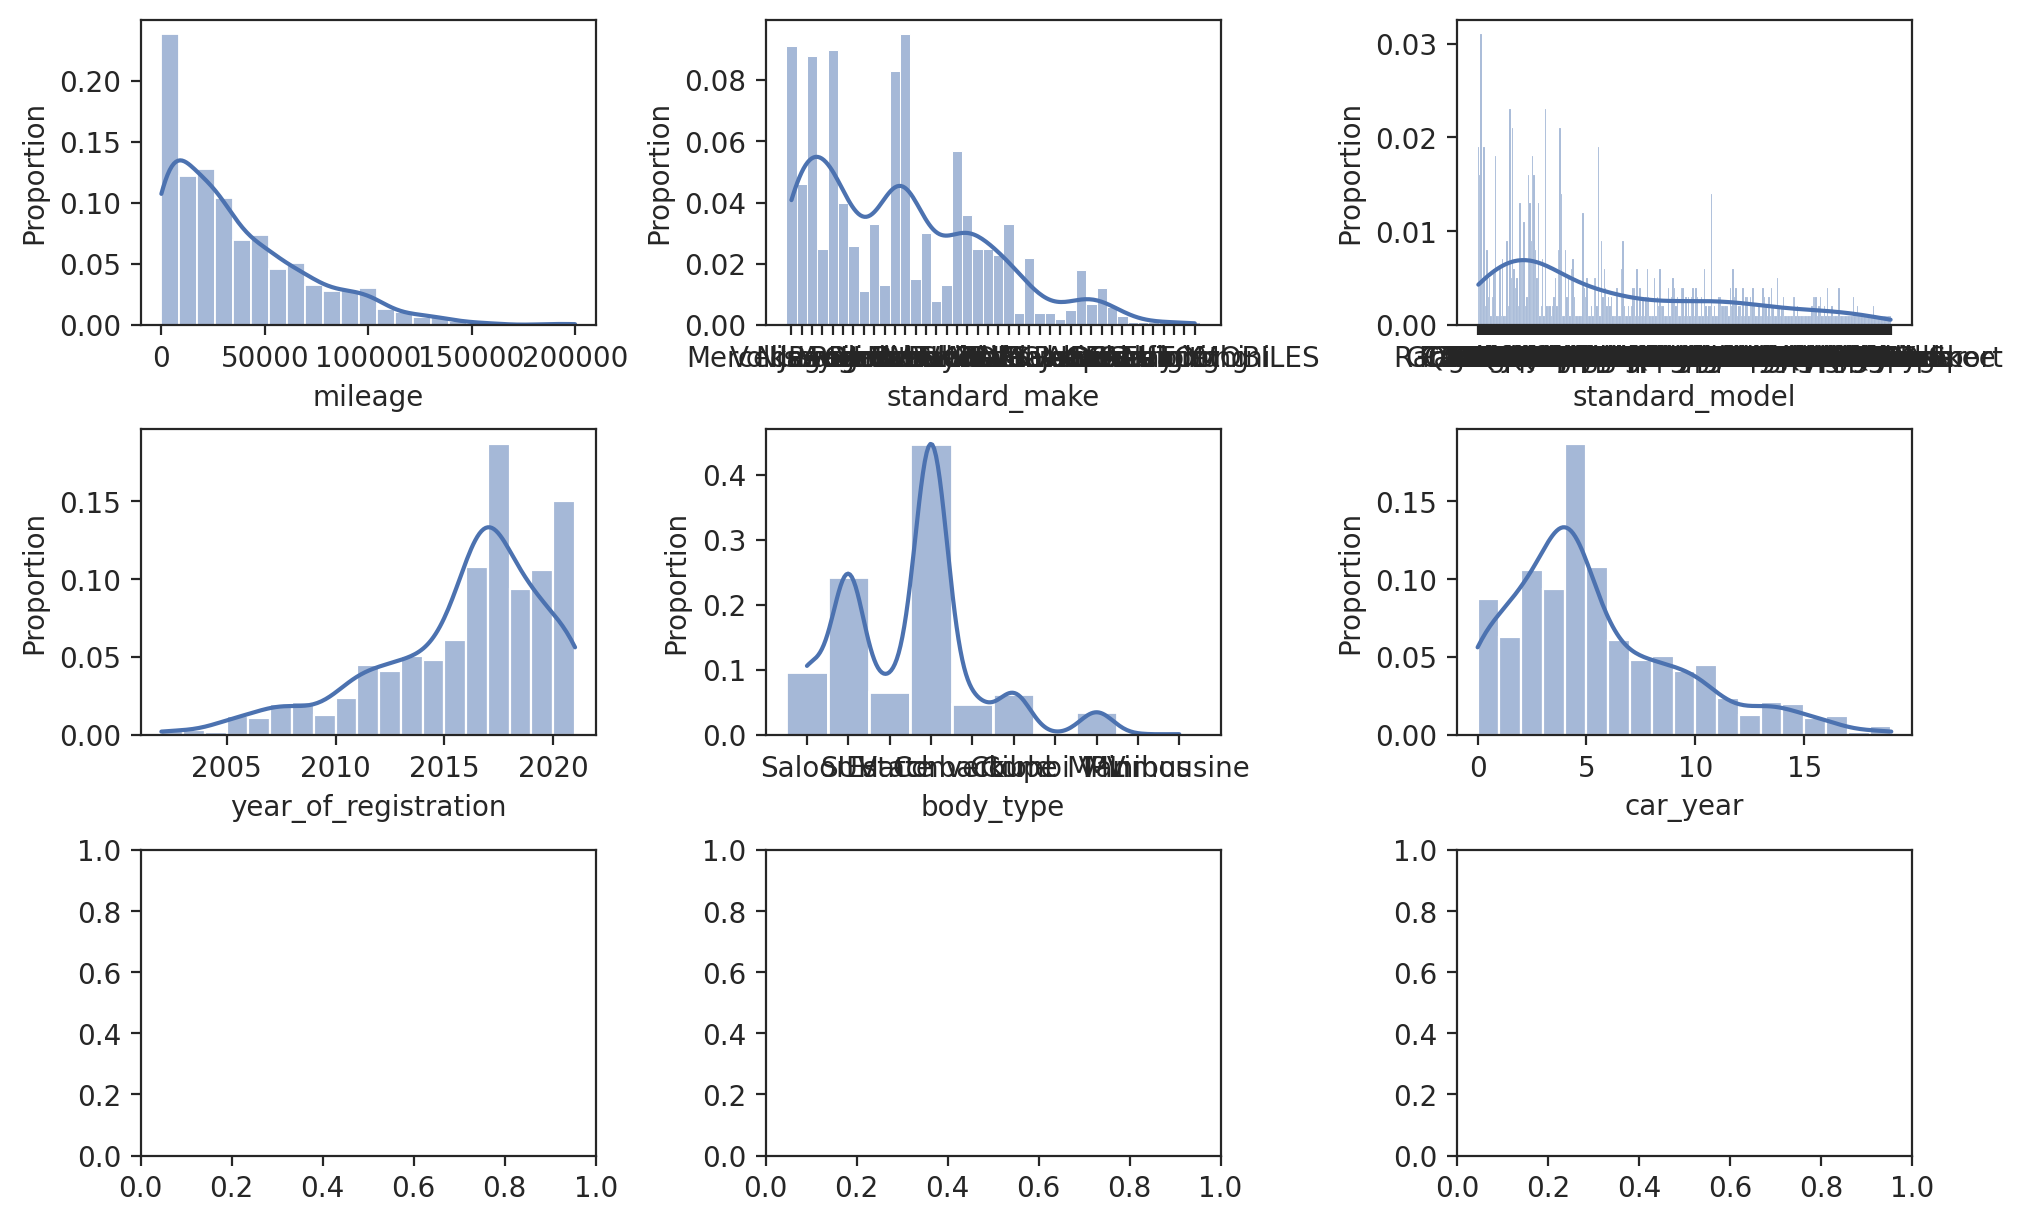

In [ ]:
featsel = df_encoded.sample(1000)
X_f = featsel.drop('price', axis=1)
y_f = featsel['price']
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42)
cols = X_f.columns
n_cols = 3
n_rows = 3
fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(10, n_rows*2), constrained_layout=True
)
for col, ax in zip(cols[:9], axs.ravel()):
    sns.histplot(x=X_f[col], stat='proportion', common_norm=False, kde=True, ax=ax);

Automated Feature Selection
- Using Select K best method, the original dataset refers to the dataset with all the features
- while the extended dataset refers to the augmented dataset

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

In [ ]:
new_ads0.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0      21.0            Grey         Volvo   
1   202007020778260  108230.0      61.0            Blue        Jaguar   
2   202007020778474    7800.0      17.0            Grey         SKODA   
3   202007080986776   45000.0      16.0           Brown      Vauxhall   
4   202007161321269   64000.0      64.0            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [ ]:
new_ads1.head()

mileage standard_make     standard_model  year_of_registration  price  \
0       0.0         Volvo               XC90                2021.0  73970   
1  108230.0        Jaguar                 XF                2011.0   7000   
2    7800.0         SKODA               Yeti                2017.0  14000   
3   45000.0      Vauxhall              Mokka                2016.0   7995   
4   64000.0    Land Rover  Range Rover Sport                2015.0  26995   

   body_type  car_year  
0        SUV       0.0  
1     Saloon      10.0  
2        SUV       4.0  
3  Hatchback       5.0  
4        SUV       6.0

In [ ]:
#original dataset
enc = new_ads0
X_c = enc.drop('price', axis=1)
y_c = enc['price']
X_c_train, Xc_val_test, y_c_train, yc_val_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
Xc_val, X_c_test, yc_val, y_c_test = train_test_split(Xc_val_test, yc_val_test, test_size=0.5, random_state=42)
encoder = TargetEncoder()
encoder.fit(X_c_train, y_c_train)
X_train_c = encoder.transform(X_c_train)
X_val_c = encoder.transform(Xc_val)
X_test_c = encoder.transform(X_c_test)


In [ ]:
#Reduced Dataset
#X_v = new_ads1.drop('price', axis=1)
X_v = df_encoded.drop('price', axis=1)
y_v = df_encoded['price']
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v, y_v, test_size=0.2, random_state=42)

encoder2 = TargetEncoder()
encoder2.fit(X_v_train, y_v_train)
X_train_v = encoder2.transform(X_v_train)
X_test_v = encoder2.transform(X_v_test)

In [ ]:
selector = SelectKBest(f_regression, k=5).fit(X_train_c, y_c_train)
X_c_orig = selector.transform(X_train_c)
selector_v = SelectKBest(f_regression, k=5).fit(X_train_v, y_v_train)
X_v_ext = selector_v.transform(X_train_v)

In [ ]:
print("Original dataset: ", selector.get_feature_names_out())
print()
print("Reduced dataset: ", selector_v.get_feature_names_out())
print()

Original dataset:  ['mileage' 'standard_make' 'standard_model' 'vehicle_condition'
 'body_type']

Reduced dataset:  ['mileage' 'standard_make' 'standard_model' 'year_of_registration'
 'body_type']



In [ ]:
model_v = LinearRegression().fit(X_c_orig, y_c_train)
scores_v = cross_val_score(model_v, X_c_orig, y_c_train)
scores_v.mean(), scores_v.std()

(0.6673278447950329, 0.03998942265849398)

In [ ]:
model = LinearRegression().fit(X_v_ext, y_v_train)
scores = cross_val_score(model, X_v_ext, y_v_train)
scores.mean(), scores.std()

(0.6600859470028586, 0.03988550965330926)

In [ ]:
feature_names_v = selector_v.get_feature_names_out()
feature_names = selector.get_feature_names_out()

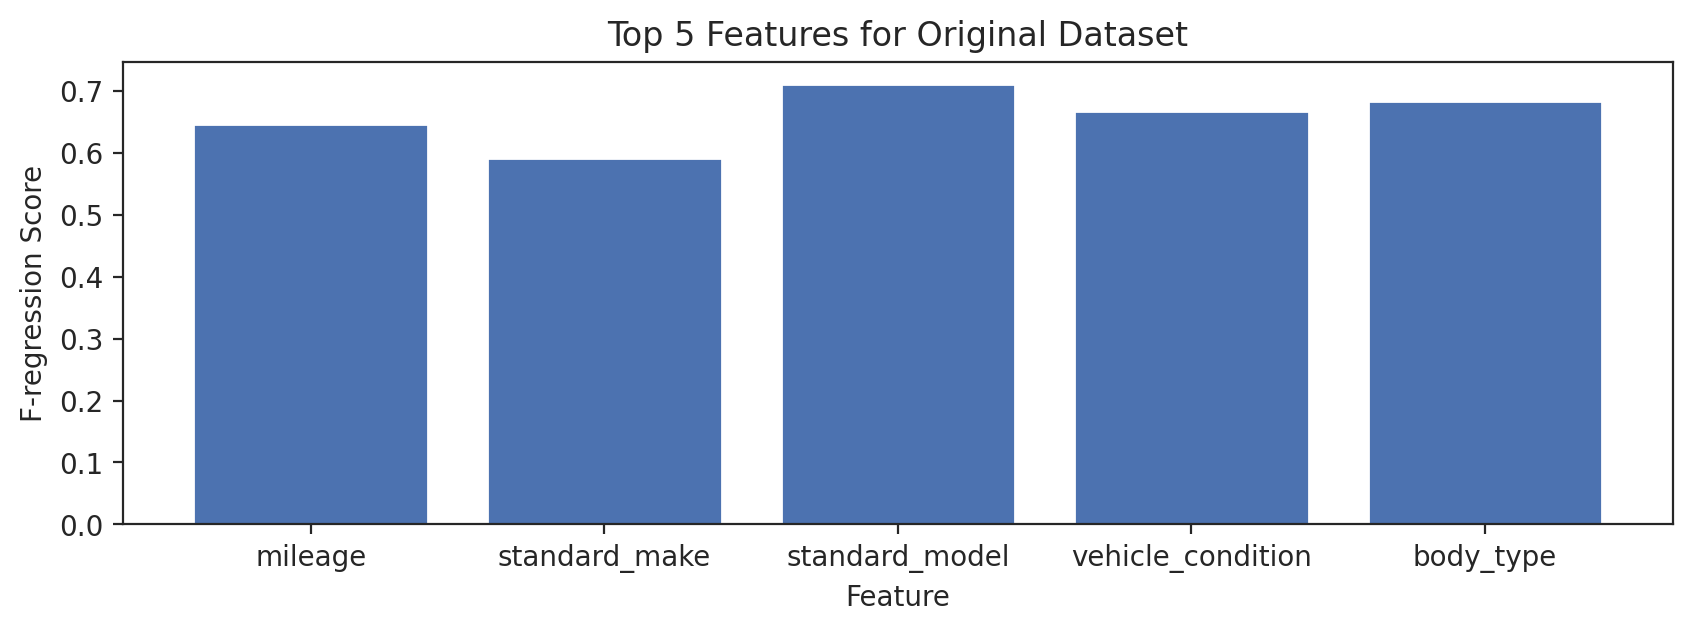

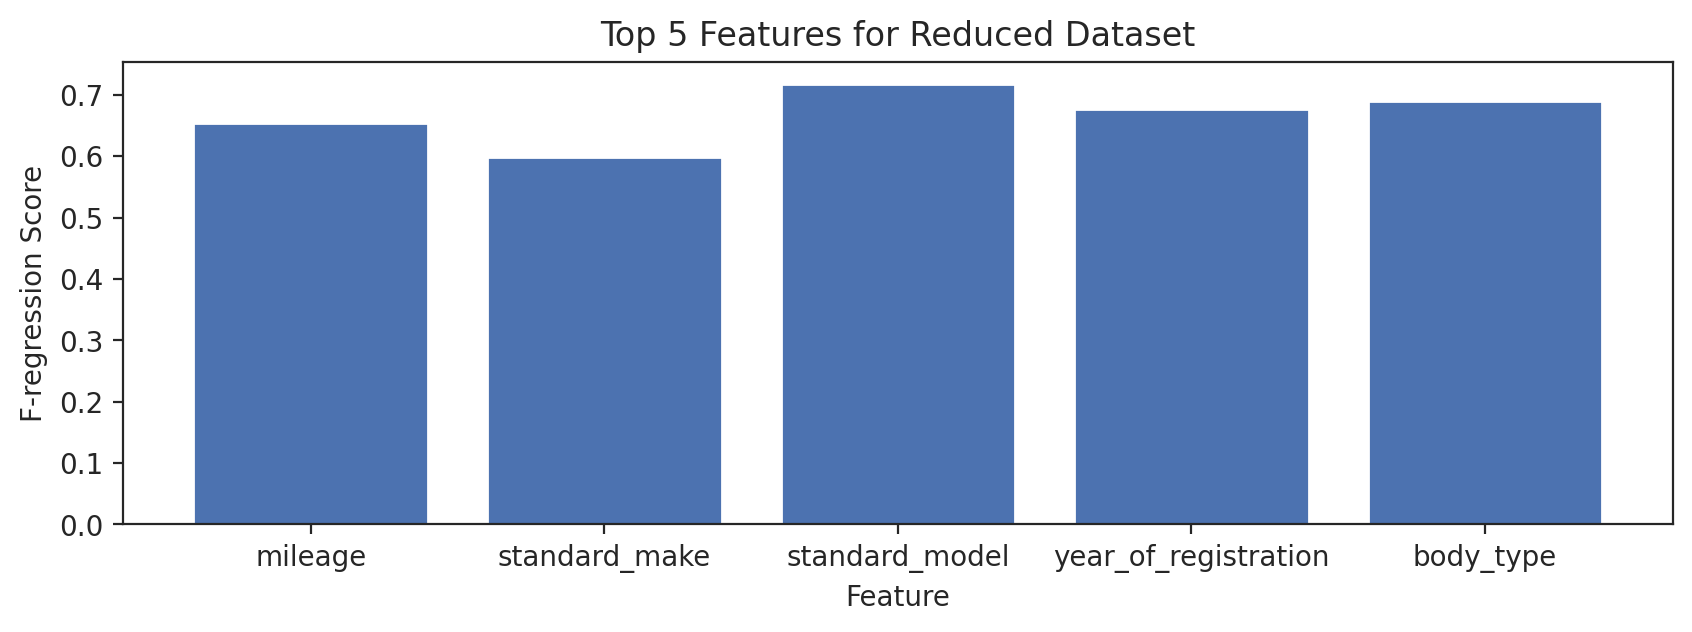

In [ ]:
plt.figure(figsize=(10, 3))
plt.bar(feature_names, scores)
plt.xlabel('Feature')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features for Original Dataset')
plt.show()

plt.figure(figsize=(10, 3))
plt.bar(feature_names_v, scores_v)
plt.xlabel('Feature')
plt.ylabel('F-regression Score')
plt.title('Top 5 Features for Reduced Dataset')
plt.show()

This graph shows that the best selected features to predict car price are the Mileage of the car, if they are new, and if it is a hatchback body type. So we can deduce that a low mileage car would sell faster.

Checking Collinearity

## Dimensionality Reduction

Dimensionality Reduction using PCA

In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.inspection import PartialDependenceDisplay, partial_dependence

import shap
shap.initjs()

In [ ]:
print("X train=", X_train_c.shape, "y_train=", y_c_train.shape)
print("X_test=", X_test_c.shape, "y_test=", y_c_test.shape)

X train= (312660, 11) y_train= (312660,)
X_test= (39083, 11) y_test= (39083,)


In [ ]:
X_train_c.keys()

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_c)

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

In [ ]:
cvr = np.cumsum(pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.196481                  0.196481
1                    0.344381                  0.147899
2                    0.447793                  0.103412
3                    0.541226                  0.093433
4                    0.630272                  0.089046
5                    0.717623                  0.087351
6                    0.802835                  0.085212
7                    0.869240                  0.066405
8                    0.932500                  0.063260
9                    0.981586                  0.049086
10                   1.000000                  0.018414

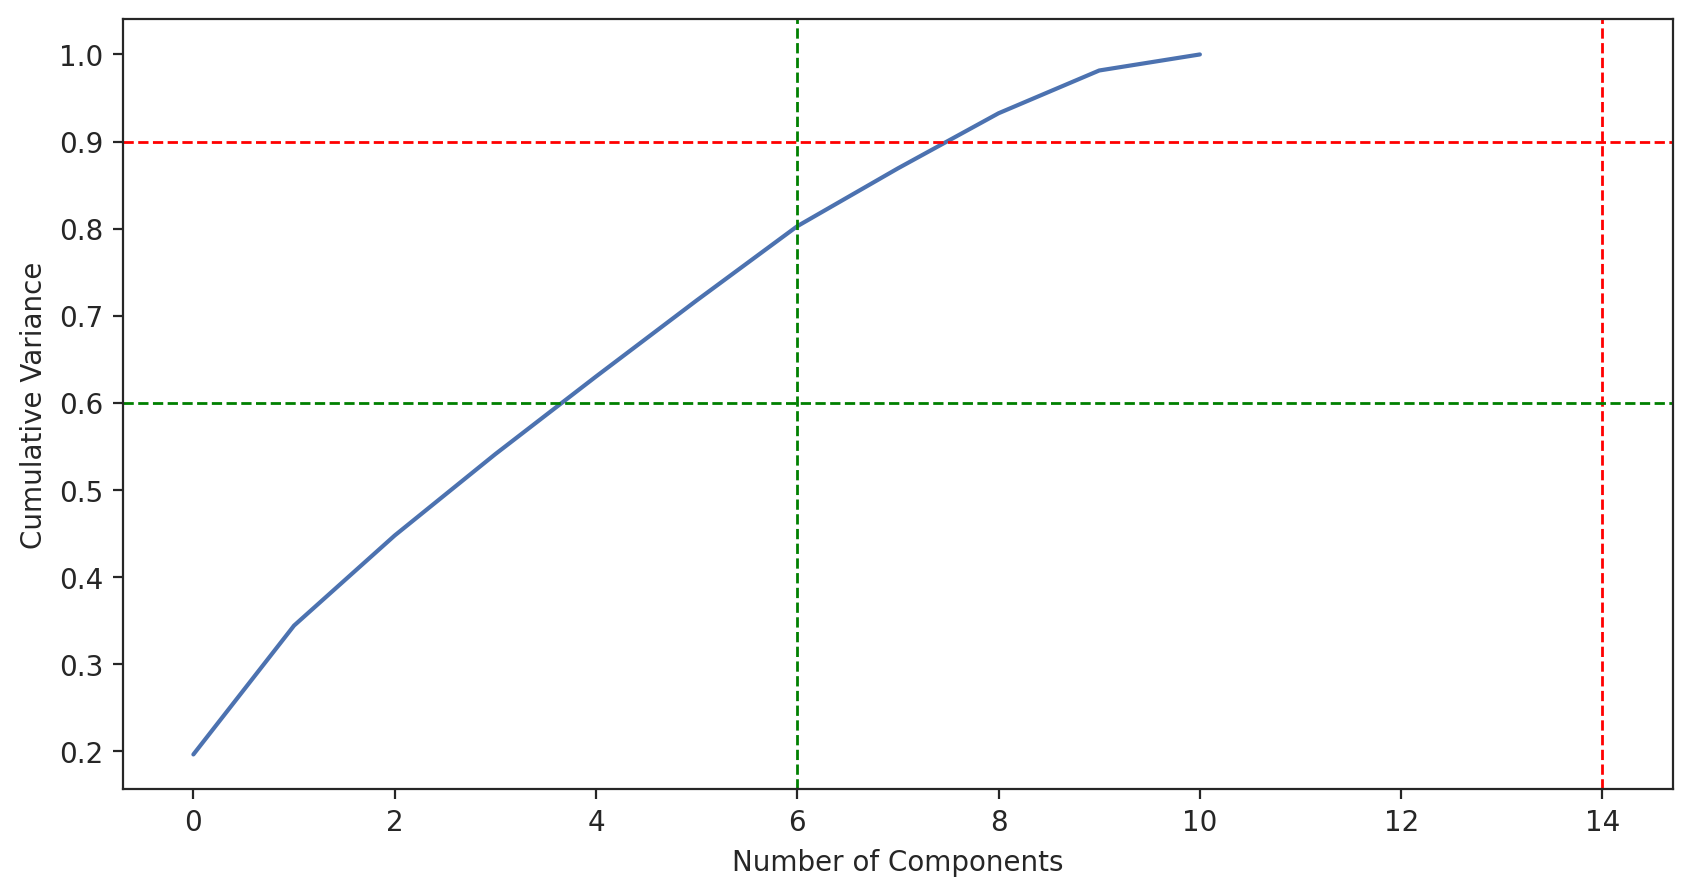

In [ ]:
# Plotting the data
fig = plt.figure(figsize = (10,5))
plt.plot(cvr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
# Draw lines to illustrate vertical and horizontal limits
plt.axhline(y = 0.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x = 14, color='red', linestyle='dashed', linewidth=1)
plt.axhline(y = 0.6, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x = 6, color='green', linestyle='dashed', linewidth=1)


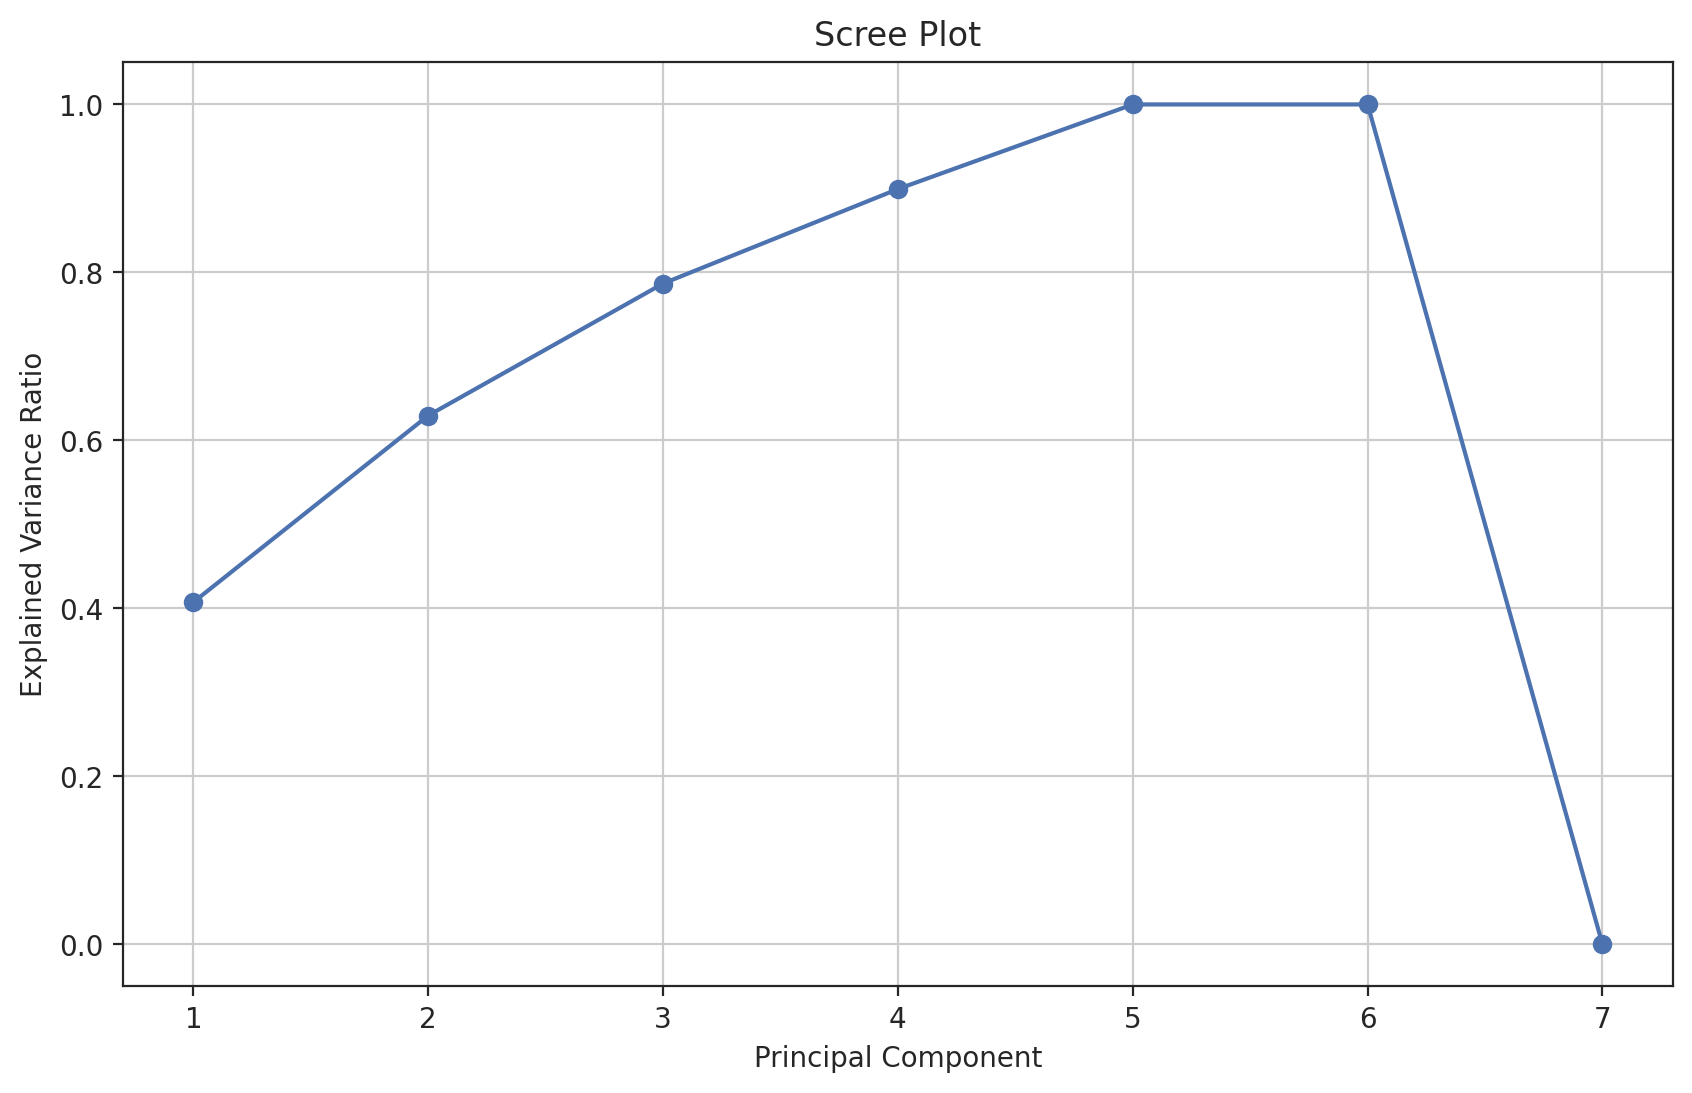

In [ ]:
evr = np.array([0.407455, 0.629670, 0.786803, 0.899284, 1.000000, 1.000000, 6.151891e-33])
pca_df = pd.DataFrame()
pca_df['Explained Variance Ratio'] = evr
plt.figure(figsize=(10, 6))
plt.plot(pca_df.index + 1, pca_df['Explained Variance Ratio'], marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


40 components describe 90% variance in the data
- This suggests that the 6 components alone are not capturing a significant portion of the overall variability present in the original dataset. capturing only 20% of the variance with 6 components may not be considered a good result in machine learning.
- If your goal is to significantly reduce the dimensionality of the data while sacrificing some information, then 20% explained variance might be acceptable. But if you aim to retain as much information as possible while reducing dimensionality, then 20% might be too low.

In [ ]:
pca_11 = PCA(n_components=11)
X_pca = pca_11.fit(X_train_c)
X_pca = pca_11.transform(X_train_c)

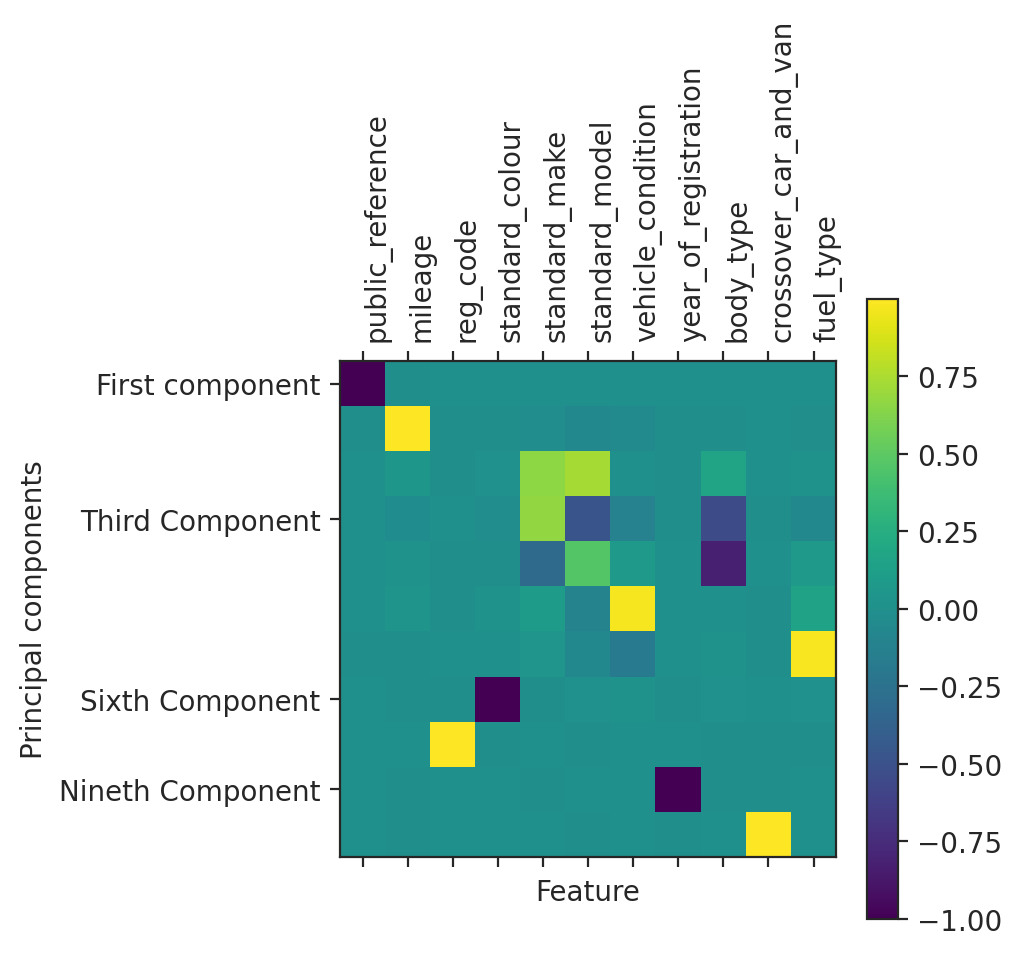

In [ ]:
plt.matshow(pca_11.components_, cmap='viridis')
plt.yticks([0, 3, 7, 9], ["First component", "Third Component", "Sixth Component", 'Nineth Component'])
plt.colorbar()
plt.xticks(range(len(X_train_c.columns)),
           X_train_c.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

## LINEAR REGRESSION

In [ ]:
lr1d = Pipeline(
    steps=[
        ('est', LinearRegression())
    ]
)

In [ ]:
lr1d.fit(X_train_c, y_c_train)

Pipeline(steps=[('est', LinearRegression())])

In [ ]:
eval_results = cross_validate(
    lr1d, X_train_c, y_c_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
lr1d_pred1 = lr1d.predict(X_train_c)
lr1d_mae1 = mean_absolute_error(y_c_train, lr1d_pred1)
lr1d_mse1 = mean_squared_error(y_c_train, lr1d_pred1)
lr1d_r21 = r2_score(y_c_train, lr1d_pred1)

print("Mean Absolute Error (MAE):", lr1d_mae1)
print("Mean Squared Error (MSE):", lr1d_mse1)
print("R-squared (R2) Score:", lr1d_r21)

Mean Absolute Error (MAE): 4530.641177334369
Mean Squared Error (MSE): 140111542.69541645
R-squared (R2) Score: 0.6681014637970937


In [ ]:
lr1d_pred = lr1d.predict(X_test_c)
lr1d_mae = mean_absolute_error(y_c_test,lr1d_pred)
lr1d_mse = mean_squared_error(y_c_test, lr1d_pred)
lr1d_r2 = r2_score(y_c_test,lr1d_pred)

print("Mean Absolute Error (MAE):", lr1d_mae)
print("Mean Squared Error (MSE):", lr1d_mse)
print("R-squared (R2) Score:", lr1d_r2)

Mean Absolute Error (MAE): 4679.6214447578095
Mean Squared Error (MSE): 488668947.84149885
R-squared (R2) Score: 0.4285219353549029


In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(4531.002101291481, 32.58775836875194)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(4530.415885369286, 11.862779914653286)

In [ ]:
lr1d['est'].coef_

array([-8.77457499e-09, -1.33548773e-01,  1.06556696e+01,  8.39088595e-02,
        2.76808585e-01,  8.60880162e-01,  4.19694017e-01,  8.26027422e+01,
       -3.11740931e-02,  1.37774643e+03,  2.57820011e-01])

In [ ]:
X_train_c.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

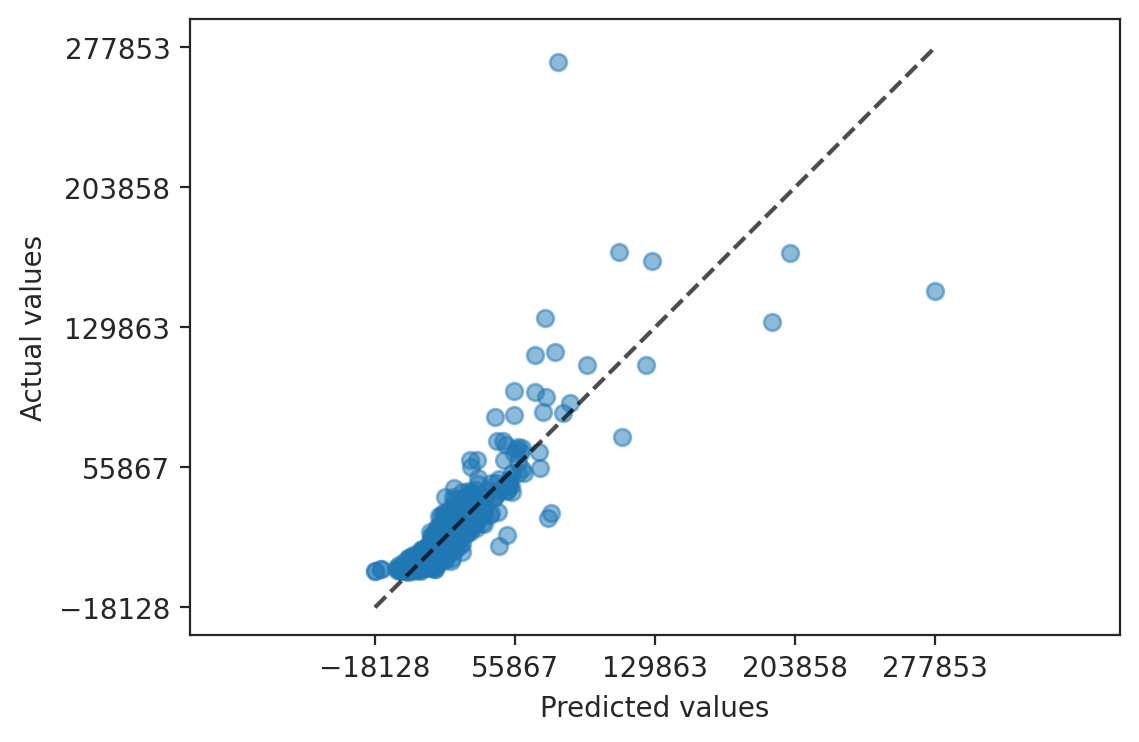

In [ ]:
PredictionErrorDisplay.from_estimator(
    lr1d, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
poly_reg = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(2, include_bias=False)),
        ('est', LinearRegression())
    ]
)

In [ ]:
poly_reg.fit(X_train_c, y_c_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('est', LinearRegression())])

In [ ]:
poly_pred = poly_reg.predict(X_test_c)
poly_mae = mean_absolute_error(y_c_test,poly_pred)
poly_mse = mean_squared_error(y_c_test, poly_pred)
poly_r2 = r2_score(y_c_test,poly_pred)

print("TEST MAE:", poly_mae)
print("TEST MSE:", poly_mse)
print("TEST R2 Score:", poly_r2)

TEST MAE: 4643.597781666453
TEST MSE: 487881984.0716579
TEST R2 Score: 0.42944225684068804


In [ ]:
poly_pred1 = poly_reg.predict(X_train_c)
poly_mae1 = mean_absolute_error(y_c_train, poly_pred1)
poly_mse1 = mean_squared_error(y_c_train, poly_pred1)
poly_r21 = r2_score(y_c_train, poly_pred1)

print("Mean Absolute Error (MAE):", lr1d_mae1)
print("Mean Squared Error (MSE):", lr1d_mse1)
print("R-squared (R2) Score:", lr1d_r21)

Mean Absolute Error (MAE): 4530.641177334369
Mean Squared Error (MSE): 140111542.69541645
R-squared (R2) Score: 0.6681014637970937


In [ ]:
eval_results = cross_validate(
    poly_reg, X_train_c, y_c_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(4392.145779317179, 95.16163448721969)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(4393.421028554289, 88.42341896131245)

In [ ]:
#poly_reg['est'].coef_

In [ ]:
#poly_reg['poly'].get_feature_names_out()

In [ ]:
pd.DataFrame(
    dict(
        feat=poly_reg['poly'].get_feature_names_out(),
        coef=poly_reg['est'].coef_
    ),
)

feat          coef
0                  public_reference  1.408782e-11
1                           mileage  5.802725e-09
2                          reg_code  3.392393e-13
3                   standard_colour  1.241975e-13
4                     standard_make  7.386443e-14
..                              ...           ...
72  body_type crossover_car_and_van -9.463861e-15
73              body_type fuel_type -2.054952e-09
74          crossover_car_and_van^2  2.744461e-21
75  crossover_car_and_van fuel_type  6.132252e-15
76                      fuel_type^2 -1.018211e-09

[77 rows x 2 columns]

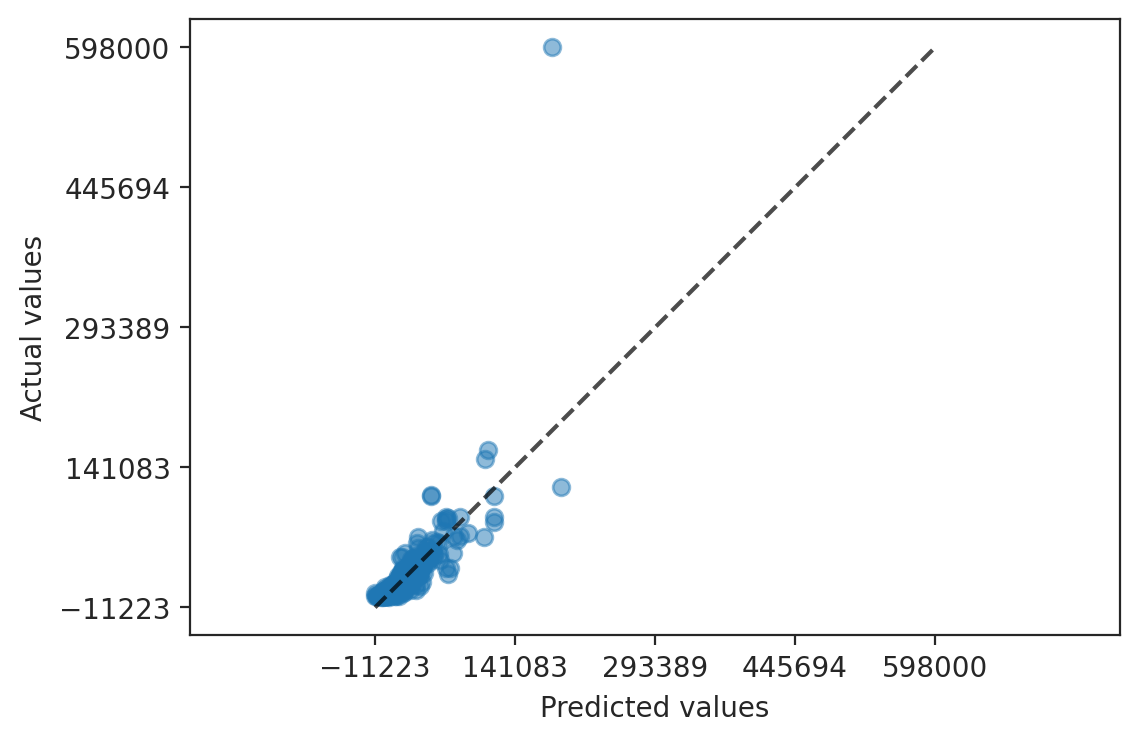

In [ ]:
PredictionErrorDisplay.from_estimator(
    poly_reg, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#X_train_c1 = X_train_c.sample(50000)
#y_c_train1 = y_c_train.sample(50000)

In [ ]:
X_train_c.shape

(312660, 11)

In [ ]:
y_c_train.shape

(312660,)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_c_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_pred0 = rf.predict(X_train_c)
rf_mae0 = mean_absolute_error(y_c_train,rf_pred0)
rf_mse0 = mean_squared_error(y_c_train, rf_pred0)
rf_r20 = r2_score(y_c_train,rf_pred0)

print("Mean Absolute Error (MAE):", rf_mae0)
print("Mean Squared Error (MSE):", rf_mse0)
print("R-squared (R2) Score:", rf_r20)

Mean Absolute Error (MAE): 695.3267756778973
Mean Squared Error (MSE): 6404902.203278354
R-squared (R2) Score: 0.9848279618873942


In [ ]:
rf_pred = rf.predict(X_test_c)
rf_mae = mean_absolute_error(y_c_test,rf_pred)
rf_mse = mean_squared_error(y_c_test, rf_pred)
rf_r2 = r2_score(y_c_test,rf_pred)
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2) Score:", rf_r2)

Mean Absolute Error (MAE): 1880.7278840479787
Mean Squared Error (MSE): 126504158.22136645
R-squared (R2) Score: 0.8520586343183145


In [ ]:
# Get array of feature importances
feature_importances = rf.feature_importances_
feature_importances

array([1.70814606e-02, 1.12528220e-01, 1.09747879e-02, 8.03459781e-03,
       8.88257195e-02, 6.23983699e-01, 4.87097720e-04, 1.10445348e-01,
       1.02470680e-02, 6.16464163e-04, 1.67755374e-02])

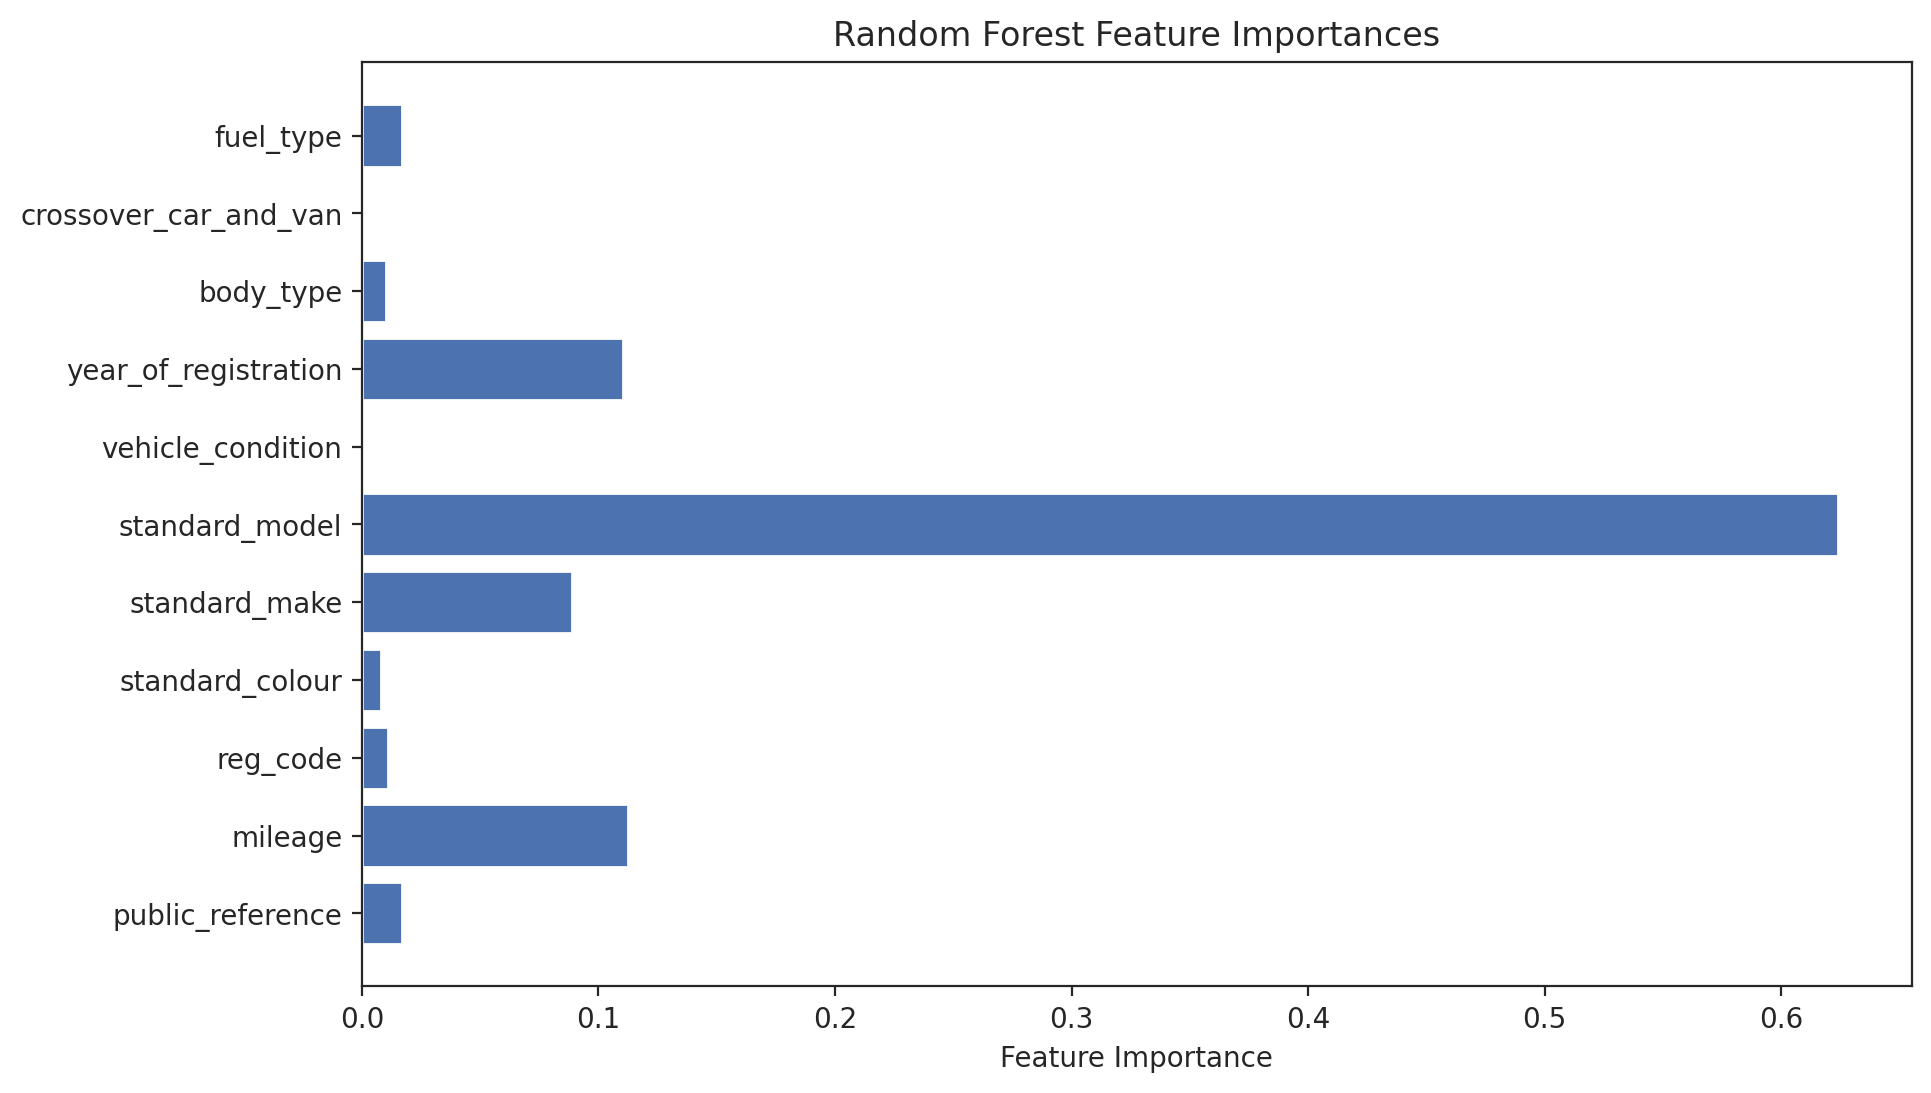

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_c.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [ ]:
# Create index of corresponding feature names (excluding target)
feature_names = X_train_c.columns
feature_names

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf.feature_importances_})
feature_importance_df

Feature  Importance
0        public_reference    0.017081
1                 mileage    0.112528
2                reg_code    0.010975
3         standard_colour    0.008035
4           standard_make    0.088826
5          standard_model    0.623984
6       vehicle_condition    0.000487
7    year_of_registration    0.110445
8               body_type    0.010247
9   crossover_car_and_van    0.000616
10              fuel_type    0.016776

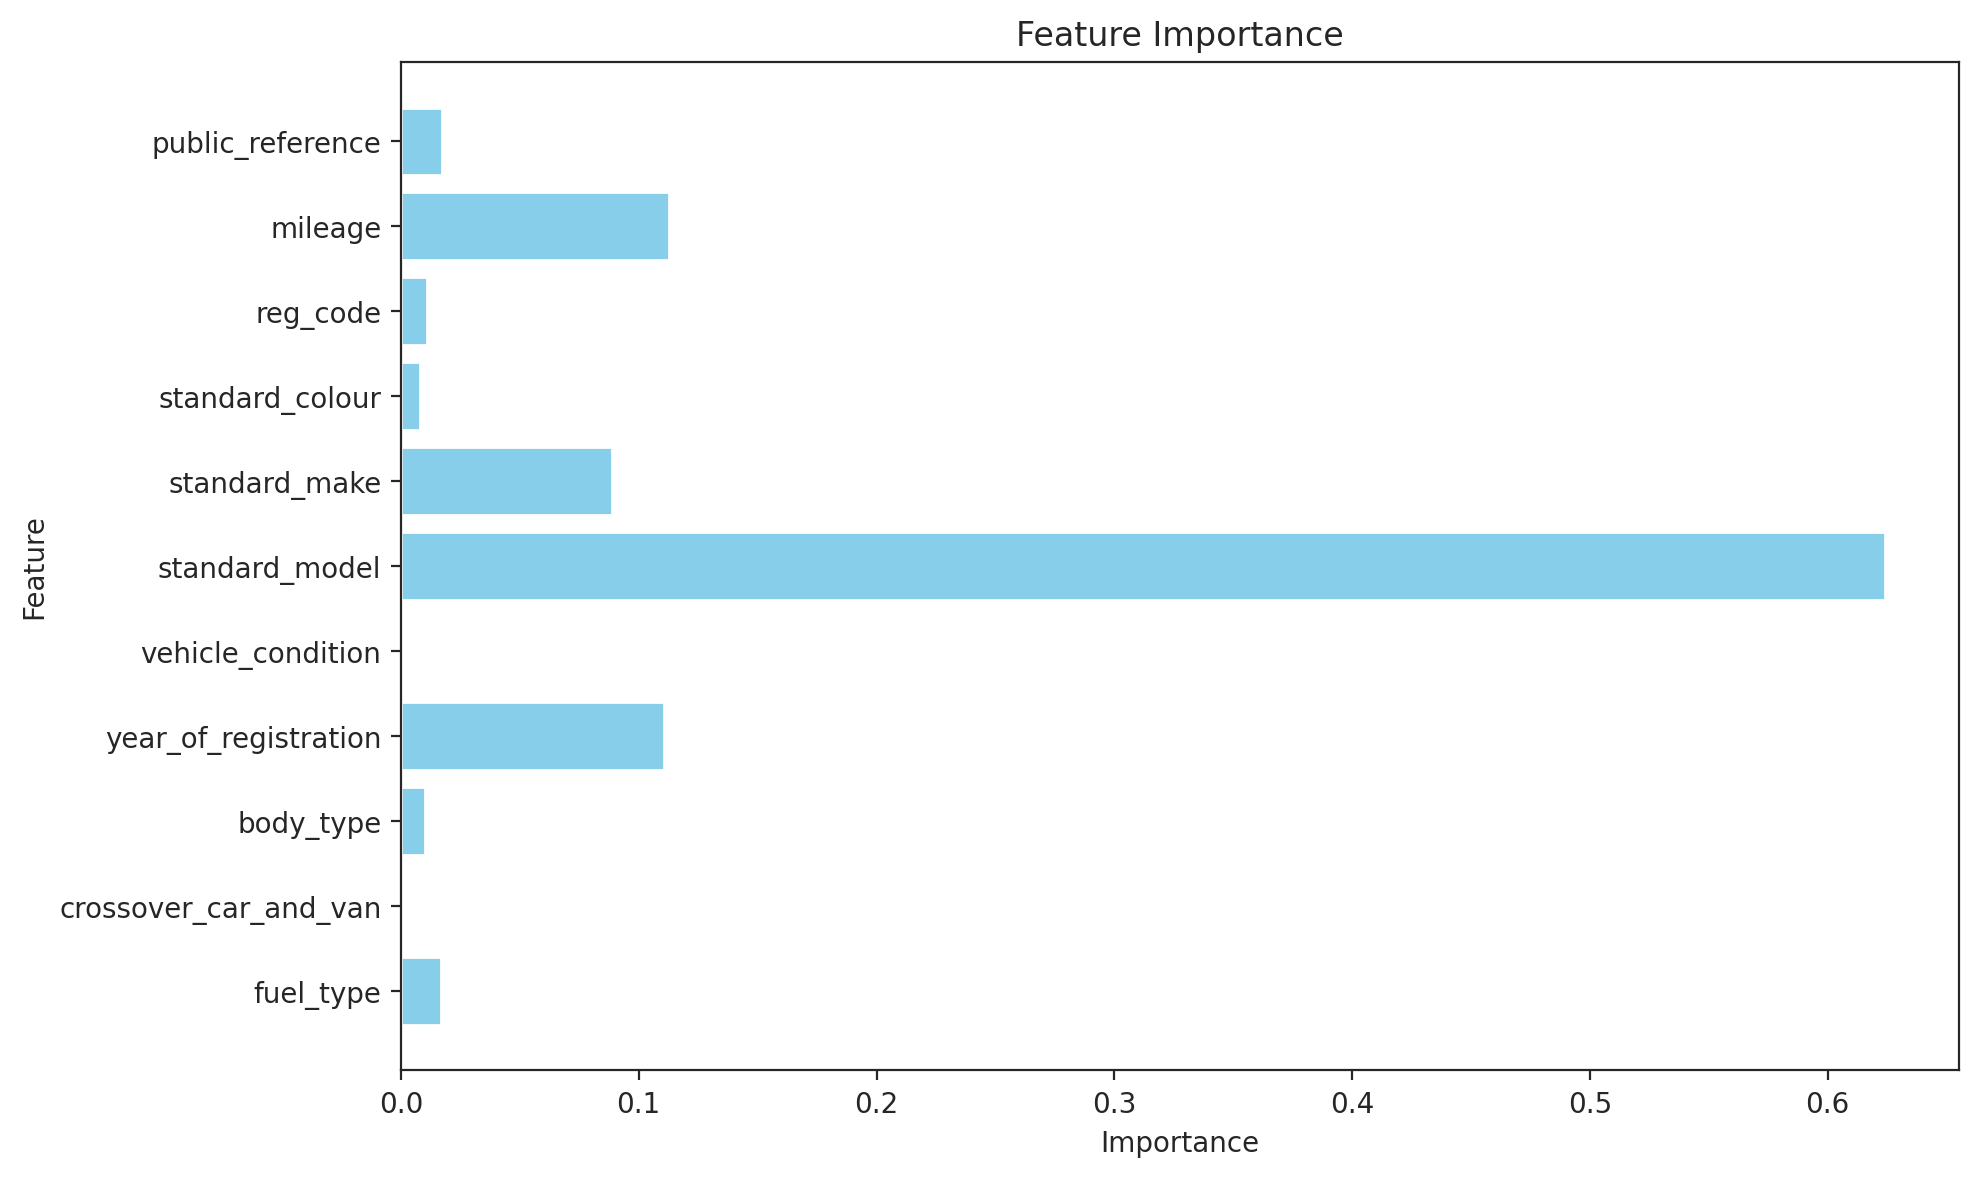

In [ ]:
import matplotlib.pyplot as plt

# Feature names and importances (assuming you have them from previous steps)
feature_names = ['public_reference', 'mileage', 'reg_code', 'standard_colour',
                 'standard_make', 'standard_model', 'vehicle_condition',
                 'year_of_registration', 'body_type', 'crossover_car_and_van', 'fuel_type']
importances = [0.0170811, 0.1125282, 0.0109753, 0.0080354, 0.0888265, 0.6239846, 0.0004877, 0.1104458, 0.0102479, 0.00061610, 0.016776]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set a better figure size for readability
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()

In [ ]:
# Sort dataframe by importance (ascending order is ascending=True, descending order is ascending=False)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
feature_importance_df

Feature  Importance
6       vehicle_condition    0.000487
9   crossover_car_and_van    0.000616
3         standard_colour    0.008035
8               body_type    0.010247
2                reg_code    0.010975
10              fuel_type    0.016776
0        public_reference    0.017081
4           standard_make    0.088826
7    year_of_registration    0.110445
1                 mileage    0.112528
5          standard_model    0.623984

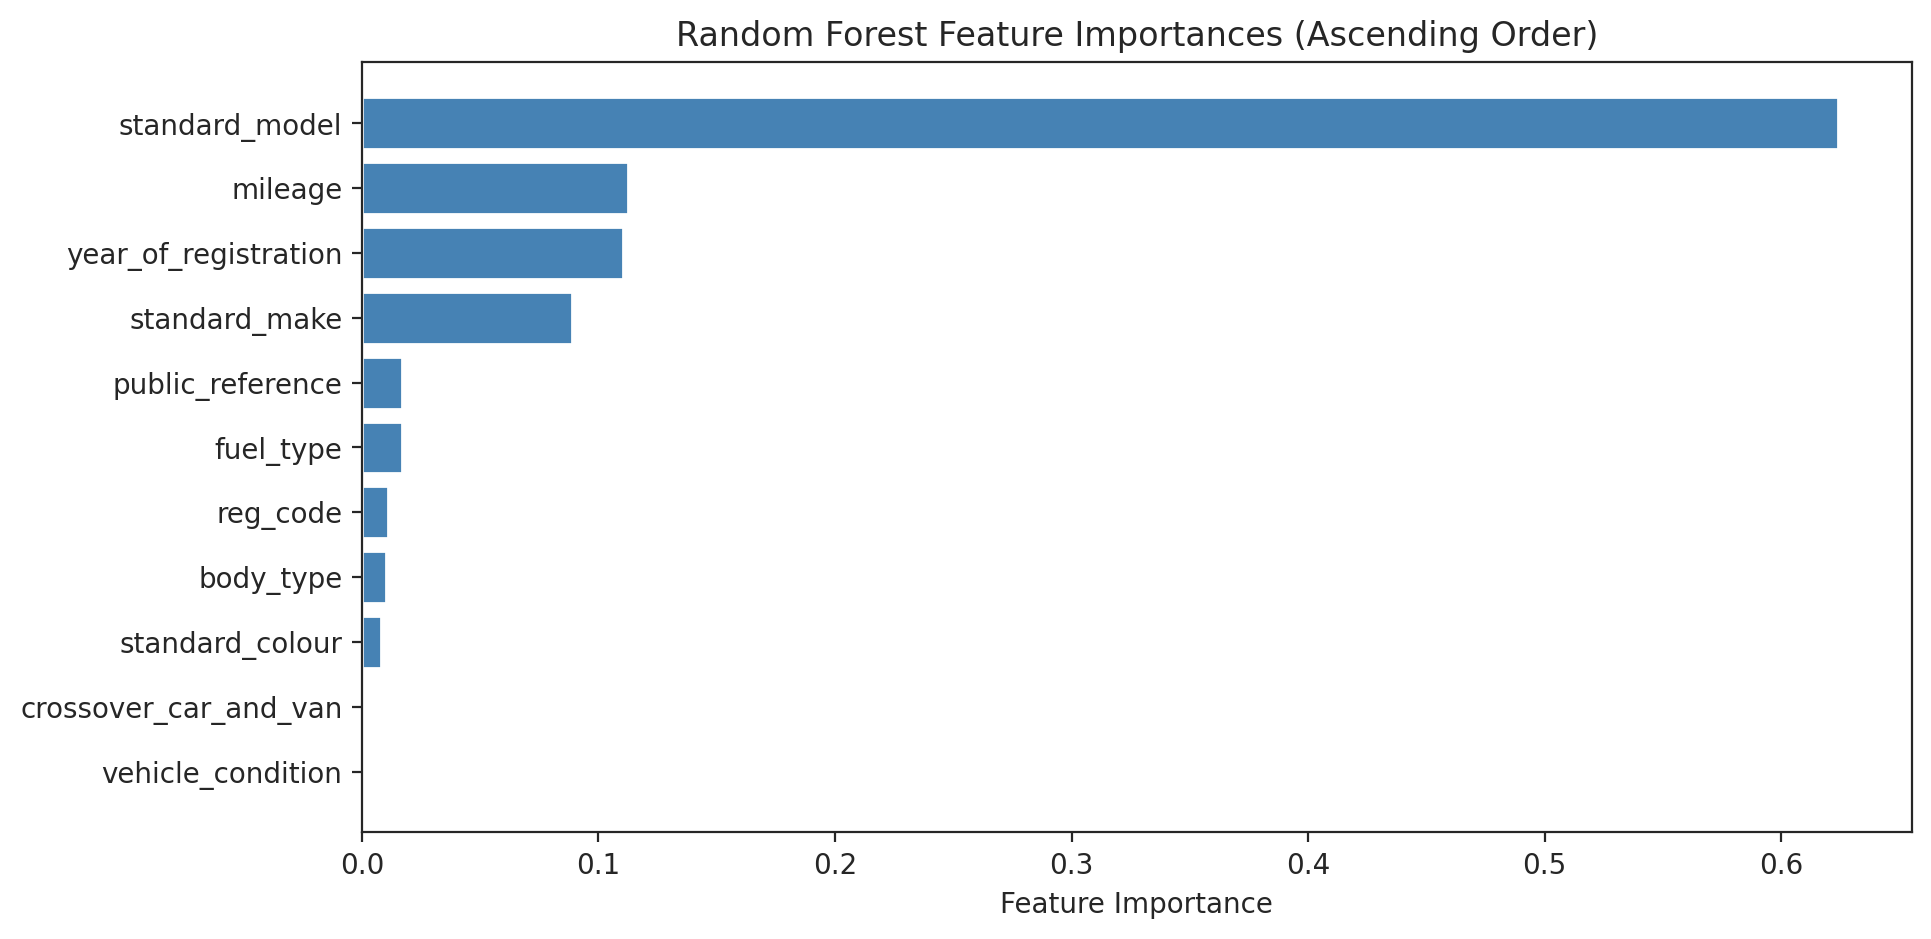

In [ ]:
# Plot Random Forest Feature Importances in ascending order
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances (Ascending Order)')
plt.show()

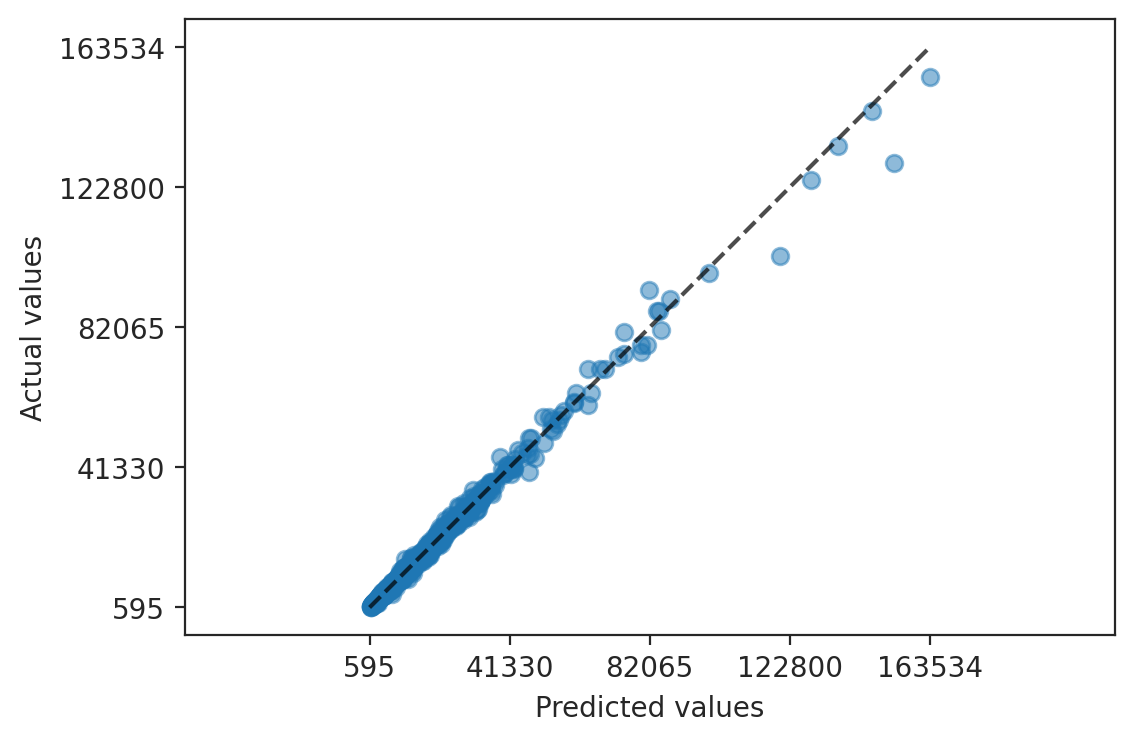

In [ ]:
PredictionErrorDisplay.from_estimator(
    rf, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

## GRADIENT BOOSTING REGRESSOR

I did manual grid search by tweaking the number of trees "n_estimators" , from 100 to 80 to 60 etc

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'learning_rate': 0.1,
    'n_estimators': 200,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train_c, y_c_train)
gbr_pred = gbr.predict(X_test_c)

In [ ]:
gbr_mae = mean_absolute_error(y_c_test,gbr_pred)
gbr_mse = mean_squared_error(y_c_test, gbr_pred)
gbr_r2 = r2_score(y_c_test,gbr_pred)
print("Mean Absolute Error (MAE):", gbr_mae)
print("Mean Squared Error (MSE):", gbr_mse)
print("R-squared (R2) Score:", gbr_r2)

Mean Absolute Error (MAE): 2755.7894055385395
Mean Squared Error (MSE): 106506742.8627195
R-squared (R2) Score: 0.875444782092882


In [ ]:
gbr_pred1 = gbr.predict(X_train_c)
gbr_mae1 = mean_absolute_error(y_c_train,gbr_pred1)
gbr_mse1 = mean_squared_error(y_c_train, gbr_pred1)
gbr_r21 = r2_score(y_c_train,gbr_pred1)
print("Mean Absolute Error (MAE):", gbr_mae1)
print("Mean Squared Error (MSE):", gbr_mse1)
print("R-squared (R2) Score:", gbr_r21)

Mean Absolute Error (MAE): 2697.954591713638
Mean Squared Error (MSE): 39392172.78809254
R-squared (R2) Score: 0.9066871705592349


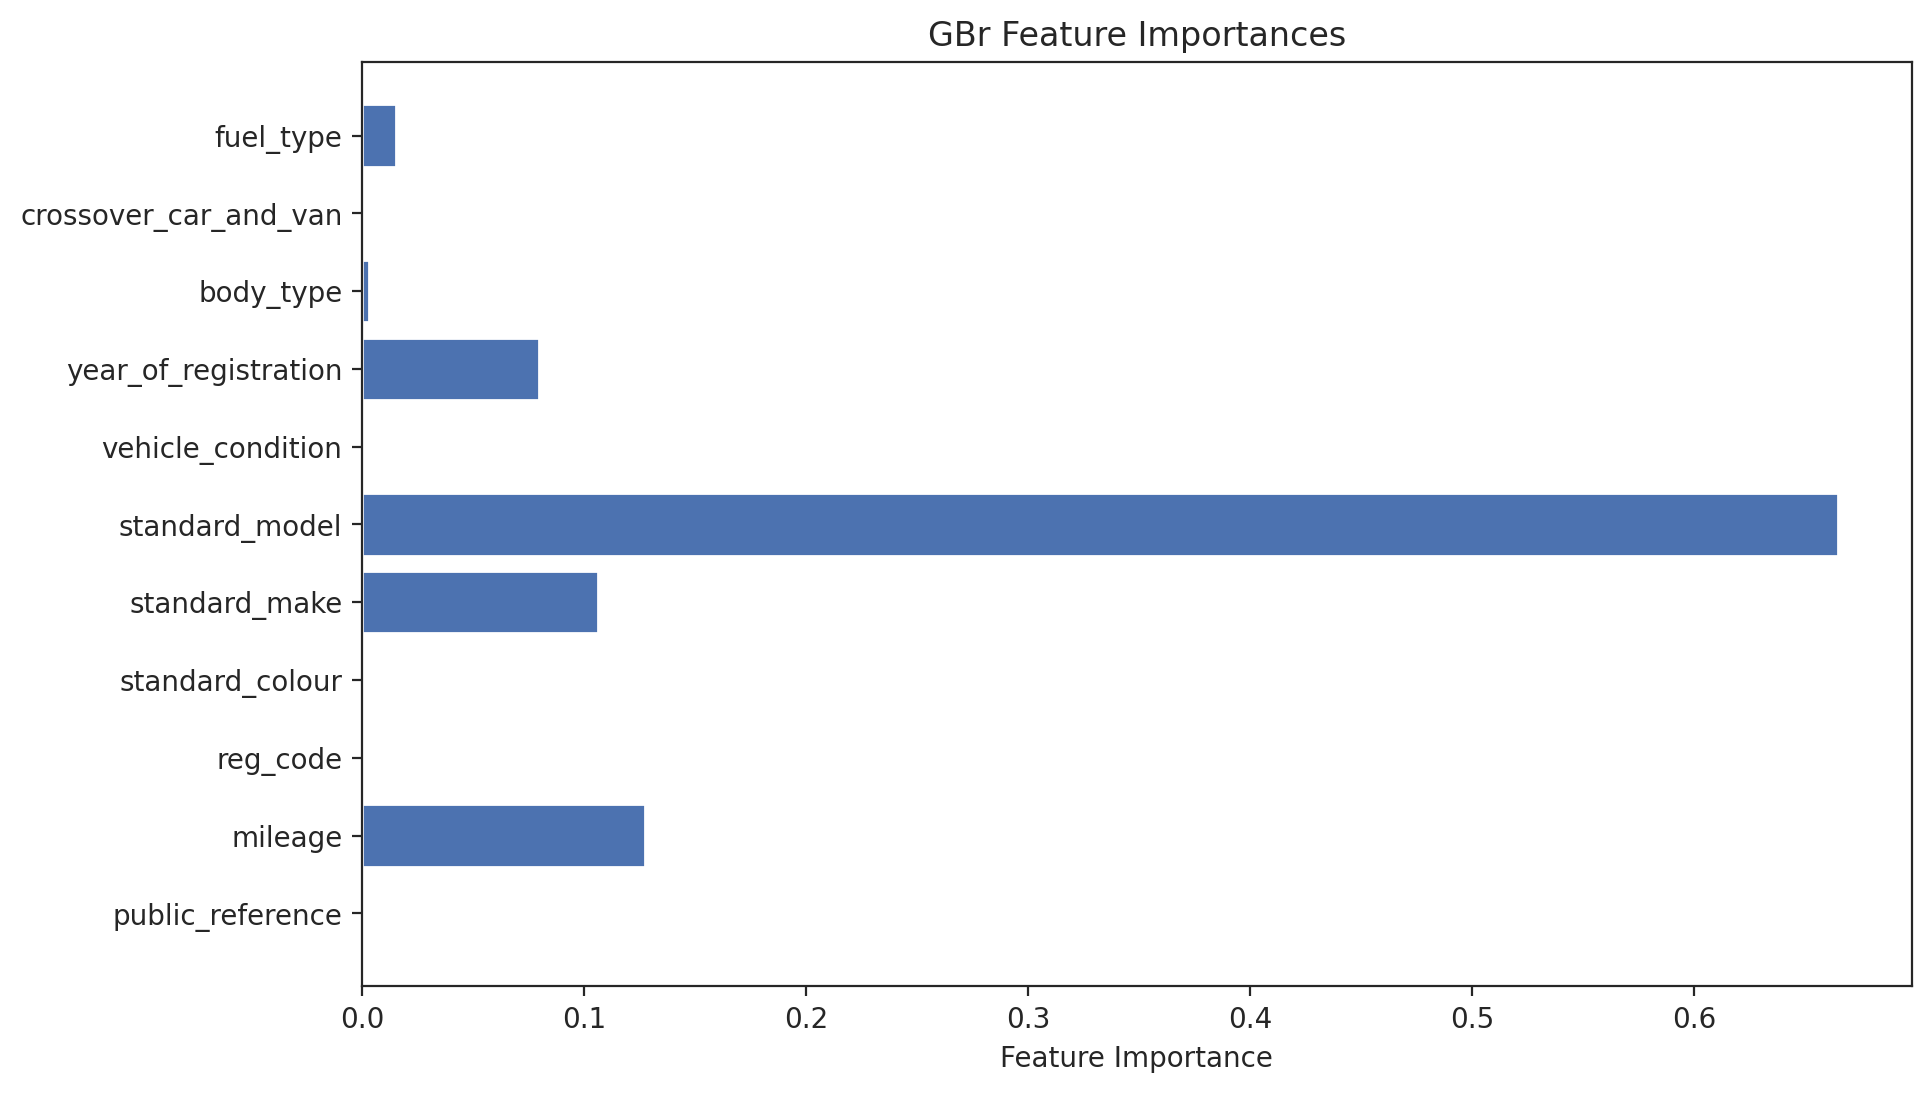

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_c.columns, gbr.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('GBr Feature Importances')
plt.show()

In [ ]:
# Create a DataFrame with feature names and their importances
feature_importance_gbr = pd.DataFrame({'Feature': feature_names, 'Importance': gbr.feature_importances_})
feature_importance_gbr

ValueError: All arrays must be of the same length

In [ ]:
# Sort dataframe by importance (ascending order is ascending=True, descending order is ascending=False)
feature_importance_gbr1 = feature_importance_gbr.sort_values(by='Importance', ascending=True)
feature_importance_gbr1

In [ ]:
# Plot Random Forest Feature Importances in ascending order
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_gbr1['Feature'], feature_importance_gbr1['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('GBR Feature Importances (Ascending Order)')
plt.show()

## RESULTS

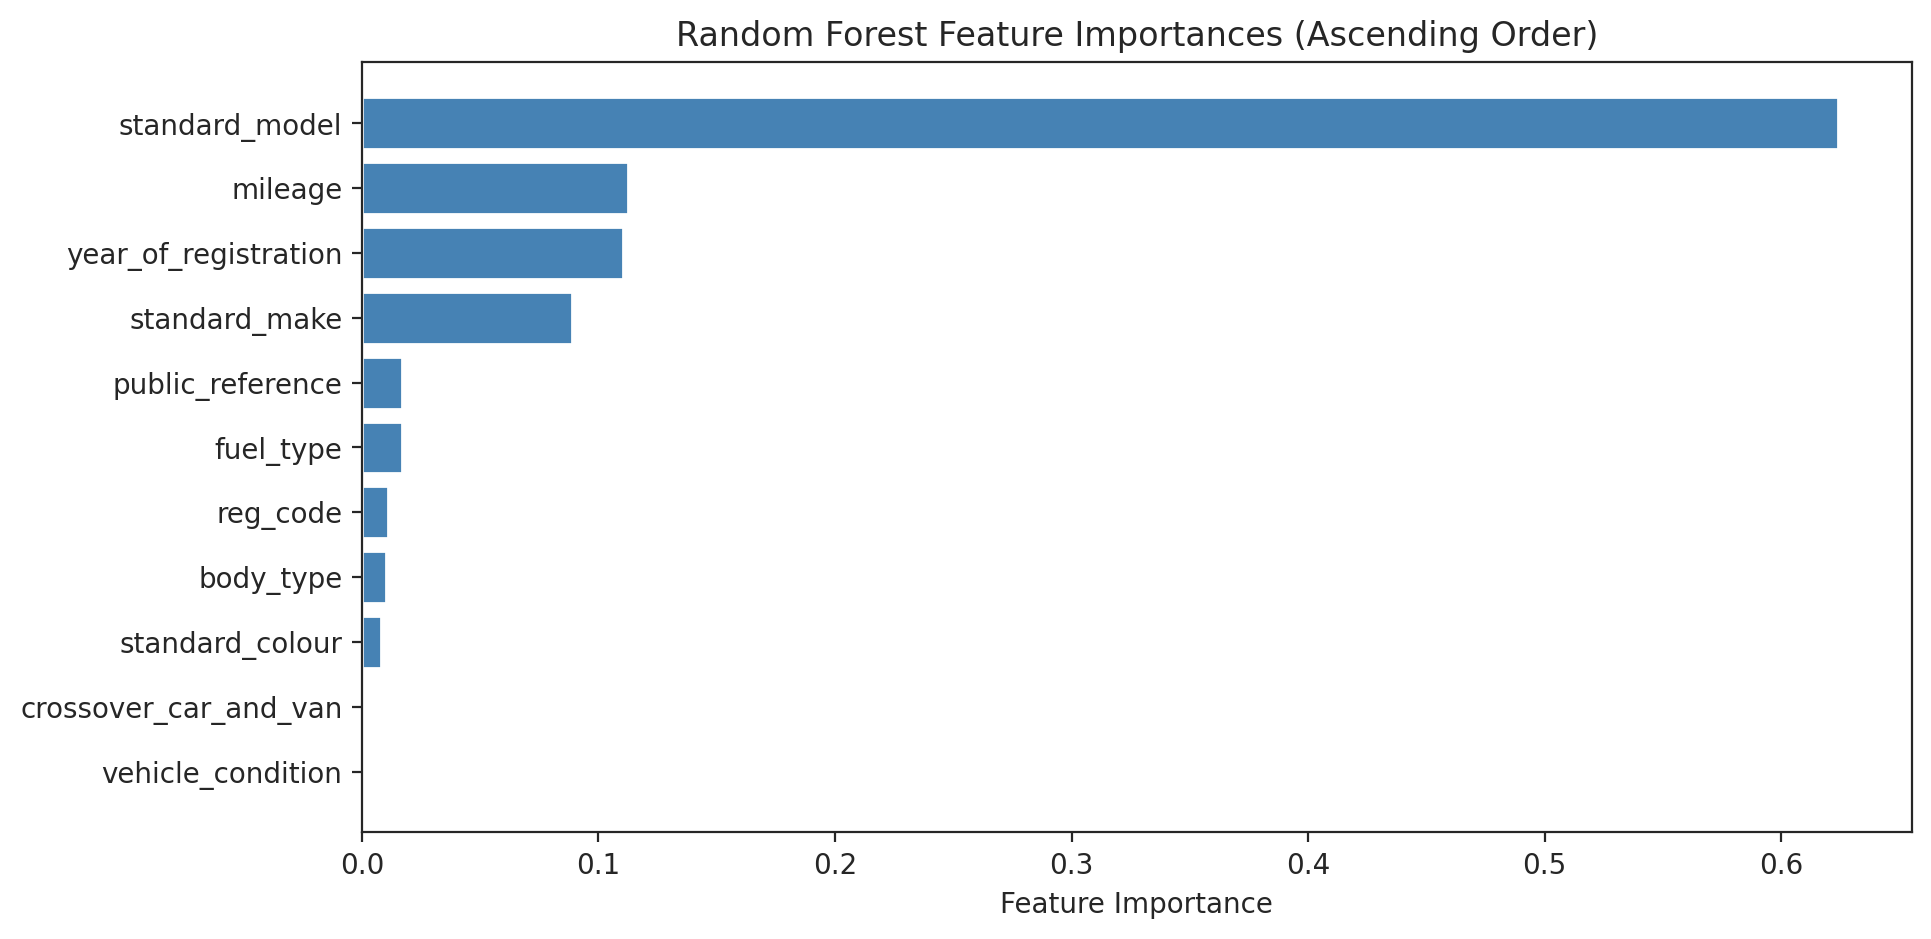

In [ ]:
# Plot Random Forest Feature Importances in ascending order
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances (Ascending Order)')
plt.show()

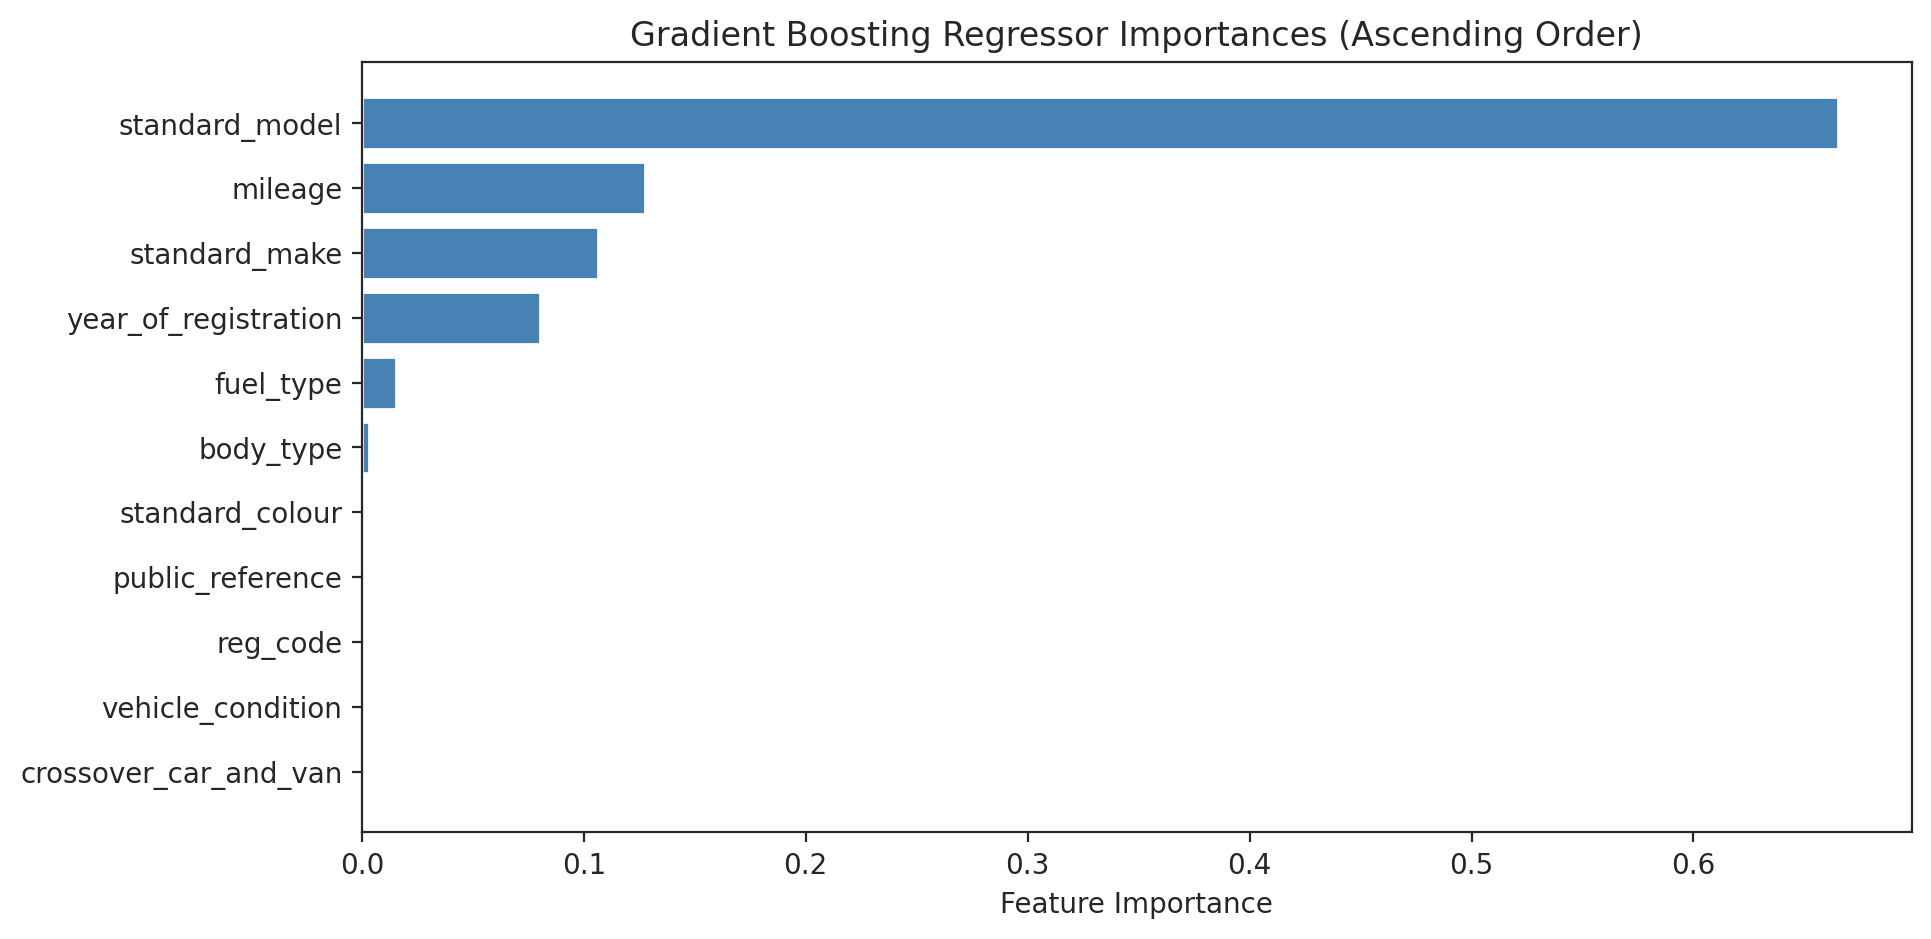

In [ ]:
# Plot Gradient Boosting Regressor Feature Importances in ascending order
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_gbr1['Feature'], feature_importance_gbr1['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regressor Importances (Ascending Order)')
plt.show()

In [ ]:
grid_results = pd.DataFrame({
    'Model': ['Lr', 'GBr', 'RFr'],
    'MAE': [lr1d_mae, gbr_mae, rf_mae],
    'MSE': [lr1d_mse, gbr_mse, rf_mse],
    'R2': [lr1d_r2, gbr_r2, rf_r2],
})
grid_results

Model          MAE           MSE        R2
0    Lr  4679.621445  4.886689e+08  0.428522
1   GBr  2756.896235  1.069826e+08  0.874888
2   RFr  1880.727884  1.265042e+08  0.852059

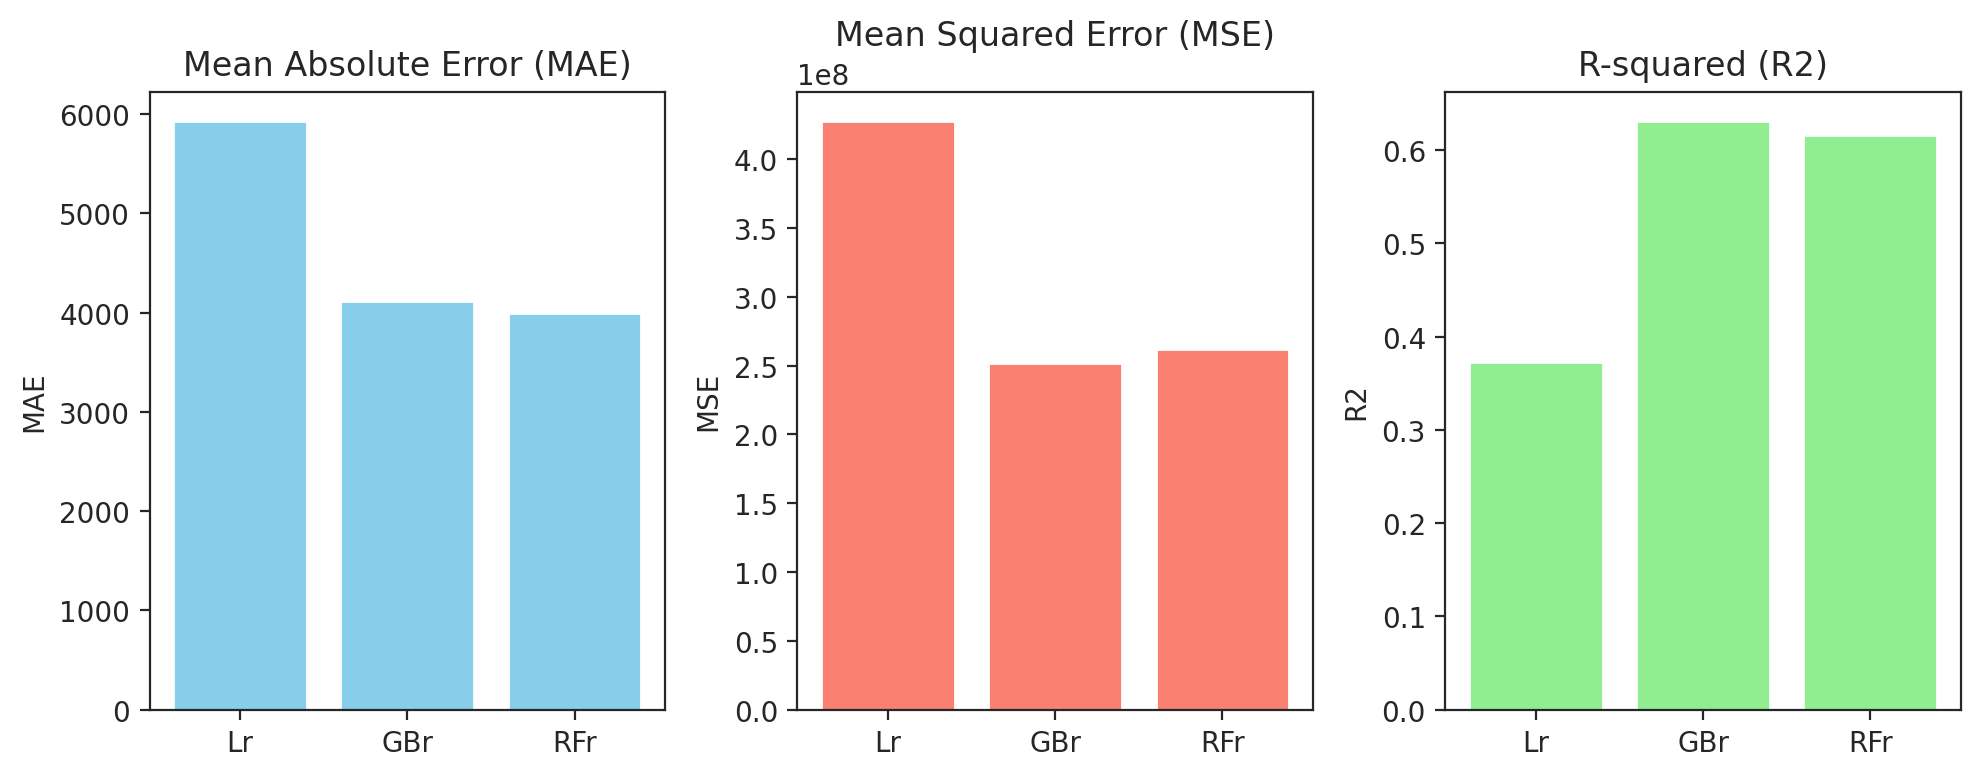

In [ ]:
models = ['Lr', 'GBr', 'RFr']
mae_values = [5927.932900, 4121.495642, 3998.856046]
mse_values = [4.276480e+08, 2.518538e+08, 2.618525e+08]
r2_values = [0.373374, 0.630963, 0.616312]

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color='salmon')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


The Gradient Boosting Regressor has the lowest MAE and MSE, indicating better performance in terms of these metrics compared to the other two models.
The Linear Regression model has the lowest R2 score, suggesting that it explains the least amount of variance in the data among the three models.
The Random Forest Regressor falls in between the other two models in terms of MAE, MSE, and R2 score.
Overall, the Gradient Boosting Regressor appears to be the best-performing model among the three based on the provided evaluation metrics.

## An Averager/Voter/Stacker Ensemble

Using an Averager
- I Combined predictions from multiple models by averaging their outputs
- During prediction, obtain predictions from each trained model for a new data point.
- Calculate the average of all the individual model predictions. This average becomes the final prediction of the ensemble.

In [ ]:
from scipy.stats import mode
mode_pred = mode([rf.predict(X_test_c), gbr.predict(X_test_c)])[0][0]
mode_pred

4956.2

In [ ]:
from numpy import mean
mean_pred = mean([rf.predict(X_test_c), gbr.predict(X_test_c)], axis=0)[0]
mean_pred

5342.878108374816

Using A Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor
gbr_model = gbr
rf_model = rf
ensemble = VotingRegressor(
    [
        ("gbr", gbr_model),
        ("rf", rf_model)
    ]
)
ensemble.fit(X_train_c, y_c_train)
ensemble

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(n_estimators=200)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
ensemble_predictions = ensemble.predict(X_test_c)
Voting_mae = mean_absolute_error(y_c_test, ensemble_predictions)
Voting_mse = mean_squared_error(y_c_test, ensemble_predictions)
Voting_r2 = r2_score(y_c_test, ensemble_predictions)
print("Test Mean Absolute Error (MAE):", Voting_mae)
print("Test Mean Squared Error (MSE):", Voting_mse)
print("Test R-squared (R2) Score:", Voting_r2)

Test Mean Absolute Error (MAE): 2116.421460946262
Test Mean Squared Error (MSE): 110353637.8131632
Test R-squared (R2) Score: 0.8709459980164982


In [ ]:
ensemble_predictions1 = ensemble.predict(X_train_c)
Voting_mae1 = mean_absolute_error(y_c_train,ensemble_predictions1)
Voting_mse1 = mean_squared_error(y_c_train, ensemble_predictions1)
Voting_r21 = r2_score(y_c_train,ensemble_predictions1)
print("Train Mean Absolute Error (MAE):", Voting_mae1)
print("Train Mean Squared Error (MSE):", Voting_mse1)
print("Train R-squared (R2) Score:", Voting_r21)

Train Mean Absolute Error (MAE): 1598.1851741813784
Train Mean Squared Error (MSE): 16473896.806491105
Train R-squared (R2) Score: 0.9609763611873285


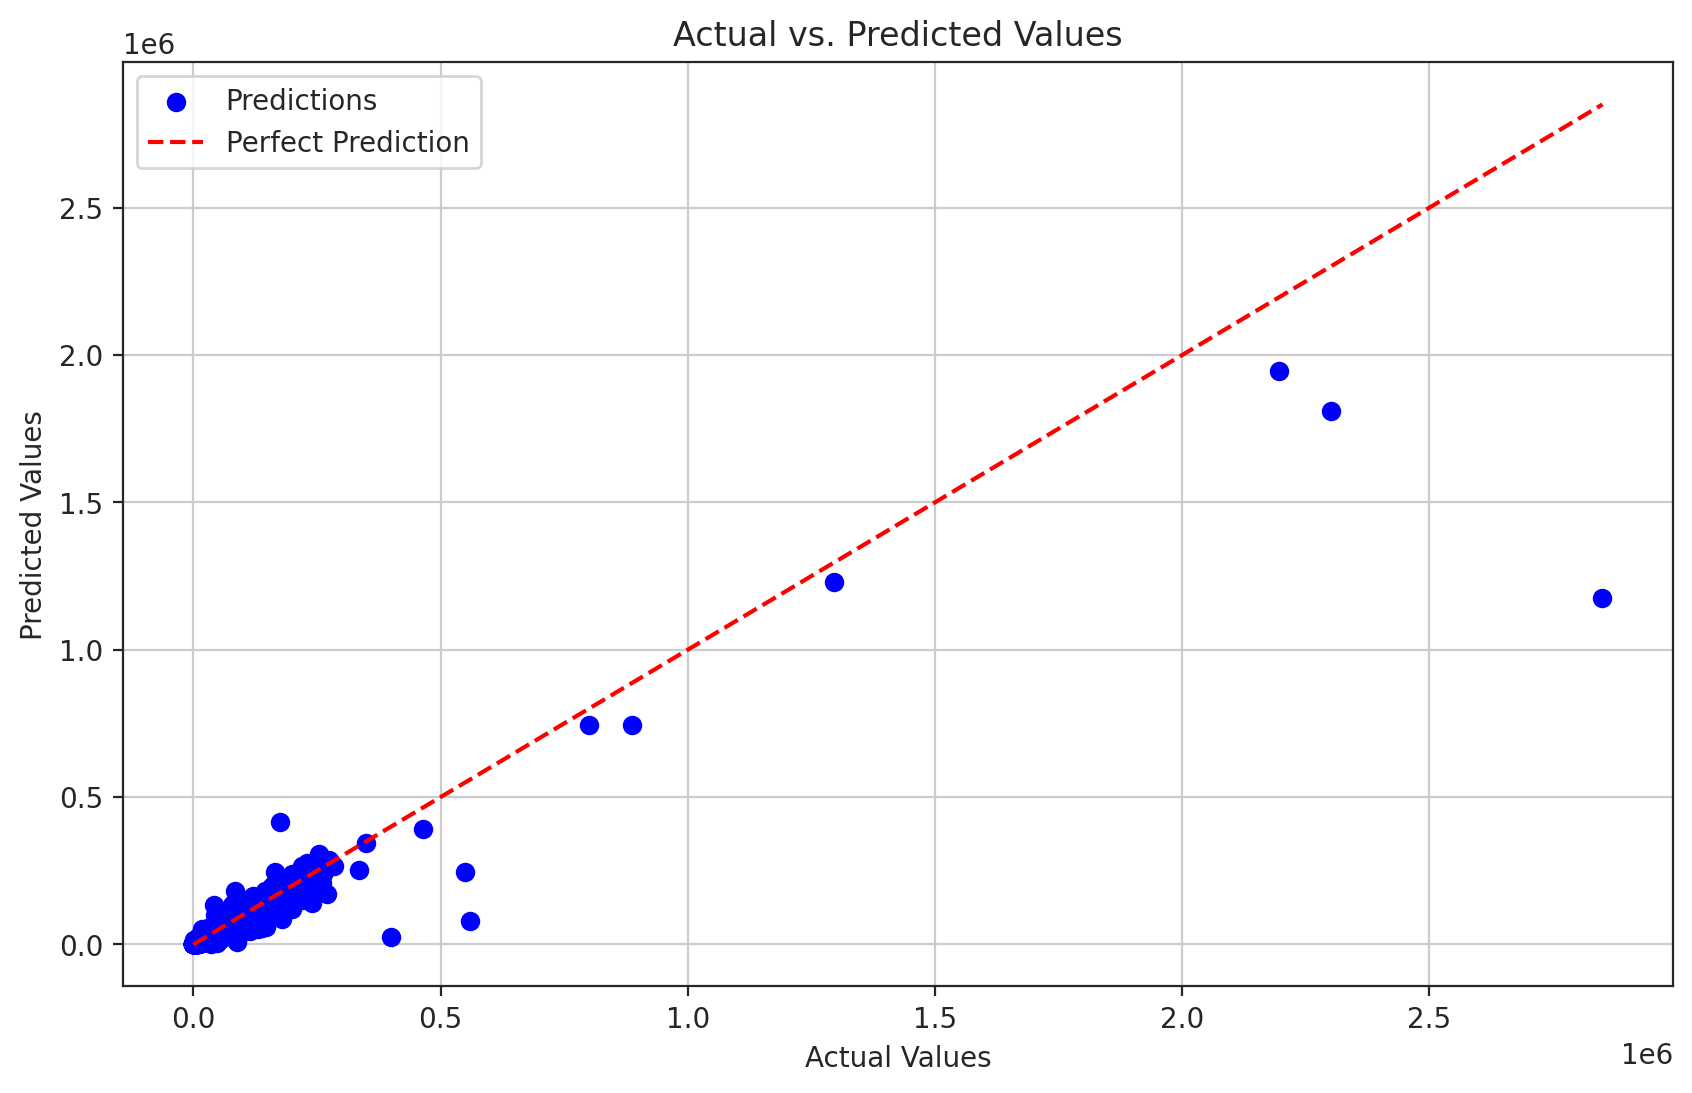

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_c_test, ensemble_predictions, color='blue', label='Predictions')
plt.plot([min(y_c_test), max(y_c_test)], [min(y_c_test), max(y_c_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions_df = pd.DataFrame({'Actual': y_c_test, 'Predicted': ensemble_predictions})
print(predictions_df)


        Actual     Predicted
149472    5850   5342.878108
269       1980   1216.632890
83291     2995   2940.947572
13803     8140   9035.785627
132660   10000  10905.506063
...        ...           ...
321024   18995  14551.641953
81878    77895  76872.607451
372842   11488  11201.832294
127401   11500  11108.928414
111478    2495   2877.423332

[39083 rows x 2 columns]


Stack Ensemble

In [ ]:
from sklearn.ensemble import StackingRegressor
base_models = [('model1', rf), ('model2', gbr)]
meta_model = GradientBoostingRegressor()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train_c, y_c_train)
predictionstack = stacking_model.predict(X_test_c)

In [ ]:
stack_mae = mean_absolute_error(y_c_test,predictionstack)
stack_mse = mean_squared_error(y_c_test, predictionstack)
stack_r2 = r2_score(y_c_test,predictionstack)
print("Test Mean Absolute Error (MAE):", stack_mae)
print("Test Mean Squared Error (MSE):", stack_mse)
print("Test R-squared (R2) Score:", stack_r2)

Test Mean Absolute Error (MAE): 1879.946099300611
Test Mean Squared Error (MSE): 106293490.51351623
Test R-squared (R2) Score: 0.8756941718696256


In [ ]:
predictionstack1 = stacking_model.predict(X_train_c)
stack_mae1 = mean_absolute_error(y_c_train,predictionstack1)
stack_mse1 = mean_squared_error(y_c_train, predictionstack1)
stack_r21 = r2_score(y_c_train,predictionstack1)
print("Train Mean Absolute Error (MAE):", stack_mae1)
print("Train Mean Squared Error (MSE):", stack_mse1)
print("Train R-squared (R2) Score:", stack_r21)

Train Mean Absolute Error (MAE): 850.4945609110761
Train Mean Squared Error (MSE): 15531584.457769822
Train R-squared (R2) Score: 0.9632085262407559


## Overall Performance with Cross-Validation

RESULTS

In [ ]:
#For Test
grid_results = pd.DataFrame({
    'Model': ['Lr', 'GBr', 'RFr', 'Stacking_Model', 'Voting R'],
    'TEST MAE': [lr1d_mae, gbr_mae, rf_mae, stack_mae, Voting_mae],
    'TEST MSE': [lr1d_mse, gbr_mse, rf_mse, stack_mse, Voting_mse],
    'TEST R2': [lr1d_r2, gbr_r2, rf_r2, stack_r2, Voting_r2],
})
grid_results

Model     TEST MAE      TEST MSE   TEST R2
0              Lr  4679.621445  4.886689e+08  0.428522
1             GBr  2755.979871  1.064866e+08  0.875468
2             RFr  1880.727884  1.265042e+08  0.852059
3  Stacking_Model  1879.946099  1.062935e+08  0.875694
4        Voting R  2117.317330  1.109474e+08  0.870252

In [ ]:
#For Train
grid_results1 = pd.DataFrame({
    'Model': ['Lr', 'GBr', 'RFr', 'Stacking_Model', 'Voting R'],
    'TRAIN MAE': [lr1d_mae1, gbr_mae1, rf_mae0, stack_mae1, Voting_mae1],
    'TRAIN MSE': [lr1d_mse1, gbr_mse1, rf_mse0, stack_mse1, Voting_mse1],
    'TRAIN R2': [lr1d_r21, gbr_r21, rf_r20, stack_r21, Voting_r21],
})
grid_results1

Model    TRAIN MAE     TRAIN MSE  TRAIN R2
0              Lr  4530.641177  1.401115e+08  0.668101
1             GBr  2697.954592  3.939217e+07  0.906687
2             RFr   695.326776  6.404902e+06  0.984828
3  Stacking_Model   850.494561  1.553158e+07  0.963209
4        Voting R  1598.185174  1.647390e+07  0.960976

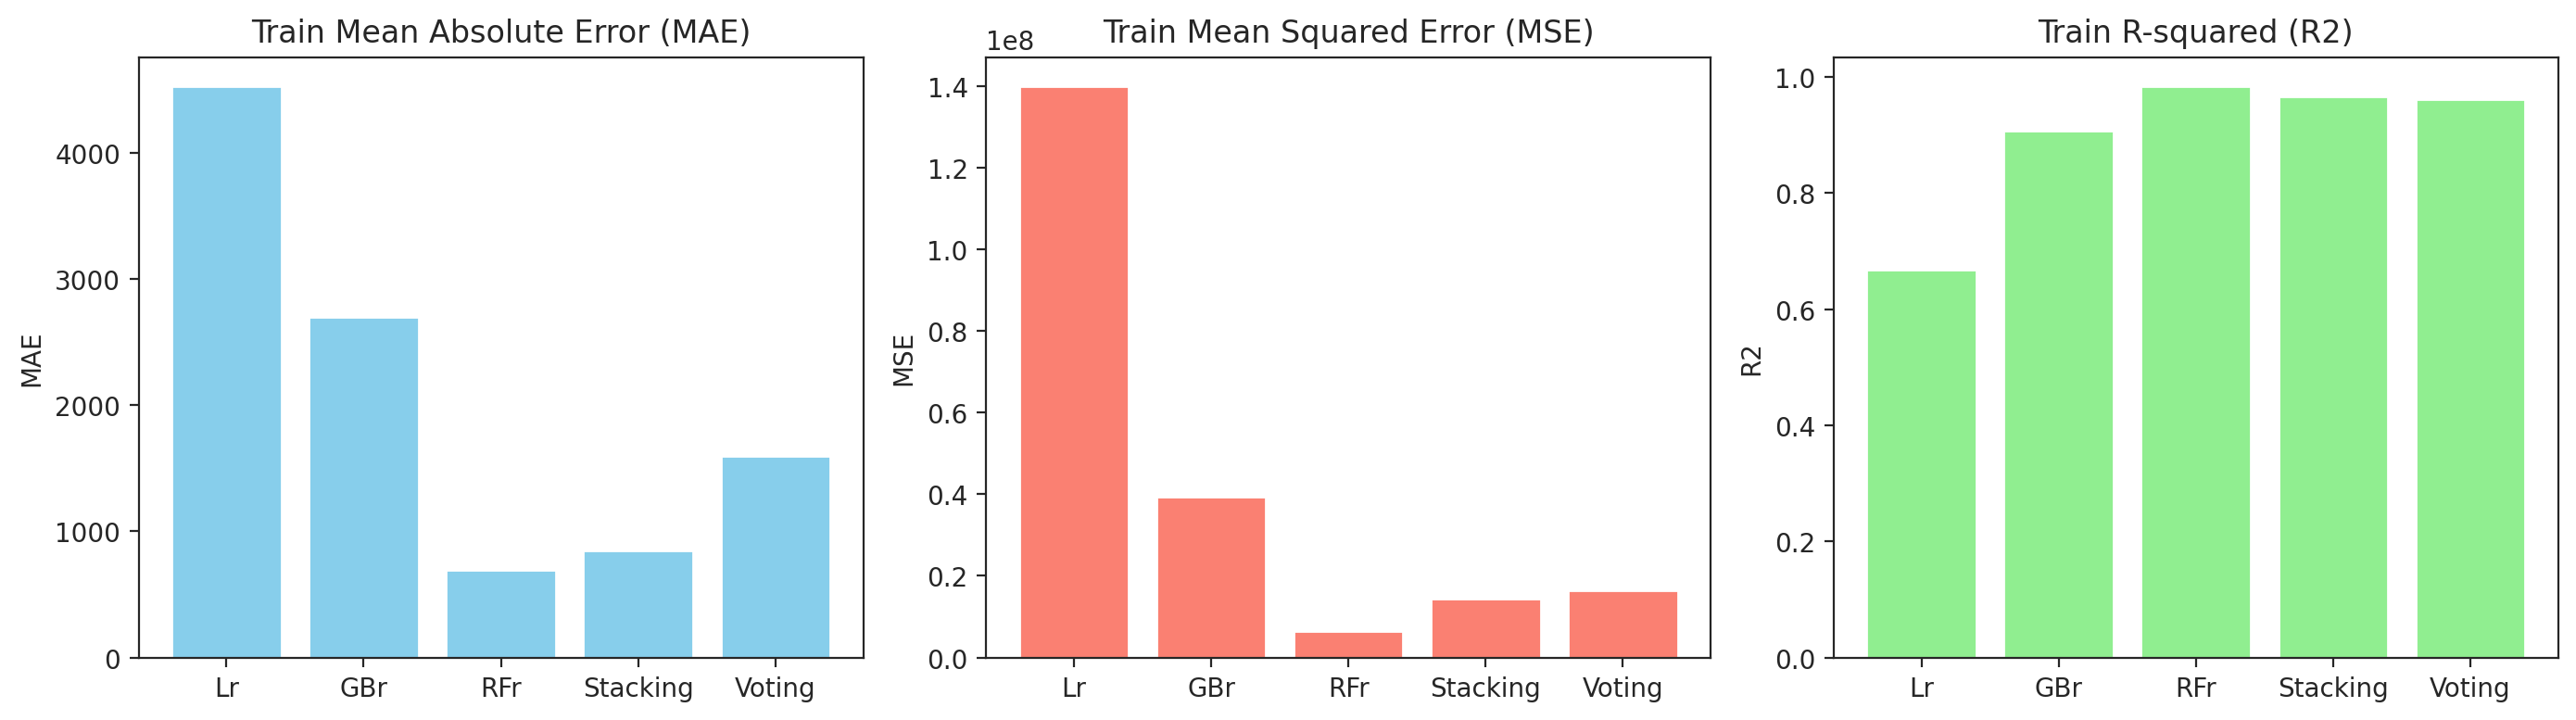

In [ ]:
models = ['Lr', 'GBr', 'RFr', 'Stacking', 'Voting']
mae_values = [4530.641177, 2697.954592, 695.326776, 849.838880, 1598.185174]
mse_values = [1.401115e+08, 3.939217e+07, 6.404902e+06, 1.440121e+07, 1.647390e+07]
r2_values = [0.668101, 0.906687, 0.984828, 0.965886, 0.960976]

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='skyblue')
plt.title('Train Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color='salmon')
plt.title('Train Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('Train R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

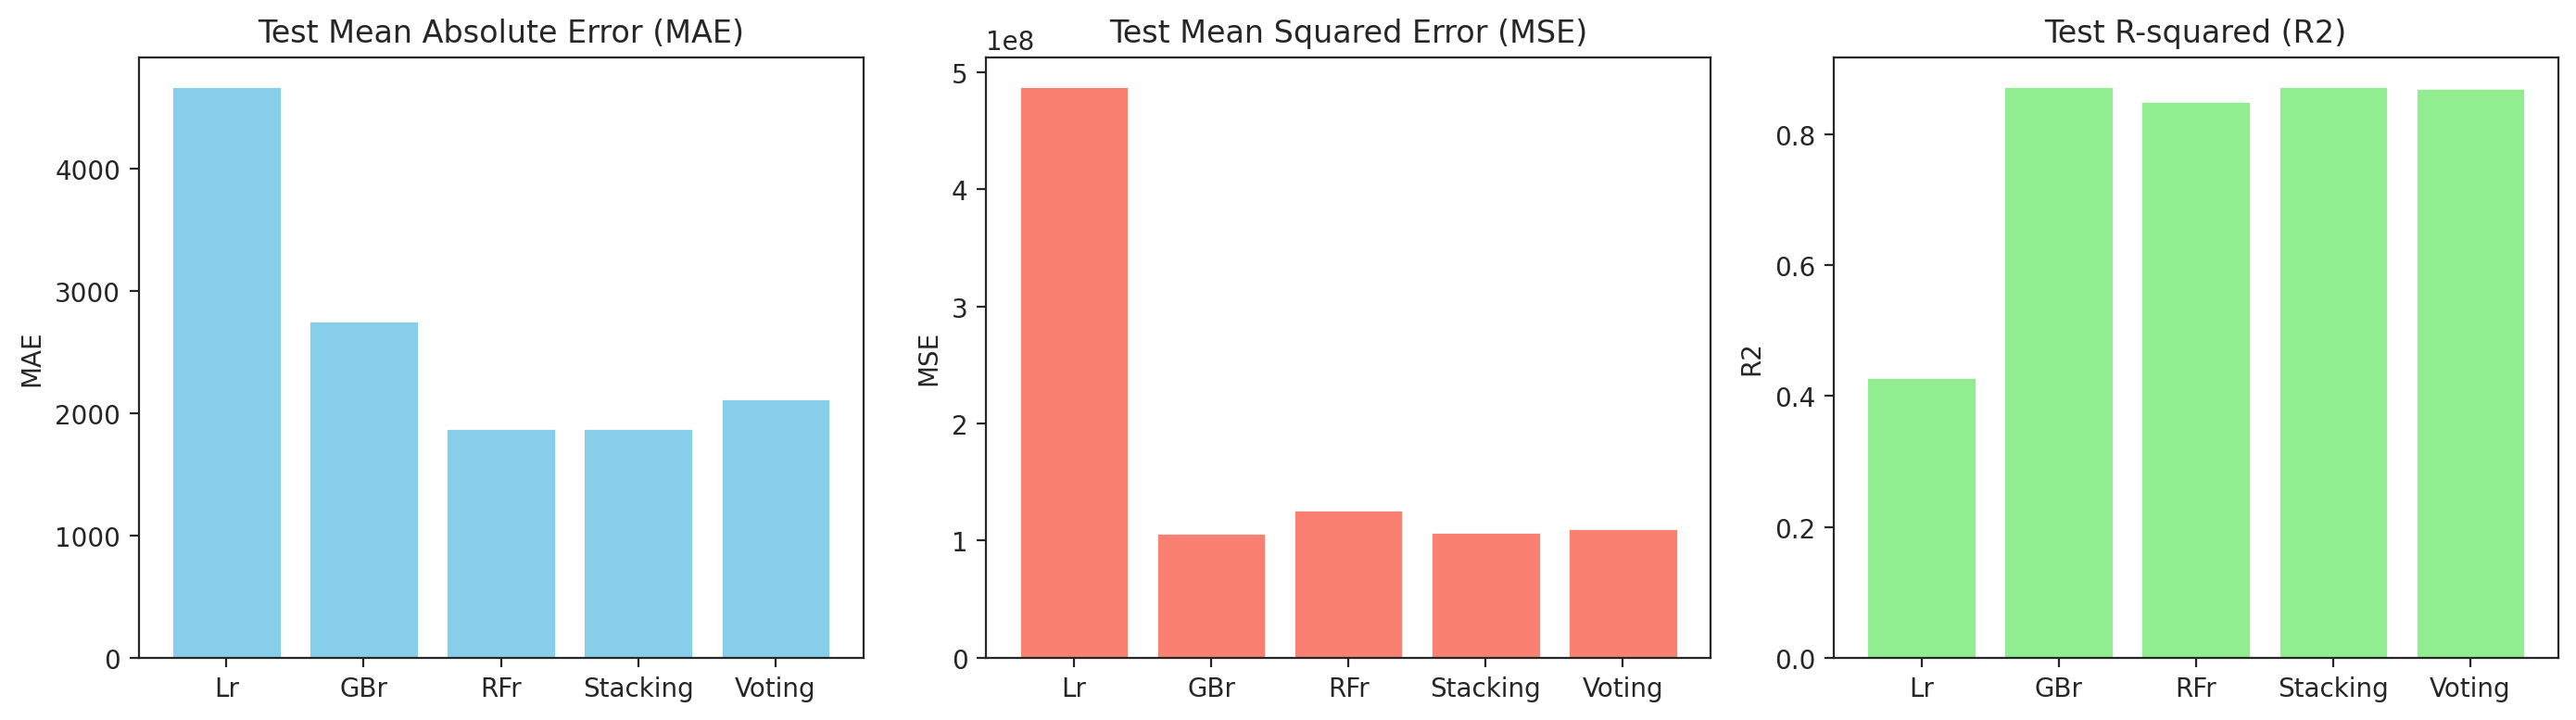

In [ ]:
models = ['Lr', 'GBr', 'RFr', 'Stacking', 'Voting']
mae_values = [4679.621445, 2756.645093, 1880.727884, 1874.395229, 2116.432889	]
mse_values = [4.886689e+08, 1.068432e+08, 1.265042e+08, 1.073197e+08, 1.103720e+08]
r2_values = [0.428522, 0.875051, 0.852059, 0.874494, 0.870925]

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color='skyblue')
plt.title('Test Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color='salmon')
plt.title('Test Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('Test R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


predicted_values = {}
for name, model in models.items():
    predicted_values[name] = cross_val_predict(model, X_train_c, y_c_train, cv=10)

In [ ]:
evaluation_metrics = {}
for name, predictions in predicted_values.items():
    mse = mean_squared_error(y_c_train, predictions)
    r2 = r2_score(y_c_train, predictions)
    mae = mean_absolute_error(y_c_train, predictions)
    evaluation_metrics[name] = {'MSE': mse, 'R2 Score': r2, 'MAE': mae}
    print(f"Evaluation metrics for {name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R2 Score: {r2}")
    print(f"  Mean Absolute Error: {mae}")

Evaluation metrics for Random Forest:
  Mean Squared Error: 40659864.929453604
  R2 Score: 0.9036842404795318
  Mean Absolute Error: 1815.1235780057684
Evaluation metrics for Gradient Boosting:
  Mean Squared Error: 59254083.335342415
  R2 Score: 0.8596379488462478
  Mean Absolute Error: 2939.1493615946147


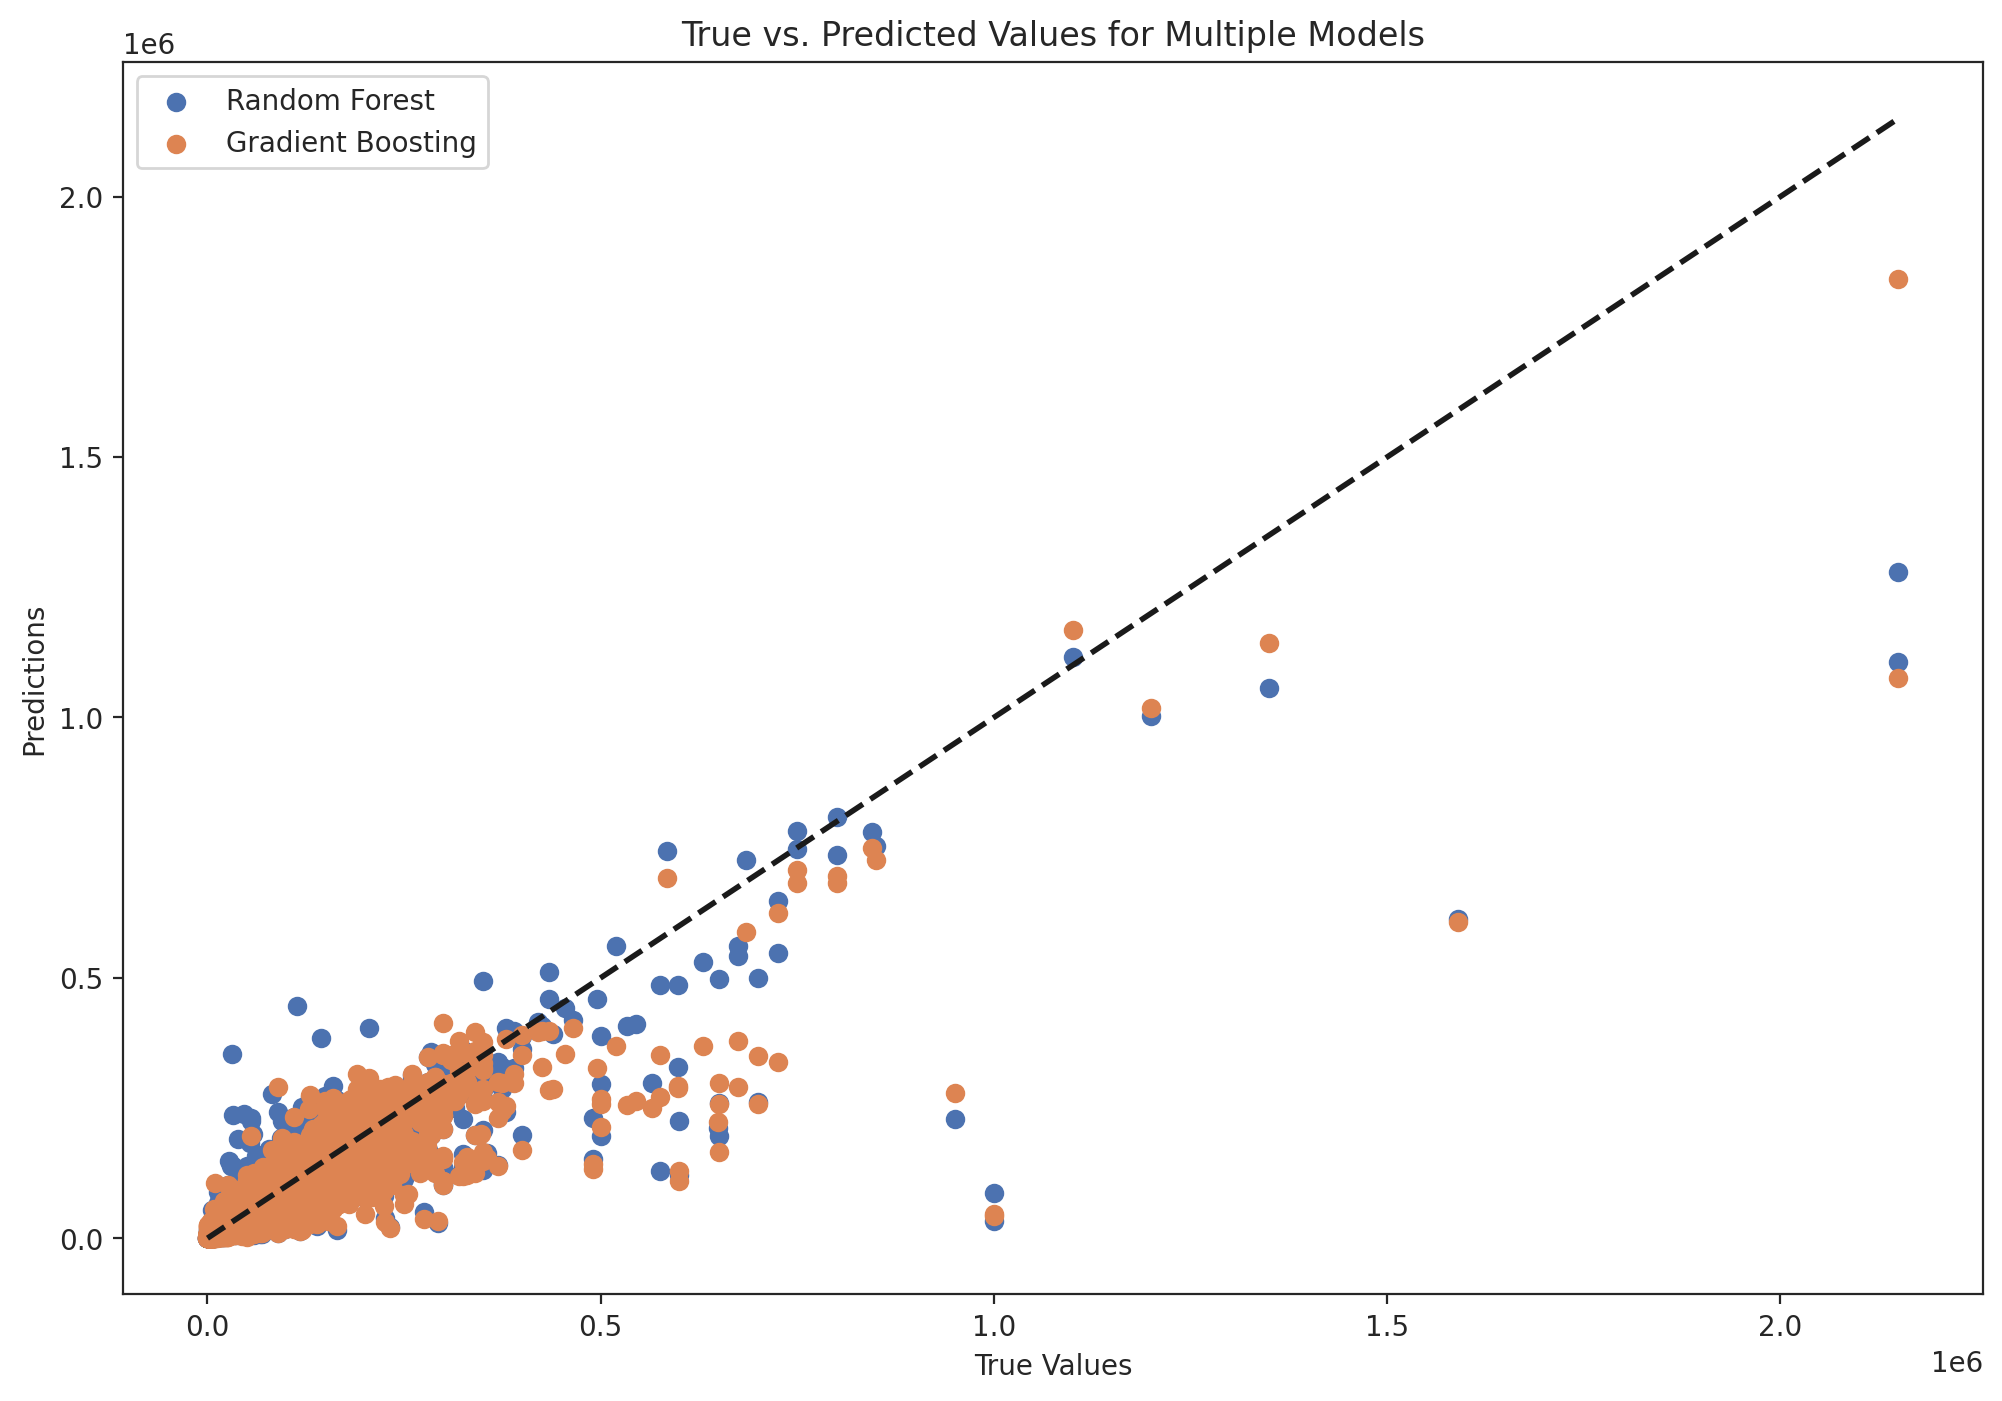

In [ ]:
plt.figure(figsize=(12, 8))
for name, predictions in predicted_values.items():
    plt.scatter(y_c_train, predictions, label=name)
plt.plot([y_c_train.min(), y_c_train.max()], [y_c_train.min(), y_c_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values for Multiple Models')
plt.legend()
plt.show()

## TRUE VS PREDICTED

In [ ]:
PredictionErrorDisplay.from_estimator(
    lr1d, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

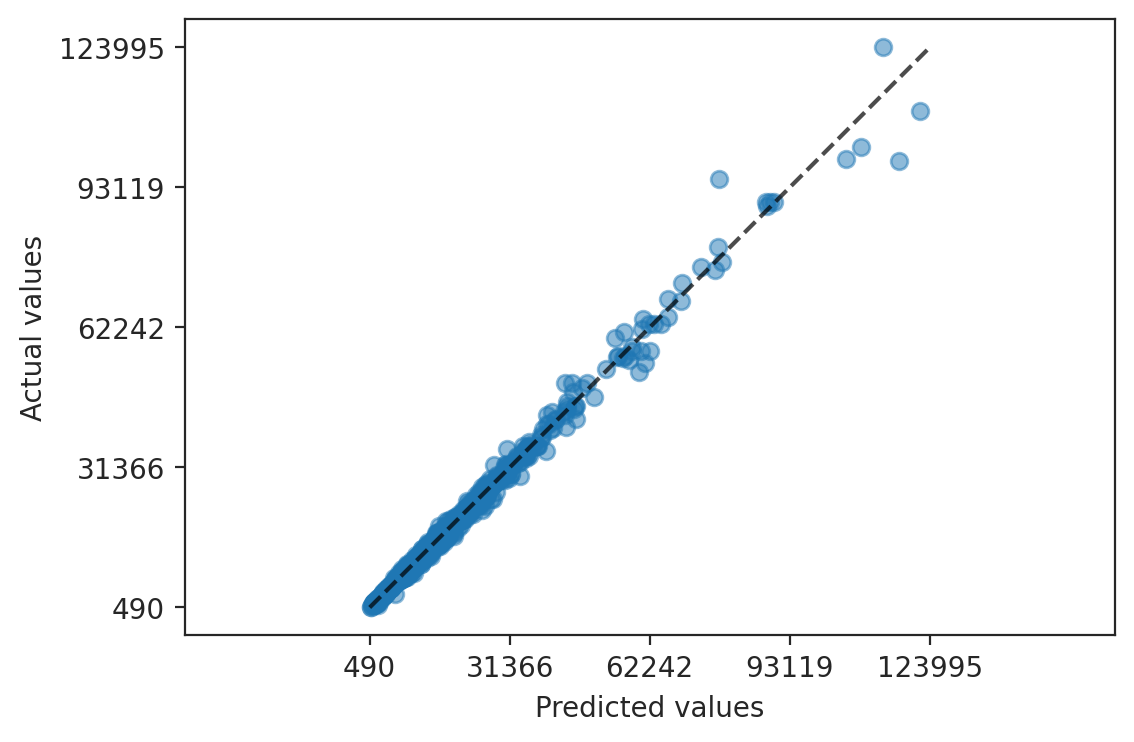

In [ ]:
PredictionErrorDisplay.from_estimator(
    rf, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

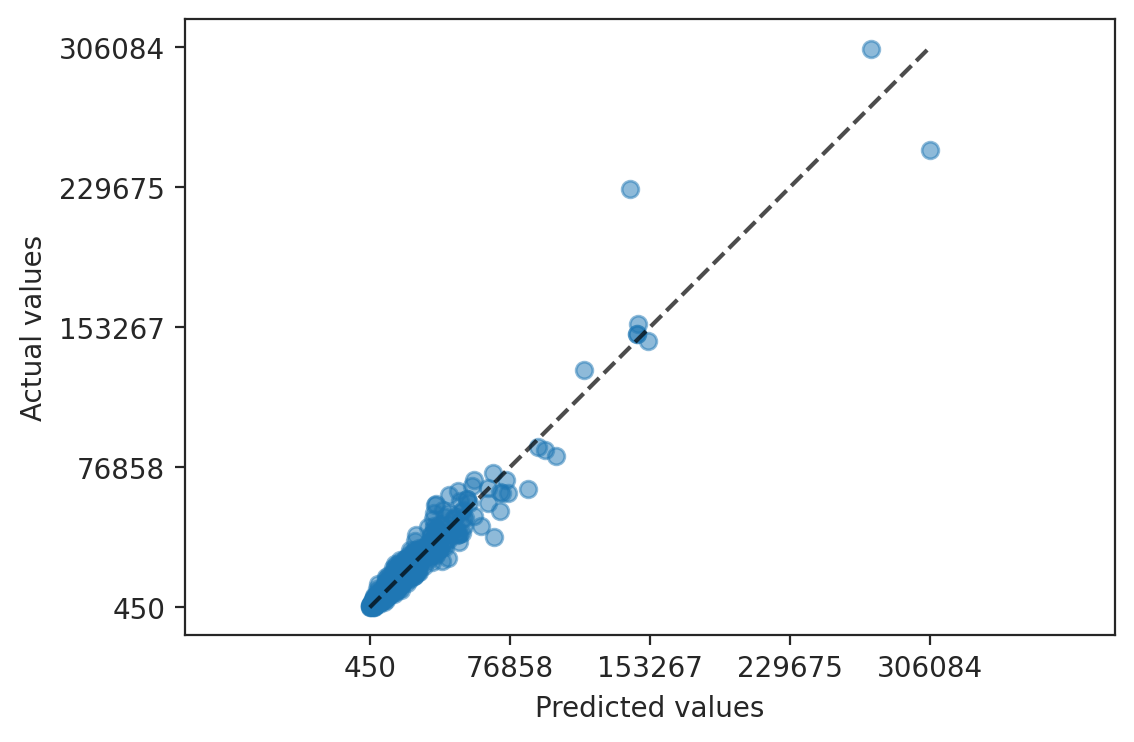

In [ ]:
PredictionErrorDisplay.from_estimator(
  gbr, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

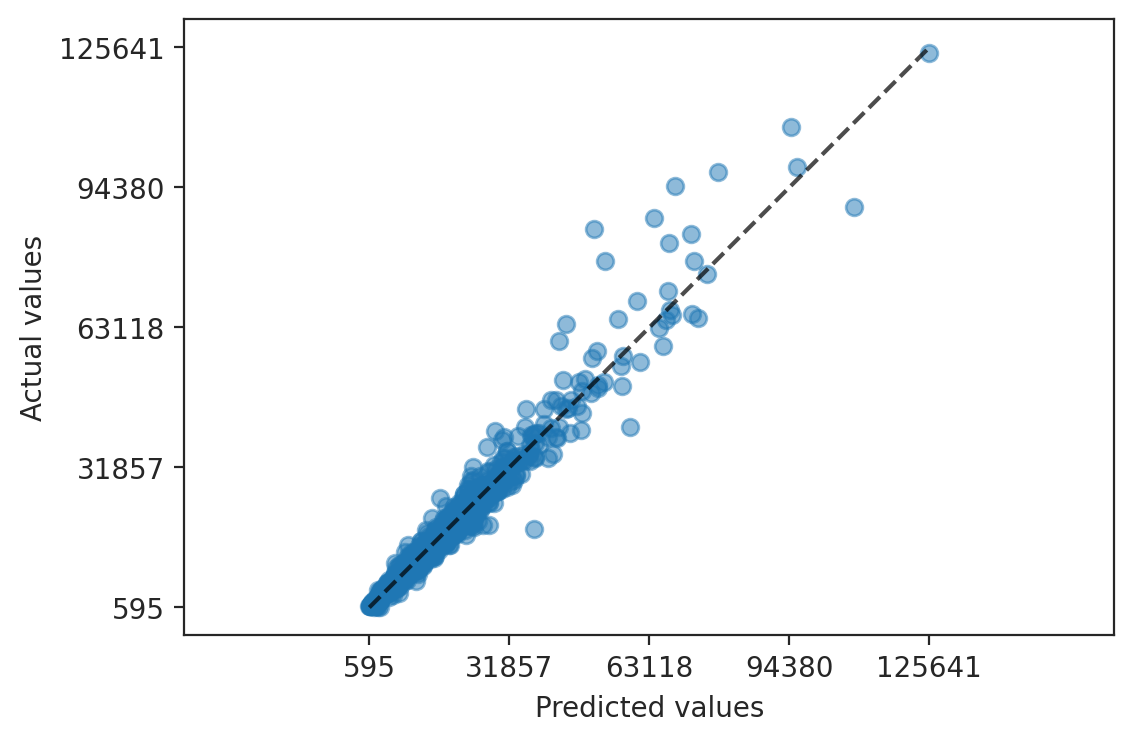

In [ ]:
PredictionErrorDisplay.from_estimator(
  ensemble, X_train_c, y_c_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

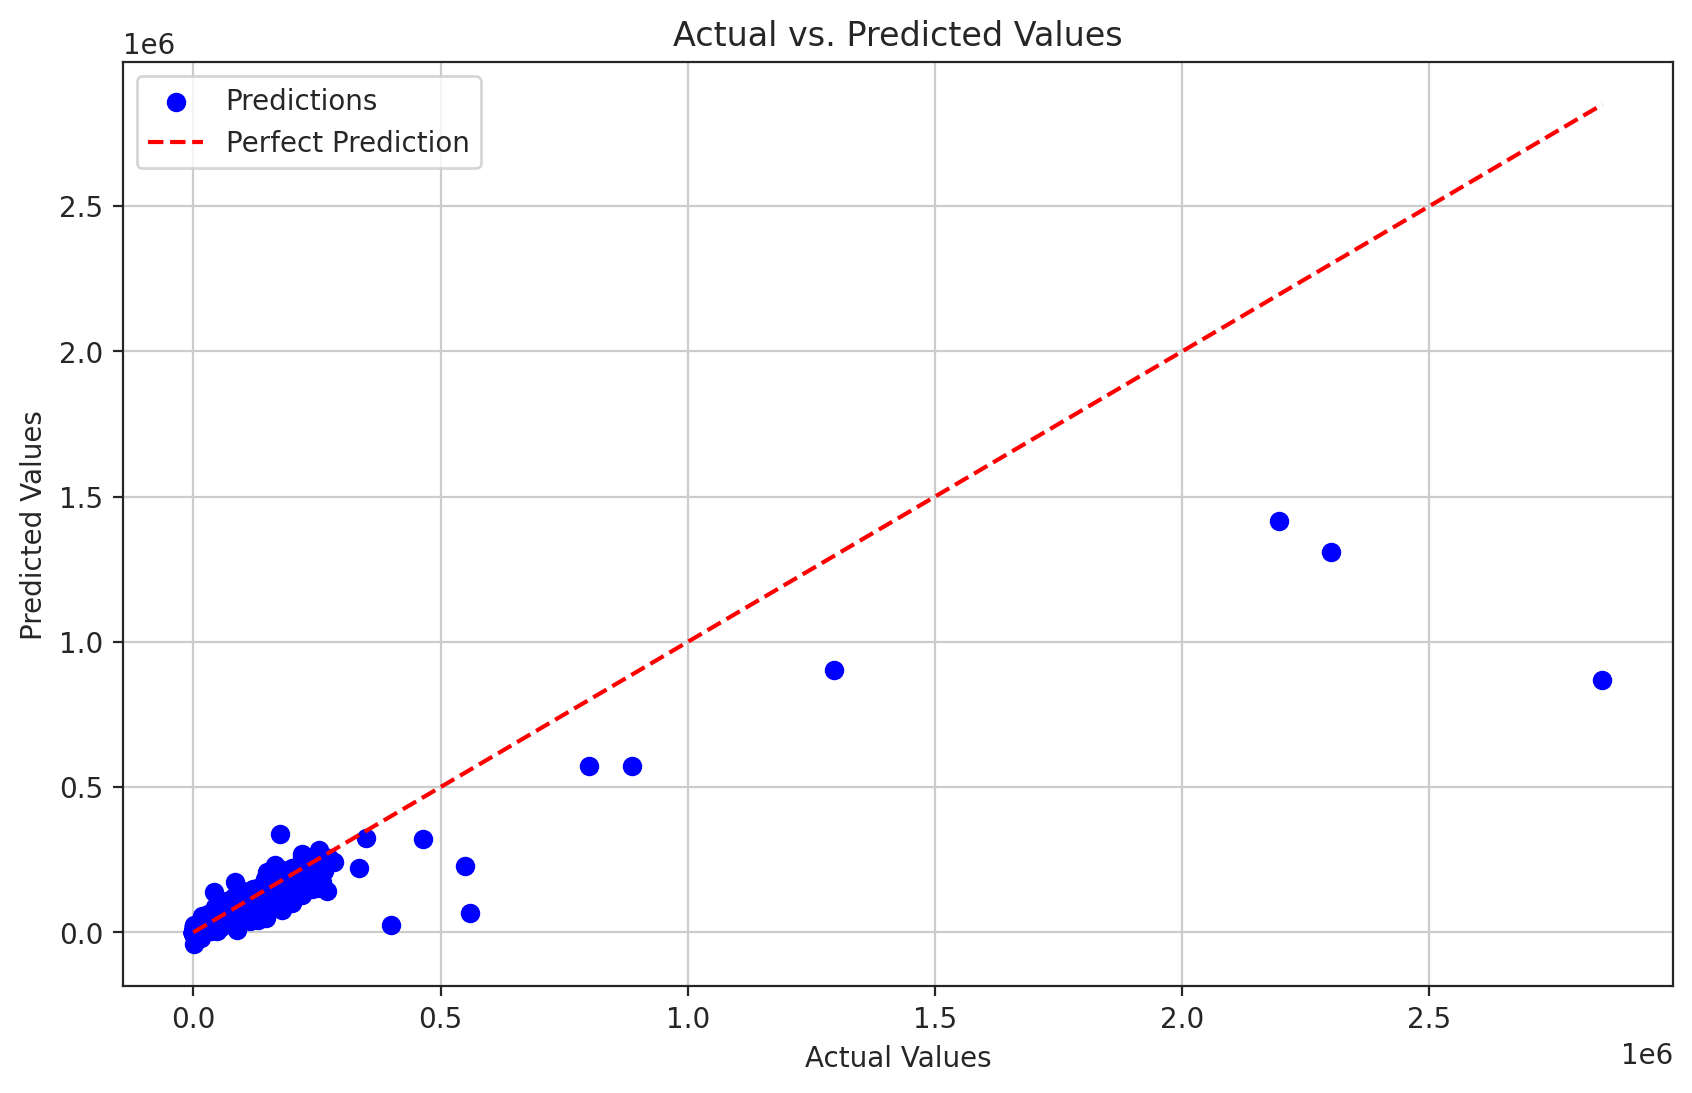

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_c_test, ensemble_predictions, color='blue', label='Predictions')
plt.plot([min(y_c_test), max(y_c_test)], [min(y_c_test), max(y_c_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions_df = pd.DataFrame({'Actual': y_c_test, 'Predicted': ensemble_predictions})
print(predictions_df)


        Actual     Predicted
149472    5850   5616.112155
269       1980   -864.427738
83291     2995   1959.365699
13803     8140   9477.978845
132660   10000  11576.711841
...        ...           ...
321024   18995  15500.968232
81878    77895  76000.606125
372842   11488  10831.489659
127401   11500  11301.620141
111478    2495   2773.053170

[39083 rows x 2 columns]


## Global and Local Explanations with SHAP

In [ ]:
import shap
explainer = shap.TreeExplainer(gbr)

shap_values = explainer.shap_values(X_test_c)

In [ ]:
shap_values

array([[   -3.96450173, -1714.7194081 ,  -117.53966535, ...,
         -567.25927543,    -8.77556156,  -102.64210096],
       [   -4.20480342, -2411.45339997,  -112.35201784, ...,
          157.84805689,    -9.80038602,  -126.13692627],
       [   -3.92354411, -2581.36825503,  -112.08301791, ...,
         -434.06278186,    -8.85837098,  -107.38630306],
       ...,
       [   -4.48927835,  -432.87396764,   118.4762    , ...,
           19.95338987,    -7.4510907 ,  -116.49027721],
       [   -4.19301665,  -740.58182202,  -117.70321692, ...,
           99.6625464 ,    -8.63894524,   -87.26632546],
       [   -4.23925126, -1545.18307194,  -111.91946634, ...,
           25.86241159,    -9.80038602,  -115.61900371]])

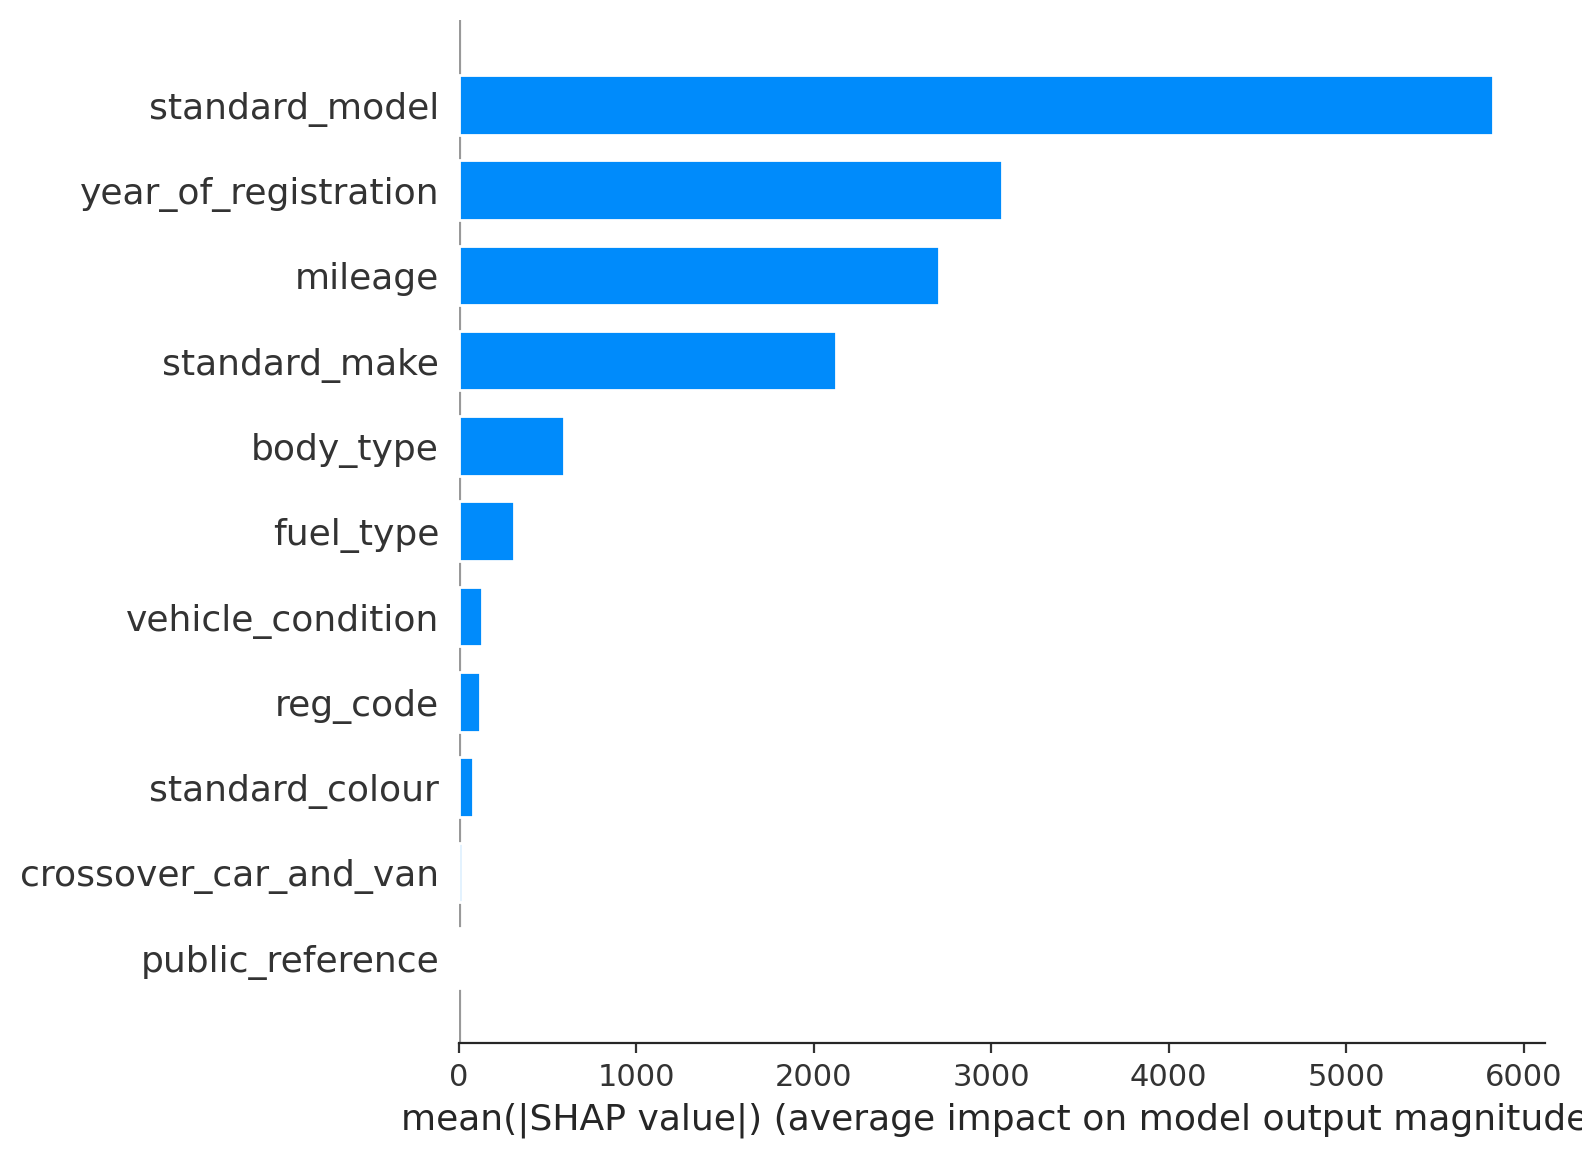

In [ ]:
shap.summary_plot(shap_values, X_test_c, plot_type="bar")

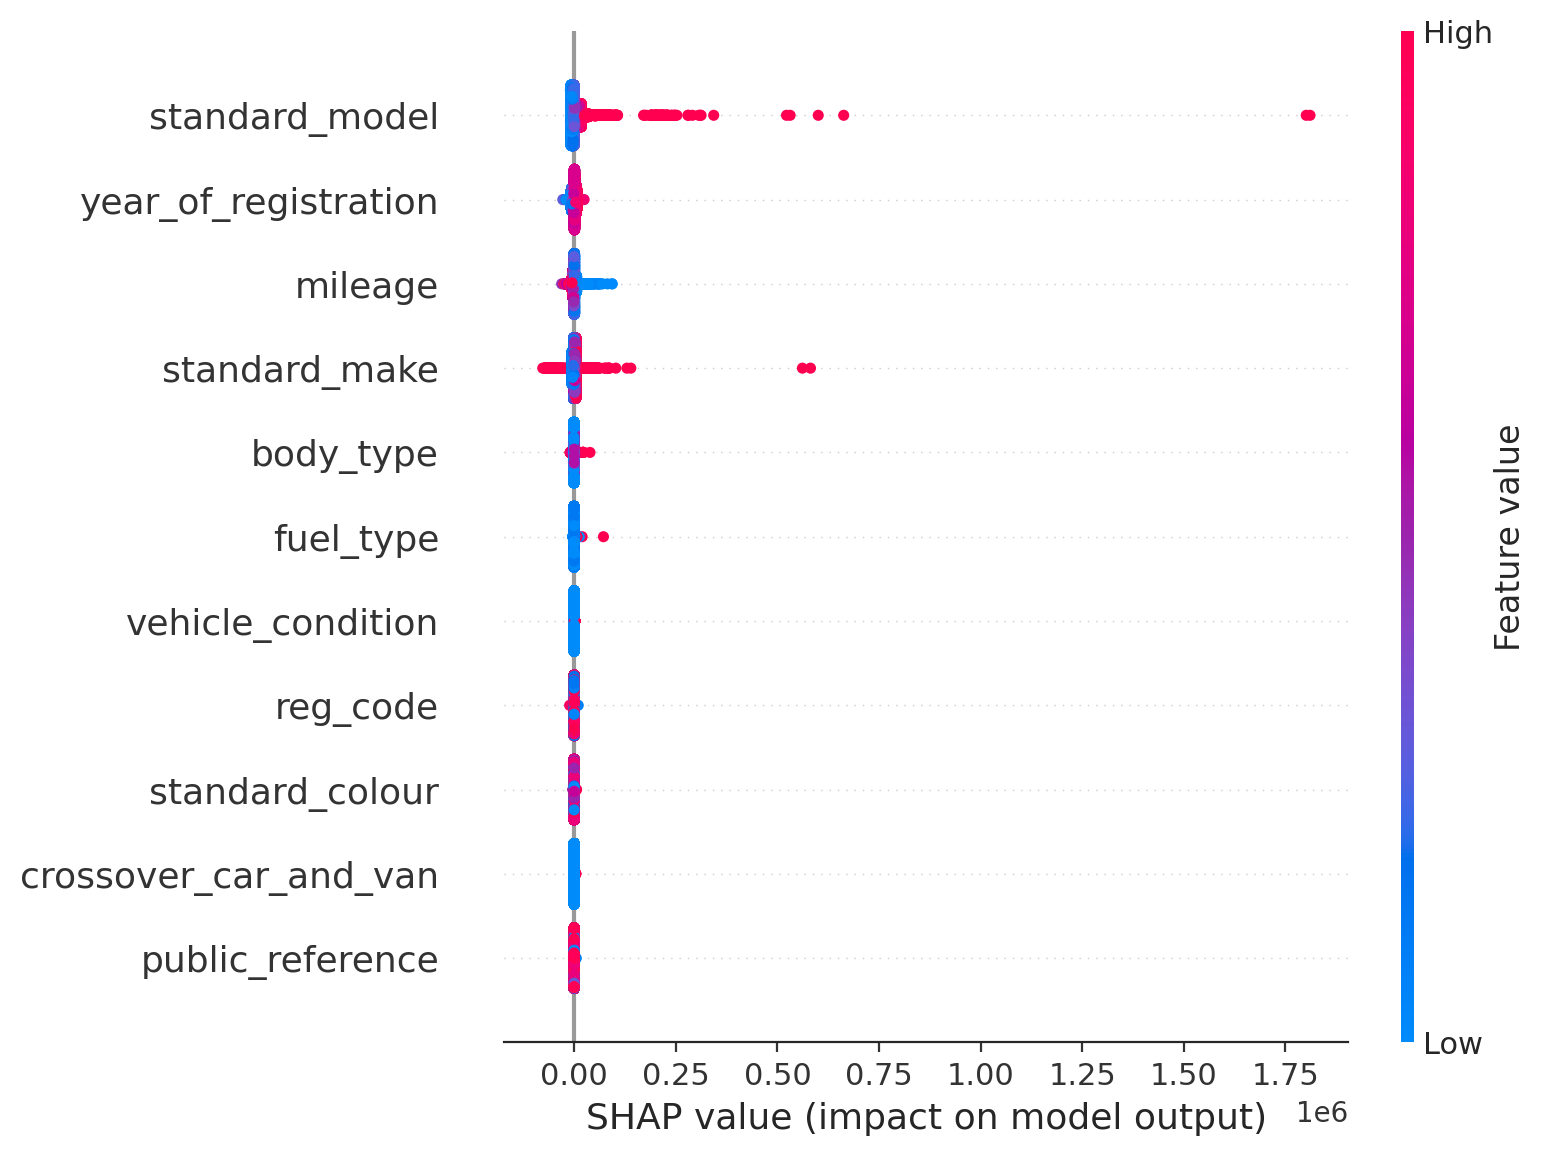

In [ ]:
shap.summary_plot(shap_values, X_test_c)

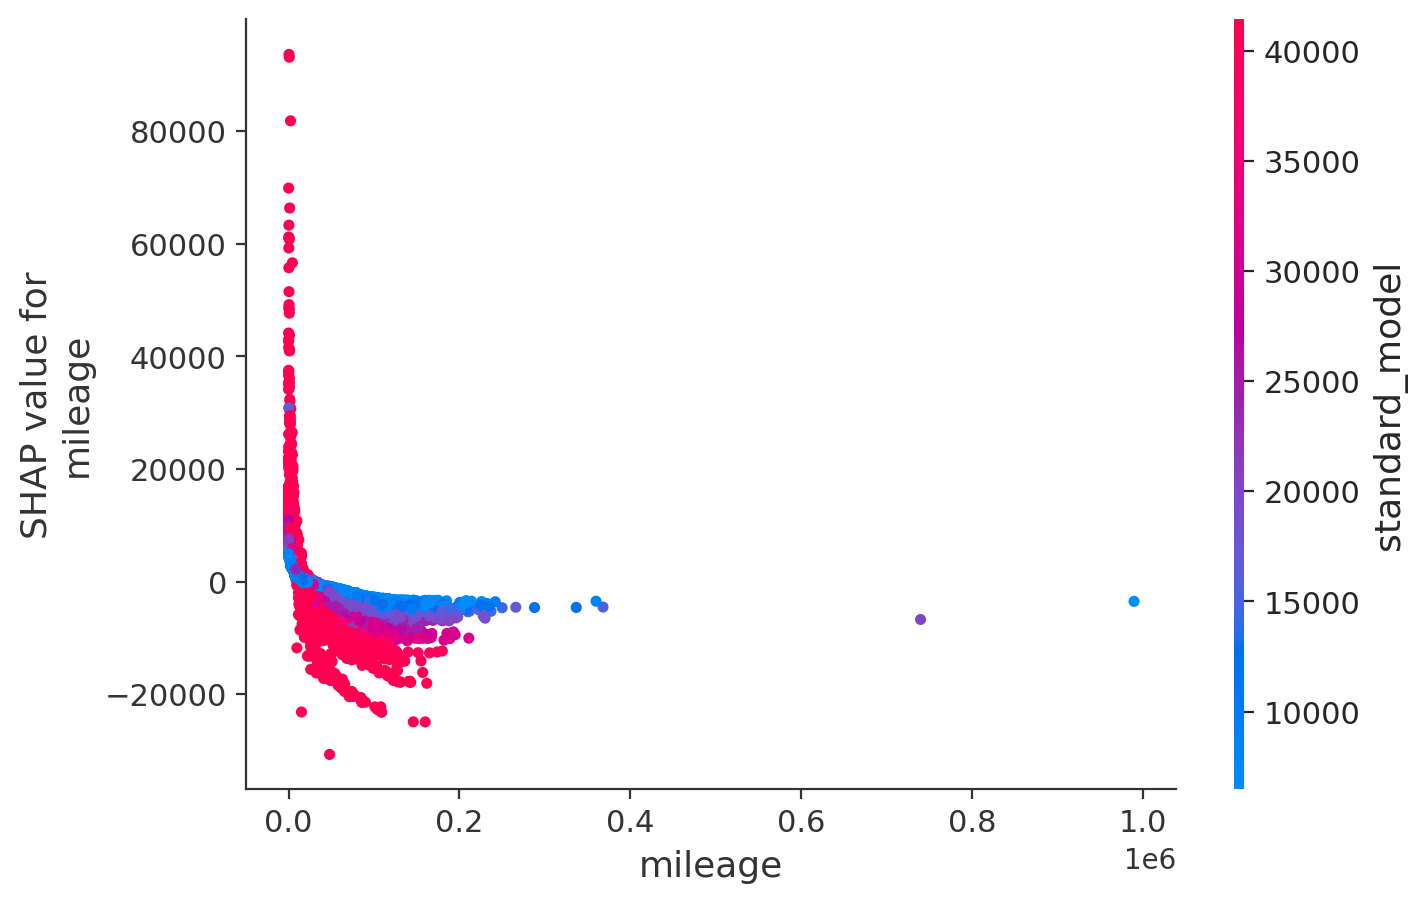

In [ ]:
shap.dependence_plot("mileage", shap_values, X_test_c)

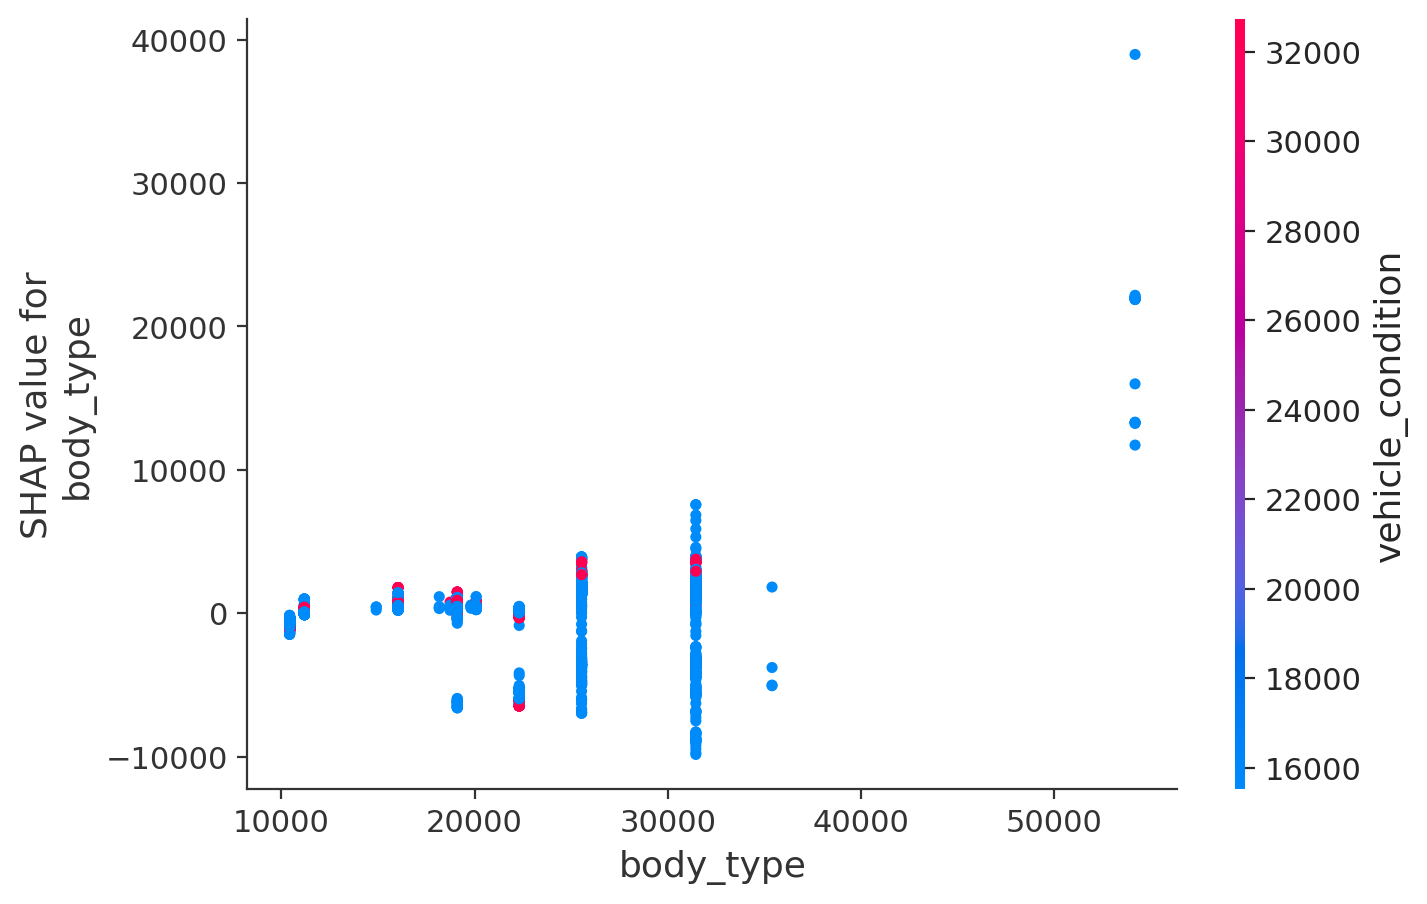

In [ ]:
shap.dependence_plot("body_type", shap_values, X_test_c)

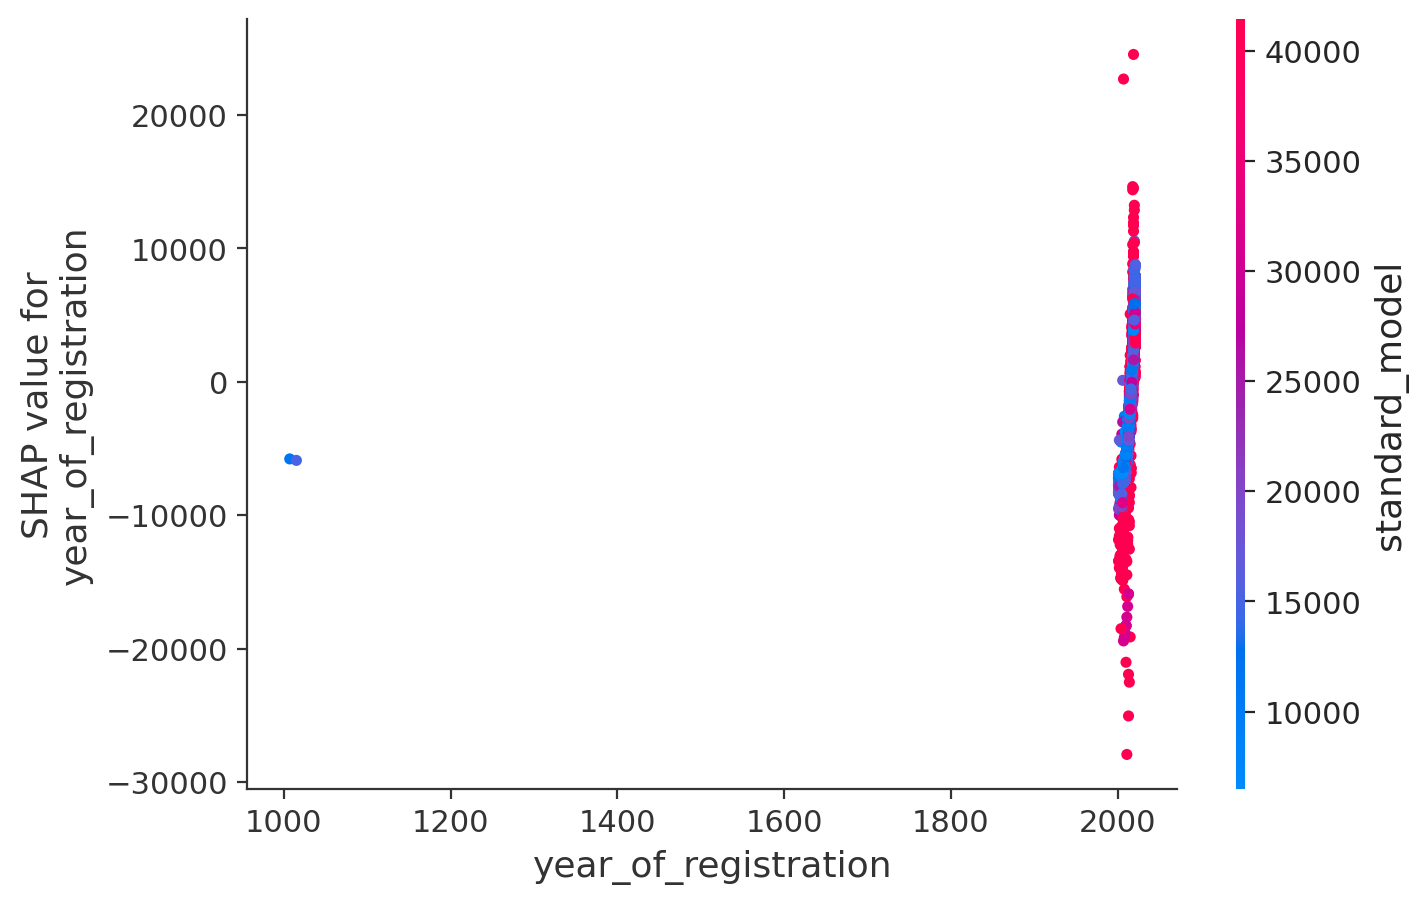

In [ ]:
shap.dependence_plot("year_of_registration", shap_values, X_test_c)

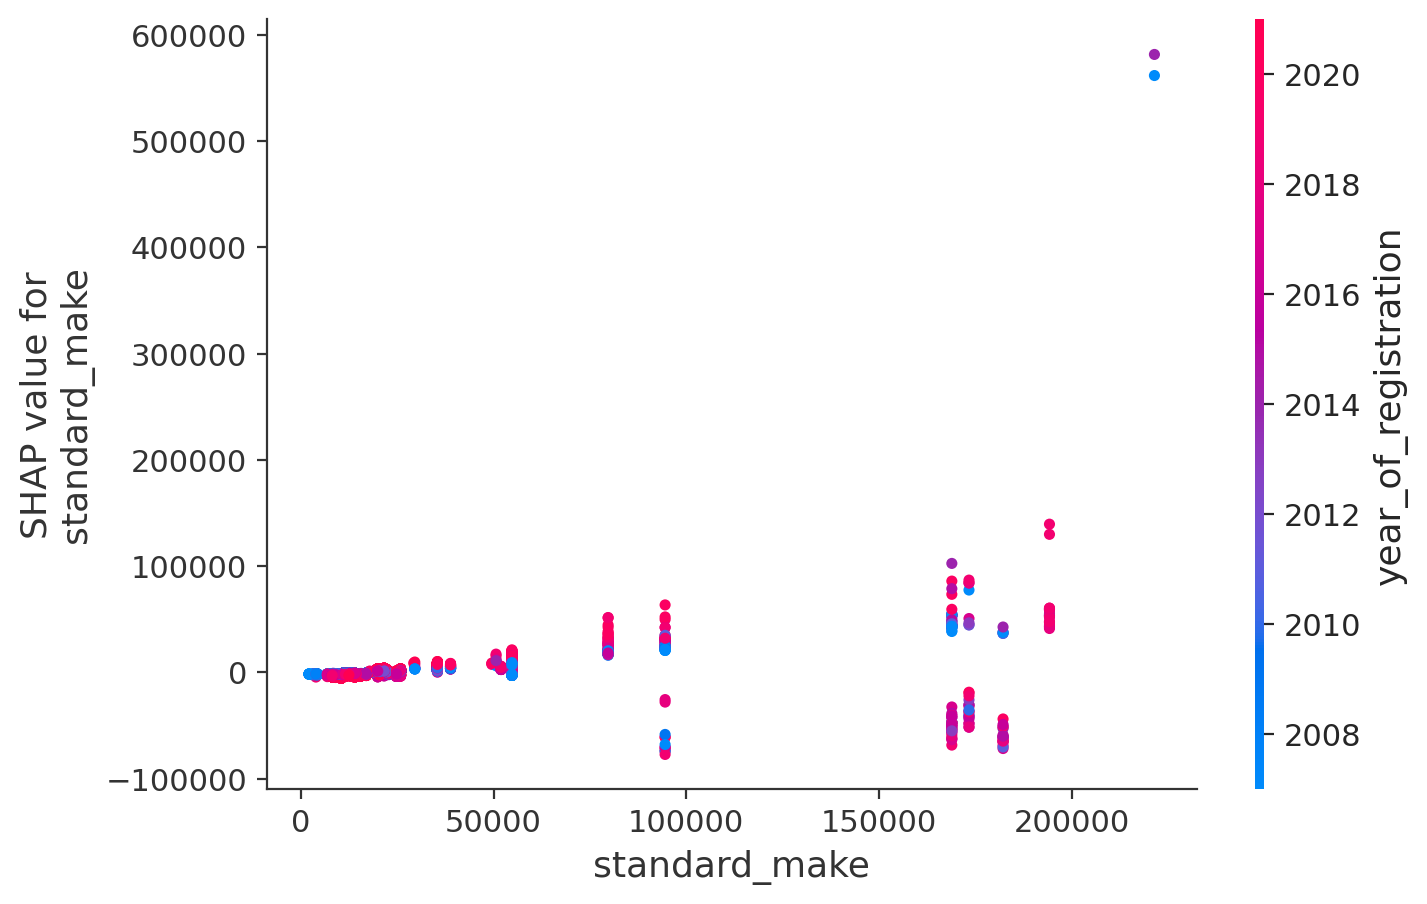

In [ ]:
shap.dependence_plot("standard_make", shap_values, X_test_c)

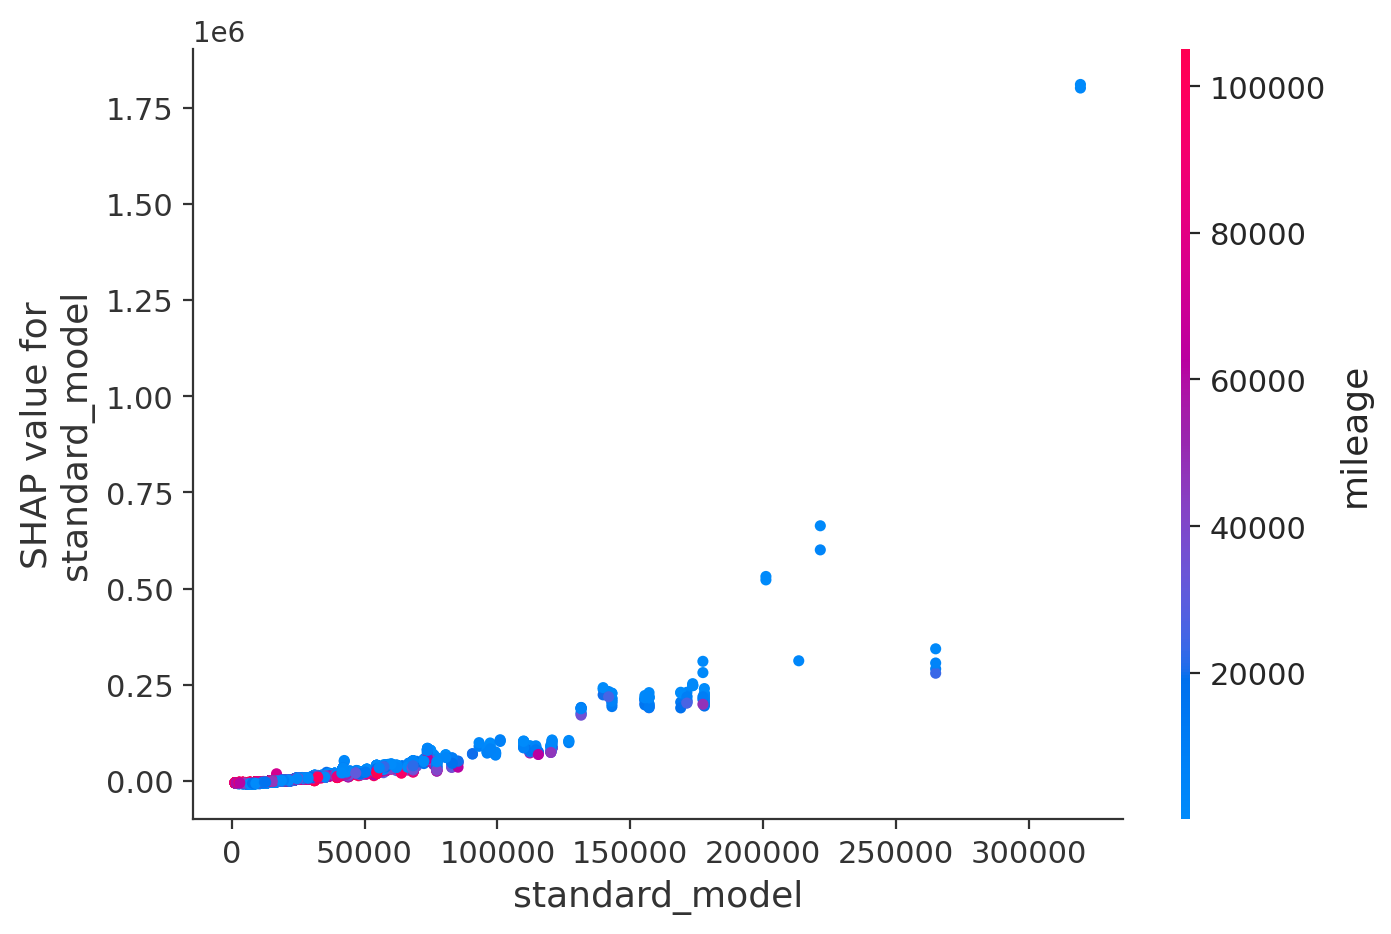

In [ ]:
shap.dependence_plot("standard_model", shap_values, X_test_c)

In [ ]:
import numpy as np

# Assuming X_test_c is your dataset
num_instances = X_test_c.shape[0]
print("Number of instances in the dataset:", num_instances)

Number of instances in the dataset: 39083


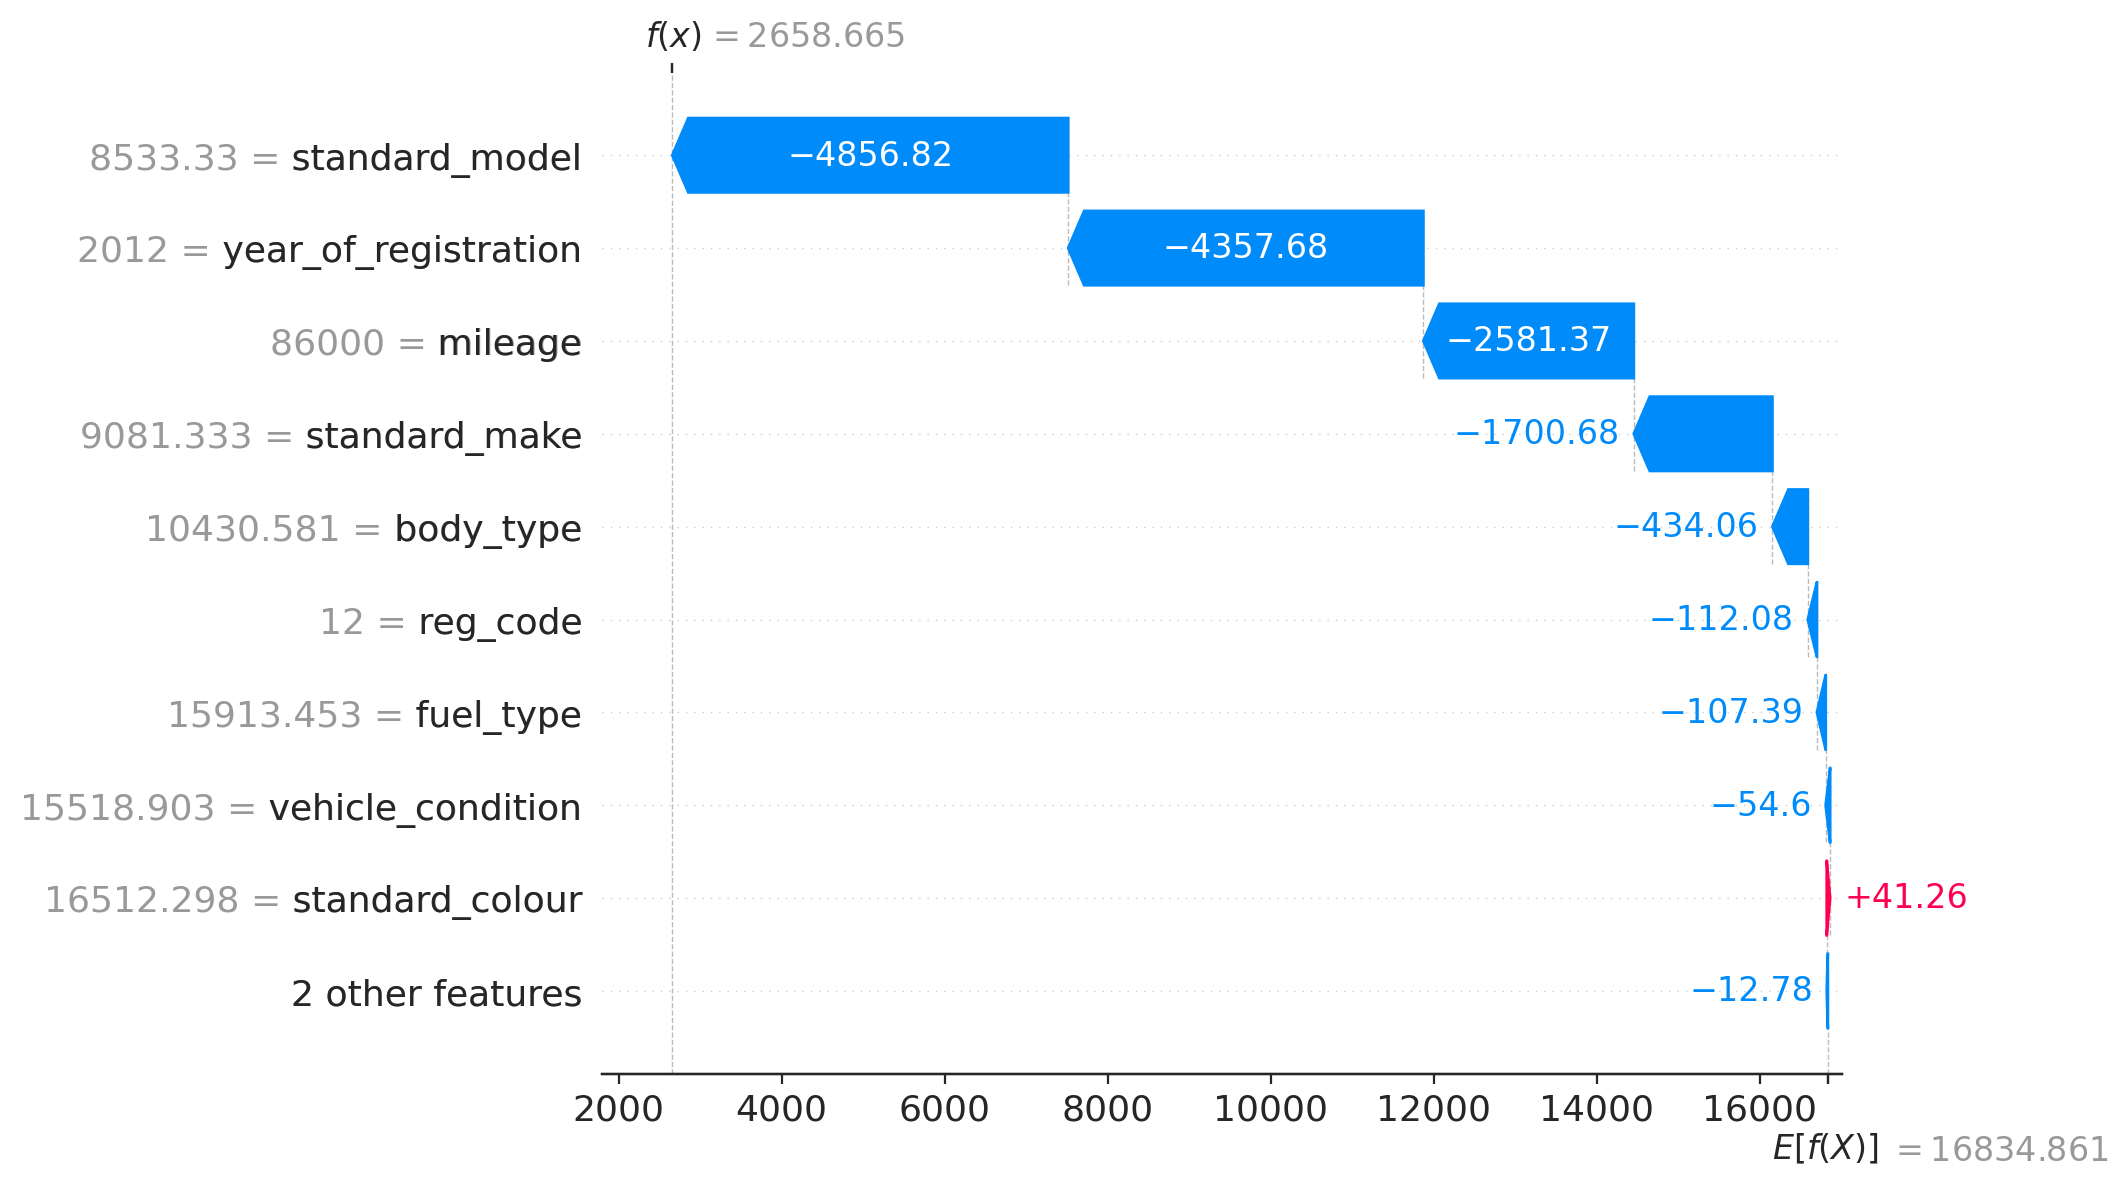

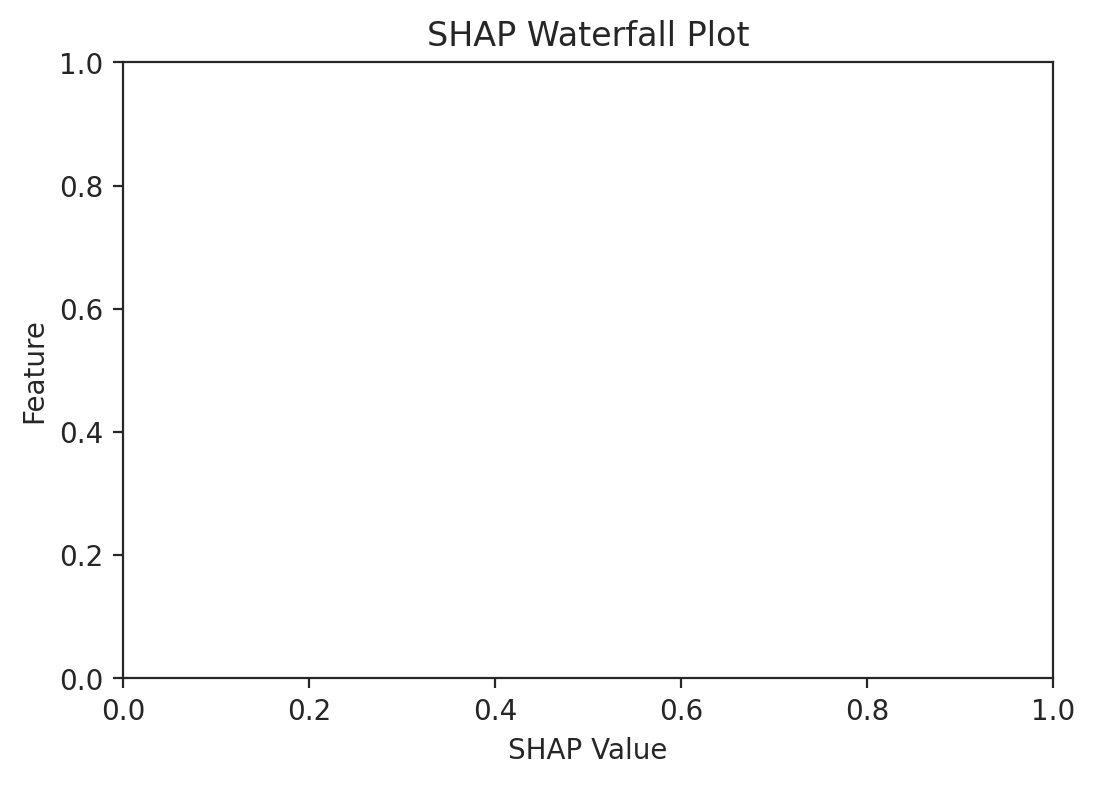

In [ ]:
instance_index = 2
base_value = explainer.expected_value
predicted_value = gbr.predict(X_test_c)[instance_index]
shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index], base_values=base_value, data=X_test_c.iloc[instance_index], feature_names=X_test_c.columns))
plt.title("SHAP Waterfall Plot")
plt.xlabel("SHAP Value")
plt.ylabel("Feature")
plt.show()


## Partial Dependency Plot

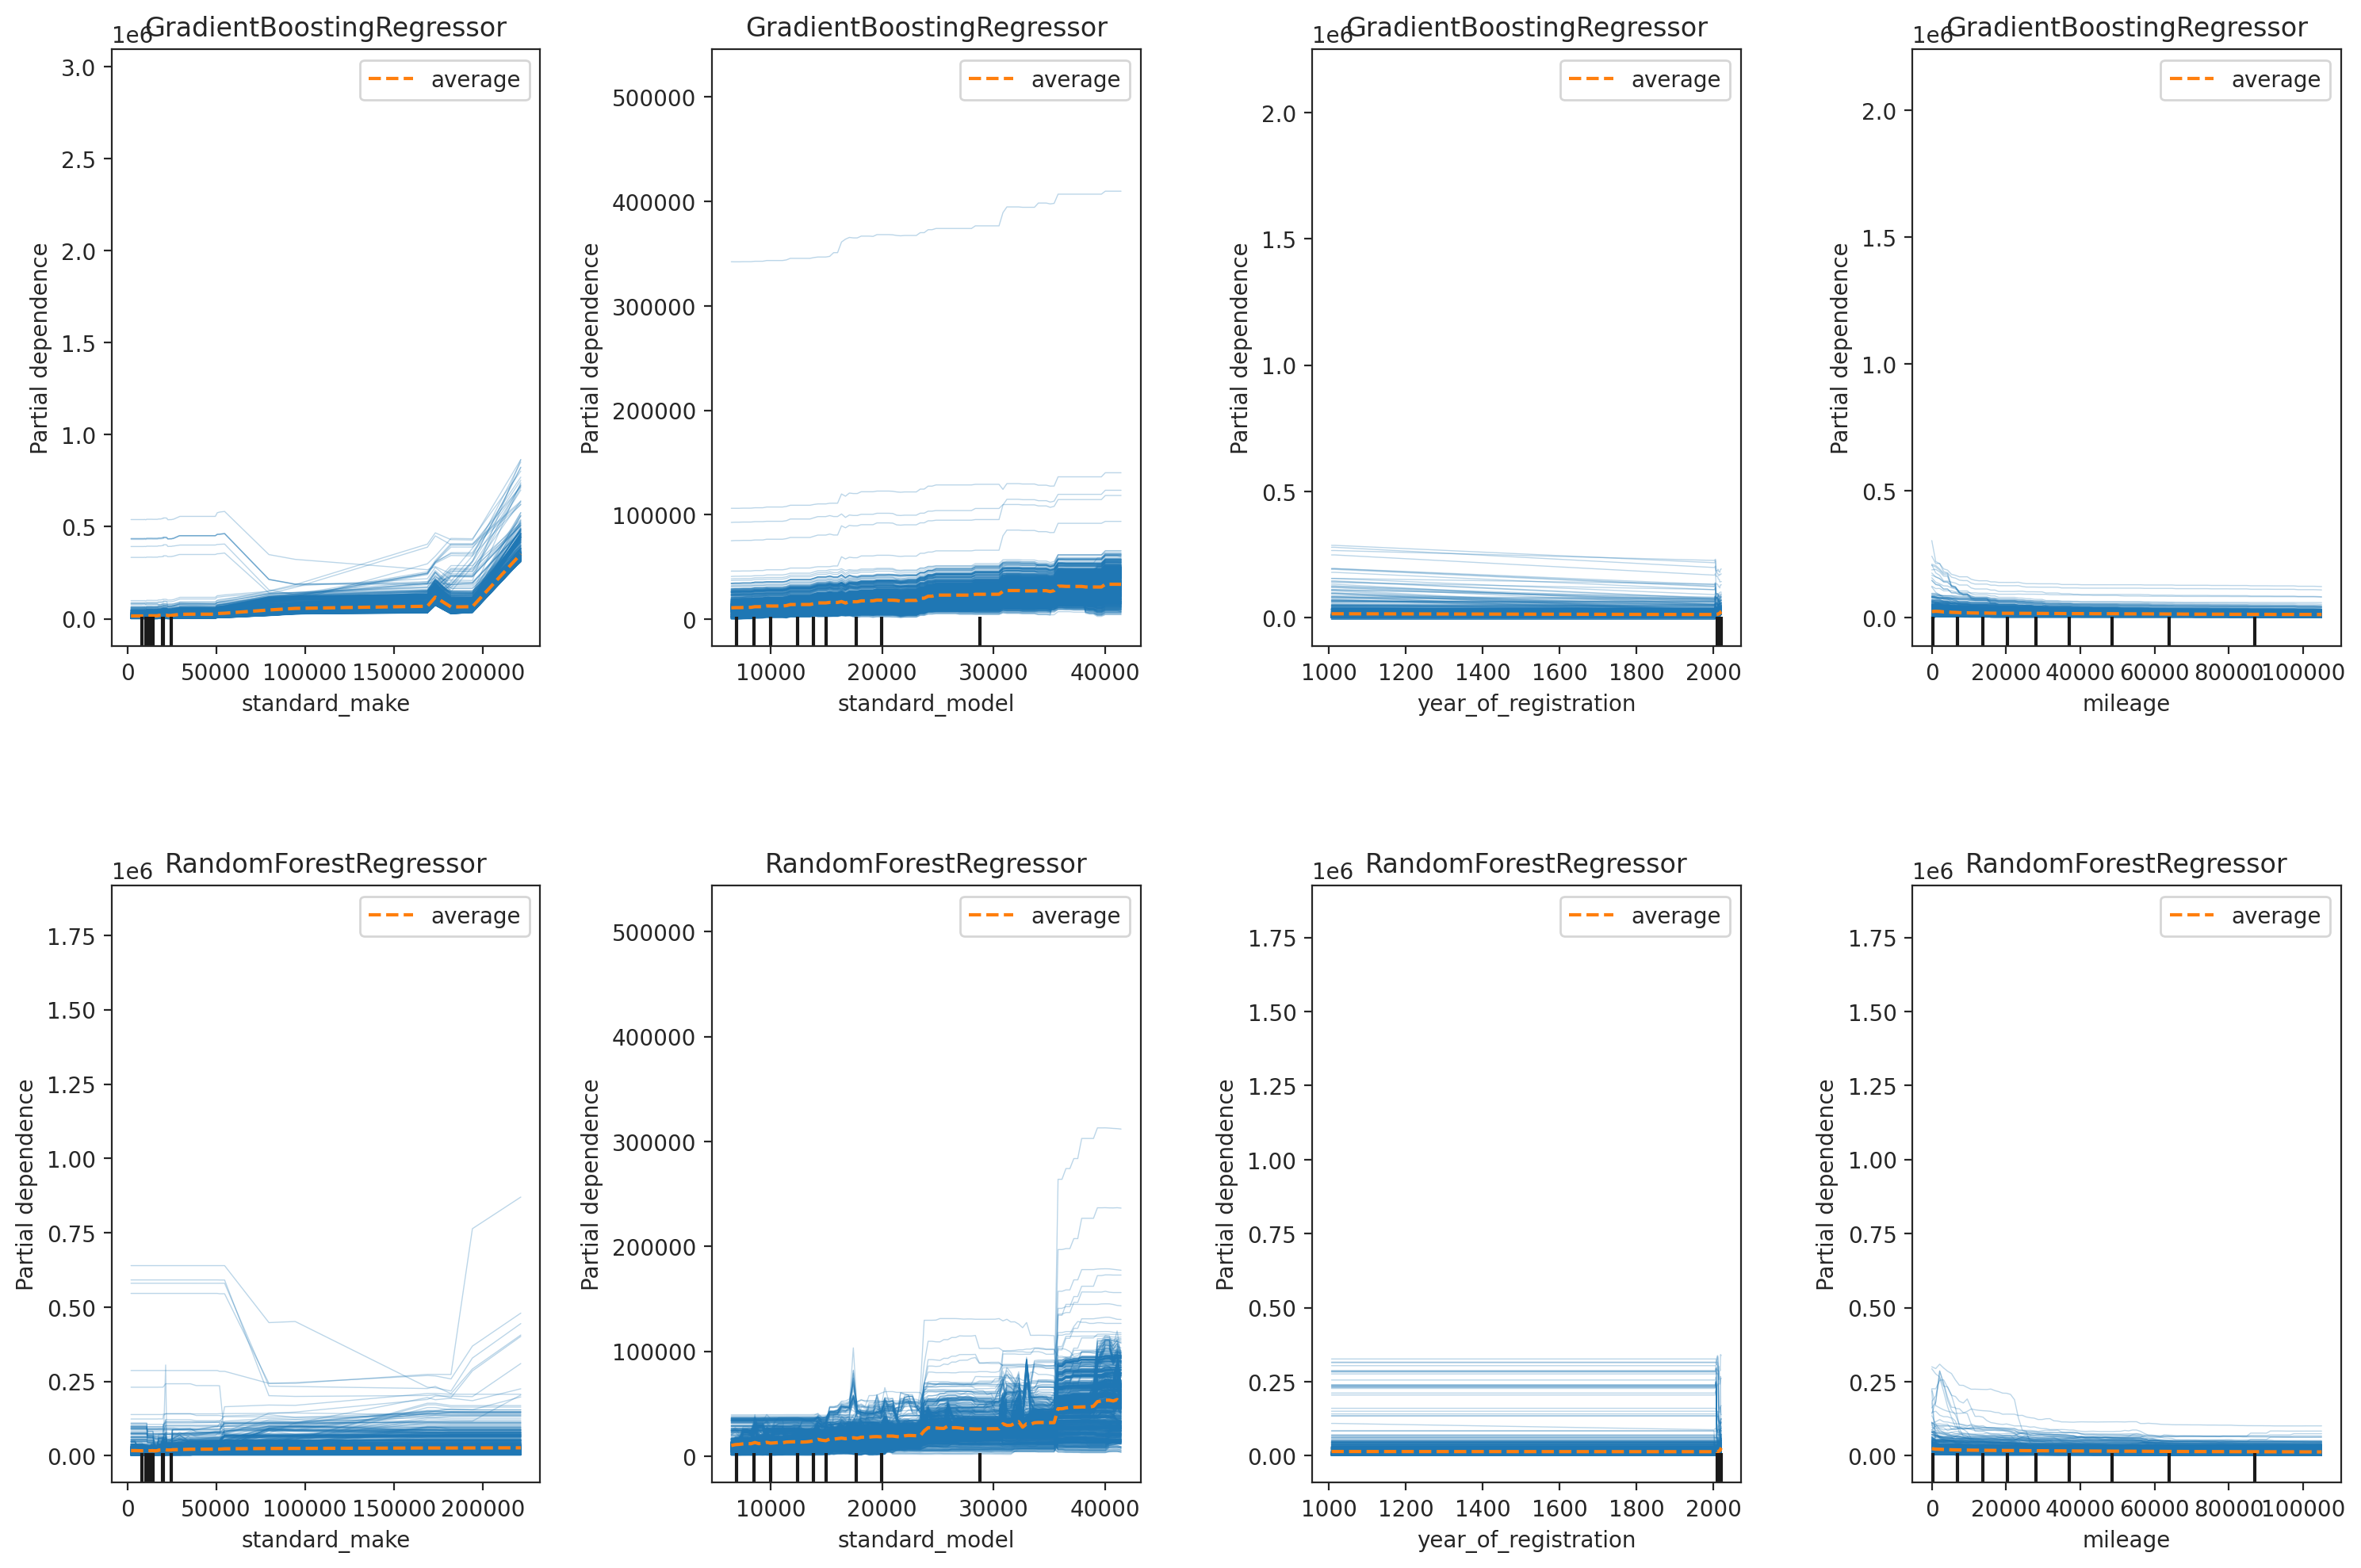

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

display_gbr = PartialDependenceDisplay.from_estimator(
    gbr, X_test_c, features=['standard_make'], kind='both', ax=axes[0, 0]
)
axes[0, 0].set_title('GradientBoostingRegressor')

display_gbr = PartialDependenceDisplay.from_estimator(
    gbr, X_test_c, features=['standard_model'], kind='both', ax=axes[0, 1]
)
axes[0, 1].set_title('GradientBoostingRegressor')

display_gbr = PartialDependenceDisplay.from_estimator(
    gbr, X_test_c, features=['year_of_registration'], kind='both', ax=axes[0, 2]
)
axes[0, 2].set_title('GradientBoostingRegressor')

display_gbr = PartialDependenceDisplay.from_estimator(
    gbr, X_test_c, features=['mileage'], kind='both', ax=axes[0, 3]
)
axes[0, 3].set_title('GradientBoostingRegressor')


display_rf = PartialDependenceDisplay.from_estimator(
    rf, X_test_c, features=['standard_make'], kind='both', ax=axes[1, 0]
)
axes[1, 0].set_title('RandomForestRegressor')

display_rf = PartialDependenceDisplay.from_estimator(
    rf, X_test_c, features=['standard_model'], kind='both', ax=axes[1, 1]
)
axes[1, 1].set_title('RandomForestRegressor')

display_rf = PartialDependenceDisplay.from_estimator(
    rf, X_test_c, features=['year_of_registration'], kind='both', ax=axes[1, 2]
)
axes[1, 2].set_title('RandomForestRegressor')

display_rf = PartialDependenceDisplay.from_estimator(
    rf, X_test_c, features=['mileage'], kind='both', ax=axes[1, 3]
)
axes[1, 3].set_title('RandomForestRegressor')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

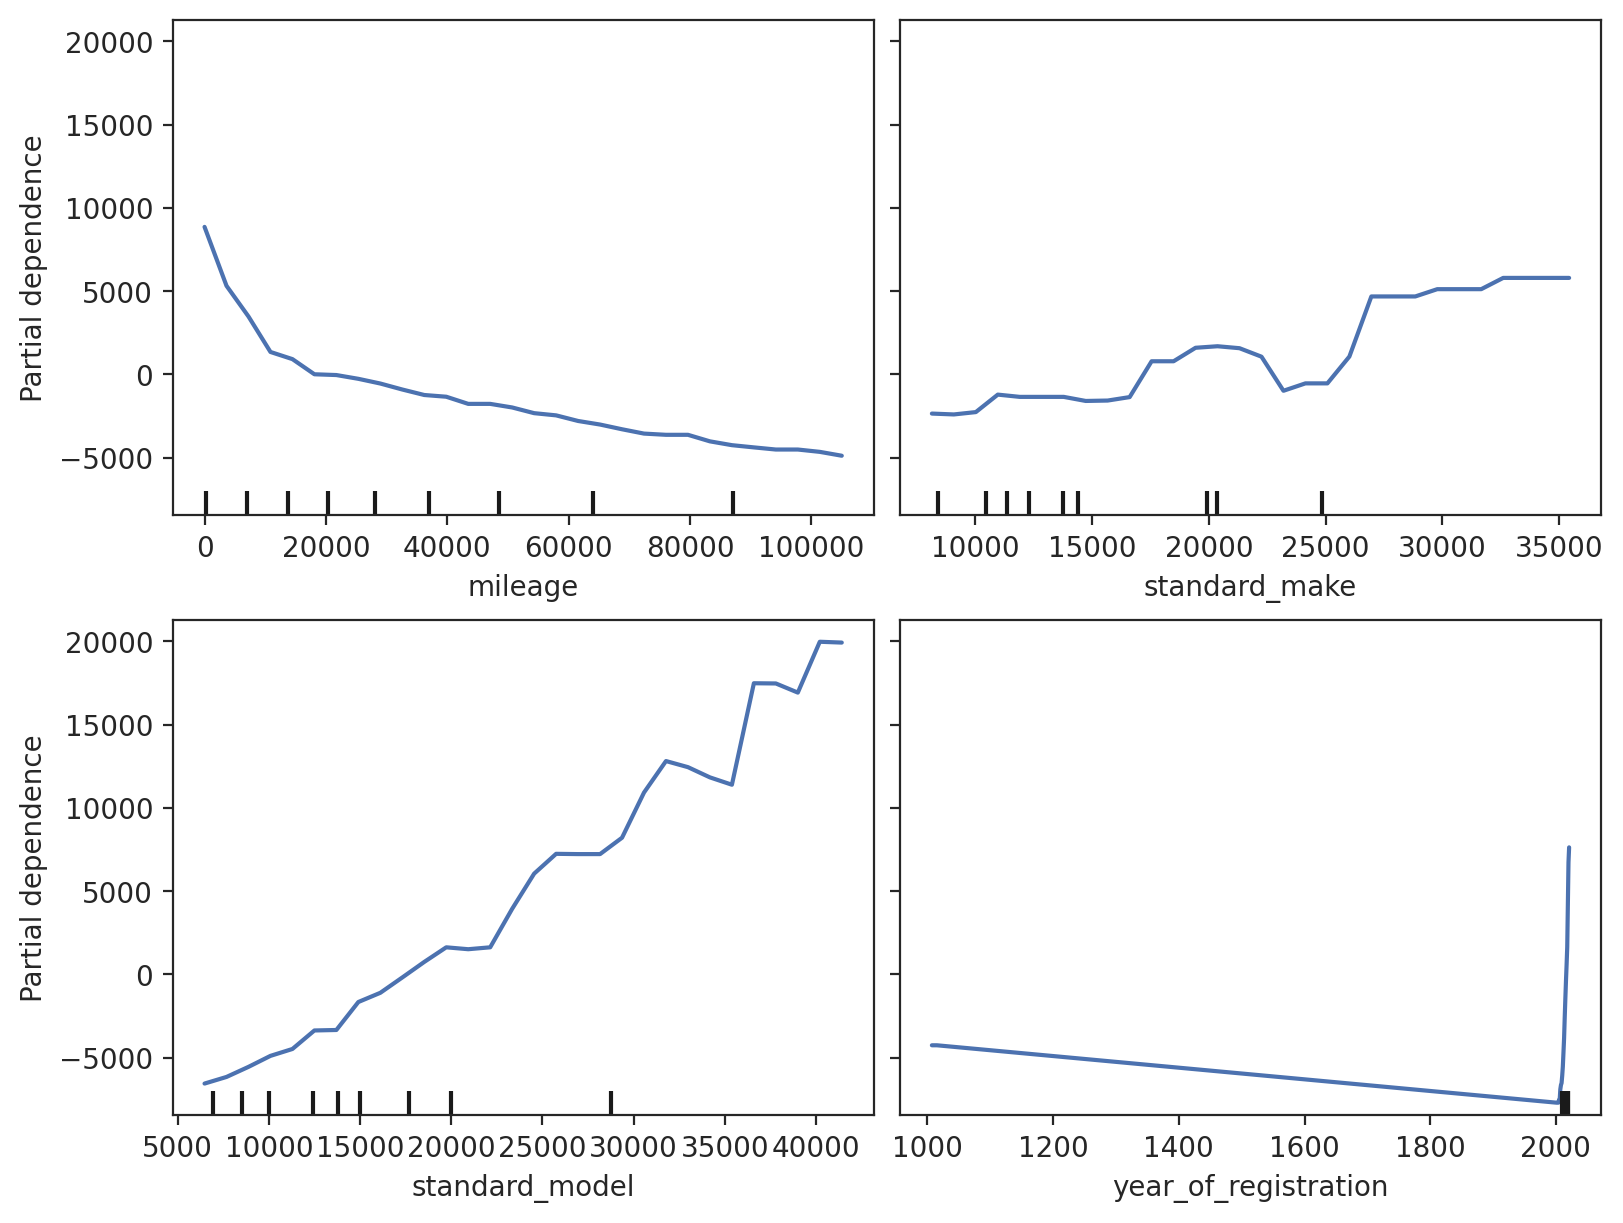

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gbr, X_test_c, features=['mileage', 'standard_make', 'standard_model', 'year_of_registration'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    lr1d, X_test_c, features=['mileage', 'standard_make', 'standard_model', 'year_of_registration'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf, X_test_c, features=['mileage', 'standard_make', 'standard_model', 'year_of_registration'],
    kind='average',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);